Note: This file is the important code from what I tried.

# Import and Data Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
x_train, x_test = pd.read_csv("BrodysImpute_Age_Outcome_Gender-trainSet.csv"), pd.read_csv("BrodysImpute_Age_Outcome_Gender-testSet.csv")
outcome = pd.read_csv("../final_data/train_outcome.csv")
x_train, x_test = x_train.set_index("RecordID"), x_test.set_index("RecordID")
outcome = outcome.set_index("id")
y_train, y_test = outcome.loc[np.array(x_train.index),:], outcome.loc[np.array(x_test.index),:]

In [3]:
tf.random.set_seed(62998)

# Standardizing the Data

In [4]:
x_train.head()

,AdmissionType,Age,Gender,ALP_mean,ALP_max,ALP_min,ALP_range,ALP_changeStoF,ALP_numTest,ALT_mean,...,WBC_min,WBC_range,WBC_changeStoF,WBC_numTest,pH_mean,pH_max,pH_min,pH_range,pH_changeStoF,pH_numTest
RecordID,,,,,,,,,,,,,,,,,,,,,
17,1,40,0,85.515,86.25,84.78,1.47,-1.47,2.0,73.71,...,10.4,5.70,5.70,2.0,7.48400,7.49000,7.47000,0.02,0.00,5.0
31,1,47,1,88.020,88.02,88.02,0.00,0.00,1.0,148.51,...,9.9,12.70,-12.70,4.0,7.42571,7.47000,7.38000,0.09,-0.03,7.0
34,1,57,1,100.700,100.70,100.70,0.00,0.00,1.0,10.17,...,7.6,4.60,-4.60,4.0,7.36333,7.37000,7.35000,0.02,-0.02,3.0
35,1,68,1,76.670,76.67,76.67,0.00,0.00,0.0,30.99,...,9.6,0.00,0.00,1.0,7.39556,7.39556,7.39556,0.00,0.00,0.0
44,1,68,1,76.670,76.67,76.67,0.00,0.00,0.0,30.99,...,11.3,1.67,-1.67,2.0,7.39556,7.39556,7.39556,0.00,0.00,0.0


In [5]:
from sklearn import preprocessing

cols = x_train.columns[3:]
scaler = preprocessing.StandardScaler().fit(x_train[cols])
x_train[cols] = scaler.transform(x_train[cols])

In [6]:
x_test[cols] = scaler.transform(x_test[cols])

In [7]:
x_train.head()

,AdmissionType,Age,Gender,ALP_mean,ALP_max,ALP_min,ALP_range,ALP_changeStoF,ALP_numTest,ALT_mean,...,WBC_min,WBC_range,WBC_changeStoF,WBC_numTest,pH_mean,pH_max,pH_min,pH_range,pH_changeStoF,pH_numTest
RecordID,,,,,,,,,,,,,,,,,,,,,
17,1,40,0,-0.016433,-0.030908,-0.001664,-0.117159,-0.009776,1.305911,-0.009594,...,-0.033668,0.298436,1.025196,-0.524912,0.035976,-0.015821,0.088080,-0.026188,0.009356,0.011728
31,1,47,1,0.012337,-0.011957,0.037840,-0.179780,0.053687,0.364745,0.195569,...,-0.111401,1.426889,-1.997350,0.882226,0.000644,-0.017664,0.016443,-0.019694,-0.006760,0.417274
34,1,57,1,0.157965,0.123809,0.192440,-0.179780,0.053687,0.364745,-0.183872,...,-0.468972,0.121108,-0.666773,0.882226,-0.037167,-0.026881,-0.007437,-0.026188,-0.001388,-0.393818
35,1,68,1,-0.118017,-0.133482,-0.100544,-0.179780,0.053687,-0.576422,-0.126767,...,-0.158041,-0.620447,0.088864,-1.228481,-0.017631,-0.024525,0.028828,-0.028043,0.009356,-1.002136
44,1,68,1,-0.118017,-0.133482,-0.100544,-0.179780,0.053687,-0.576422,-0.126767,...,0.106251,-0.351230,-0.185465,-0.524912,-0.017631,-0.024525,0.028828,-0.028043,0.009356,-1.002136


# Simple DNN 

In [8]:
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(128, input_shape=(225,), activation='relu'))
#model.add(tf.keras.layers.Dense(32, activation='relu')) 
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC()])

history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 200, validation_split = .2)

Epoch 1/200
125/125 [==============================] - 1s 4ms/step - loss: 0.6744 - accuracy: 0.6278 - auc: 0.5345 - val_loss: 0.6035 - val_accuracy: 0.6878 - val_auc: 0.6318
Epoch 2/200
125/125 [==============================] - 0s 1ms/step - loss: 0.6510 - accuracy: 0.6359 - auc: 0.6146 - val_loss: 0.5777 - val_accuracy: 0.7160 - val_auc: 0.6765
Epoch 3/200
125/125 [==============================] - 0s 1ms/step - loss: 0.6261 - accuracy: 0.6664 - auc: 0.6381 - val_loss: 0.5745 - val_accuracy: 0.7160 - val_auc: 0.6954
Epoch 4/200
125/125 [==============================] - 0s 1ms/step - loss: 0.6215 - accuracy: 0.6493 - auc: 0.6609 - val_loss: 0.5618 - val_accuracy: 0.7231 - val_auc: 0.7036
Epoch 5/200
125/125 [==============================] - 0s 1ms/step - loss: 0.6093 - accuracy: 0.6772 - auc: 0.6816 - val_loss: 0.5568 - val_accuracy: 0.7261 - val_auc: 0.7088
Epoch 6/200
125/125 [==============================] - 0s 1ms/step - loss: 0.6022 - accuracy: 0.6706 - auc: 0.6903 - val_loss

KeyboardInterrupt: 

In [19]:
pred = model.predict(x_test)
pred[pred >= .5] = 1
pred[pred  < .5] = 0
newpred = []
for p in pred:
    newpred.append(p[0])
np.mean(newpred != y_test.iloc[:,0])

0.2910202162670428

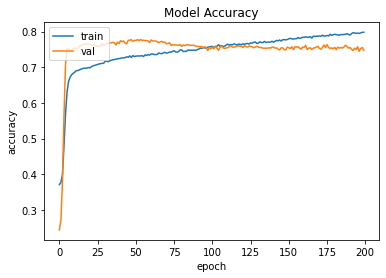

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [57]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(225,), activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.3))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(8, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC()])

history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 1200, validation_split = .2)

Epoch 1/1200
125/125 [==============================] - 1s 3ms/step - loss: 4.6453 - accuracy: 0.5341 - auc_17: 0.4933 - val_loss: 2.8251 - val_accuracy: 0.7694 - val_auc_17: 0.5804
Epoch 2/1200
125/125 [==============================] - 0s 2ms/step - loss: 3.7219 - accuracy: 0.5541 - auc_17: 0.5088 - val_loss: 2.7109 - val_accuracy: 0.7704 - val_auc_17: 0.6210
Epoch 3/1200
125/125 [==============================] - 0s 2ms/step - loss: 3.3188 - accuracy: 0.5916 - auc_17: 0.5191 - val_loss: 2.6062 - val_accuracy: 0.7714 - val_auc_17: 0.6371
Epoch 4/1200
125/125 [==============================] - 0s 2ms/step - loss: 2.9379 - accuracy: 0.5757 - auc_17: 0.5083 - val_loss: 2.5169 - val_accuracy: 0.7734 - val_auc_17: 0.6366
Epoch 5/1200
125/125 [==============================] - 0s 2ms/step - loss: 2.7905 - accuracy: 0.5582 - auc_17: 0.4843 - val_loss: 2.4054 - val_accuracy: 0.7744 - val_auc_17: 0.6380
Epoch 6/1200
125/125 [==============================] - 0s 2ms/step - loss: 2.5795 - accur

Epoch 46/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.8781 - accuracy: 0.6305 - auc_17: 0.5488 - val_loss: 0.8143 - val_accuracy: 0.7734 - val_auc_17: 0.7357
Epoch 47/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.8688 - accuracy: 0.6307 - auc_17: 0.5563 - val_loss: 0.8042 - val_accuracy: 0.7734 - val_auc_17: 0.7274
Epoch 48/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.8564 - accuracy: 0.6311 - auc_17: 0.5588 - val_loss: 0.7926 - val_accuracy: 0.7734 - val_auc_17: 0.7284
Epoch 49/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.8409 - accuracy: 0.6410 - auc_17: 0.5564 - val_loss: 0.7819 - val_accuracy: 0.7734 - val_auc_17: 0.7336
Epoch 50/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.8413 - accuracy: 0.6218 - auc_17: 0.5735 - val_loss: 0.7717 - val_accuracy: 0.7734 - val_auc_17: 0.7253
Epoch 51/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.8354 -

Epoch 91/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6205 - auc_17: 0.6968 - val_loss: 0.5623 - val_accuracy: 0.7734 - val_auc_17: 0.7346
Epoch 92/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6294 - auc_17: 0.6810 - val_loss: 0.5540 - val_accuracy: 0.7734 - val_auc_17: 0.7419
Epoch 93/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6183 - auc_17: 0.6886 - val_loss: 0.5539 - val_accuracy: 0.7734 - val_auc_17: 0.7427
Epoch 94/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.6389 - auc_17: 0.6920 - val_loss: 0.5552 - val_accuracy: 0.7734 - val_auc_17: 0.7429
Epoch 95/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6318 - auc_17: 0.6839 - val_loss: 0.5509 - val_accuracy: 0.7734 - val_auc_17: 0.7455
Epoch 96/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.6491 -

125/125 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.6318 - auc_17: 0.7515 - val_loss: 0.5123 - val_accuracy: 0.7734 - val_auc_17: 0.7551
Epoch 180/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.6364 - auc_17: 0.7365 - val_loss: 0.5127 - val_accuracy: 0.7734 - val_auc_17: 0.7545
Epoch 181/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.6340 - auc_17: 0.7575 - val_loss: 0.5206 - val_accuracy: 0.7734 - val_auc_17: 0.7495
Epoch 182/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.6443 - auc_17: 0.7441 - val_loss: 0.5231 - val_accuracy: 0.7734 - val_auc_17: 0.7500
Epoch 183/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.6365 - auc_17: 0.7548 - val_loss: 0.5154 - val_accuracy: 0.7734 - val_auc_17: 0.7523
Epoch 184/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy

125/125 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7389 - auc_17: 0.7870 - val_loss: 0.5144 - val_accuracy: 0.7644 - val_auc_17: 0.7519
Epoch 268/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.7360 - auc_17: 0.7839 - val_loss: 0.5266 - val_accuracy: 0.7523 - val_auc_17: 0.7476
Epoch 269/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.7337 - auc_17: 0.7871 - val_loss: 0.5216 - val_accuracy: 0.7573 - val_auc_17: 0.7511
Epoch 270/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7335 - auc_17: 0.7887 - val_loss: 0.5178 - val_accuracy: 0.7644 - val_auc_17: 0.7506
Epoch 271/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.7213 - auc_17: 0.7747 - val_loss: 0.5192 - val_accuracy: 0.7583 - val_auc_17: 0.7501
Epoch 272/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy

125/125 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.7862 - auc_17: 0.8435 - val_loss: 0.5707 - val_accuracy: 0.7503 - val_auc_17: 0.7299
Epoch 356/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.7931 - auc_17: 0.8449 - val_loss: 0.5697 - val_accuracy: 0.7533 - val_auc_17: 0.7333
Epoch 357/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7824 - auc_17: 0.8430 - val_loss: 0.5711 - val_accuracy: 0.7563 - val_auc_17: 0.7344
Epoch 358/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.7945 - auc_17: 0.8475 - val_loss: 0.5689 - val_accuracy: 0.7503 - val_auc_17: 0.7360
Epoch 359/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.5430 - accuracy: 0.7916 - auc_17: 0.8515 - val_loss: 0.5722 - val_accuracy: 0.7482 - val_auc_17: 0.7336
Epoch 360/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy

125/125 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.8182 - auc_17: 0.8775 - val_loss: 0.6498 - val_accuracy: 0.7462 - val_auc_17: 0.7226
Epoch 444/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.8292 - auc_17: 0.8894 - val_loss: 0.6556 - val_accuracy: 0.7412 - val_auc_17: 0.7179
Epoch 445/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.8402 - auc_17: 0.9011 - val_loss: 0.6548 - val_accuracy: 0.7492 - val_auc_17: 0.7228
Epoch 446/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.8239 - auc_17: 0.8820 - val_loss: 0.6688 - val_accuracy: 0.7633 - val_auc_17: 0.7259
Epoch 447/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.8189 - auc_17: 0.8804 - val_loss: 0.6610 - val_accuracy: 0.7603 - val_auc_17: 0.7235
Epoch 448/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy

125/125 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.8493 - auc_17: 0.9074 - val_loss: 0.7697 - val_accuracy: 0.7603 - val_auc_17: 0.7179
Epoch 532/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.8535 - auc_17: 0.9144 - val_loss: 0.7614 - val_accuracy: 0.7472 - val_auc_17: 0.7231
Epoch 533/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.8450 - auc_17: 0.9095 - val_loss: 0.7630 - val_accuracy: 0.7593 - val_auc_17: 0.7256
Epoch 534/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.8455 - auc_17: 0.9064 - val_loss: 0.7536 - val_accuracy: 0.7472 - val_auc_17: 0.7221
Epoch 535/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.8556 - auc_17: 0.9122 - val_loss: 0.7591 - val_accuracy: 0.7412 - val_auc_17: 0.7162
Epoch 536/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy

125/125 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.8703 - auc_17: 0.9258 - val_loss: 0.8964 - val_accuracy: 0.7432 - val_auc_17: 0.7123
Epoch 620/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.8639 - auc_17: 0.9172 - val_loss: 0.8610 - val_accuracy: 0.7452 - val_auc_17: 0.7099
Epoch 621/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.8679 - auc_17: 0.9155 - val_loss: 0.8672 - val_accuracy: 0.7472 - val_auc_17: 0.7111
Epoch 622/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.8556 - auc_17: 0.9176 - val_loss: 0.8750 - val_accuracy: 0.7351 - val_auc_17: 0.7069
Epoch 623/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8723 - auc_17: 0.9313 - val_loss: 0.8823 - val_accuracy: 0.7563 - val_auc_17: 0.7119
Epoch 624/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy

125/125 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8872 - auc_17: 0.9409 - val_loss: 0.9467 - val_accuracy: 0.7442 - val_auc_17: 0.7100
Epoch 708/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8899 - auc_17: 0.9419 - val_loss: 0.9378 - val_accuracy: 0.7513 - val_auc_17: 0.7164
Epoch 709/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.8792 - auc_17: 0.9348 - val_loss: 0.9661 - val_accuracy: 0.7513 - val_auc_17: 0.7098
Epoch 710/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8882 - auc_17: 0.9409 - val_loss: 0.9515 - val_accuracy: 0.7533 - val_auc_17: 0.7080
Epoch 711/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8998 - auc_17: 0.9452 - val_loss: 0.9288 - val_accuracy: 0.7402 - val_auc_17: 0.7103
Epoch 712/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy

125/125 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8870 - auc_17: 0.9394 - val_loss: 1.0152 - val_accuracy: 0.7482 - val_auc_17: 0.7063
Epoch 796/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.9012 - auc_17: 0.9477 - val_loss: 1.0262 - val_accuracy: 0.7462 - val_auc_17: 0.7027
Epoch 797/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8838 - auc_17: 0.9381 - val_loss: 1.0323 - val_accuracy: 0.7422 - val_auc_17: 0.7059
Epoch 798/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8864 - auc_17: 0.9381 - val_loss: 1.0461 - val_accuracy: 0.7482 - val_auc_17: 0.7078
Epoch 799/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8921 - auc_17: 0.9456 - val_loss: 1.0452 - val_accuracy: 0.7492 - val_auc_17: 0.7074
Epoch 800/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy

125/125 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8943 - auc_17: 0.9482 - val_loss: 1.0995 - val_accuracy: 0.7462 - val_auc_17: 0.7075
Epoch 884/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8980 - auc_17: 0.9526 - val_loss: 1.0957 - val_accuracy: 0.7543 - val_auc_17: 0.7000
Epoch 885/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.9007 - auc_17: 0.9503 - val_loss: 1.0731 - val_accuracy: 0.7422 - val_auc_17: 0.7083
Epoch 886/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8918 - auc_17: 0.9417 - val_loss: 1.0669 - val_accuracy: 0.7452 - val_auc_17: 0.7039
Epoch 887/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8896 - auc_17: 0.9356 - val_loss: 1.0789 - val_accuracy: 0.7513 - val_auc_17: 0.7029
Epoch 888/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy

125/125 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.9035 - auc_17: 0.9492 - val_loss: 1.1608 - val_accuracy: 0.7372 - val_auc_17: 0.6974
Epoch 972/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.9055 - auc_17: 0.9505 - val_loss: 1.1689 - val_accuracy: 0.7442 - val_auc_17: 0.7027
Epoch 973/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8905 - auc_17: 0.9449 - val_loss: 1.1657 - val_accuracy: 0.7392 - val_auc_17: 0.7035
Epoch 974/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.9061 - auc_17: 0.9533 - val_loss: 1.1576 - val_accuracy: 0.7452 - val_auc_17: 0.7027
Epoch 975/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.9096 - auc_17: 0.9541 - val_loss: 1.1568 - val_accuracy: 0.7492 - val_auc_17: 0.7023
Epoch 976/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy

125/125 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.9308 - auc_17: 0.9655 - val_loss: 1.2353 - val_accuracy: 0.7533 - val_auc_17: 0.6937
Epoch 1060/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.9141 - auc_17: 0.9555 - val_loss: 1.2186 - val_accuracy: 0.7573 - val_auc_17: 0.6964
Epoch 1061/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.9162 - auc_17: 0.9531 - val_loss: 1.2210 - val_accuracy: 0.7593 - val_auc_17: 0.6995
Epoch 1062/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8999 - auc_17: 0.9440 - val_loss: 1.2106 - val_accuracy: 0.7482 - val_auc_17: 0.6981
Epoch 1063/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8973 - auc_17: 0.9514 - val_loss: 1.2268 - val_accuracy: 0.7462 - val_auc_17: 0.6938
Epoch 1064/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3819 - acc

125/125 [==============================] - 0s 2ms/step - loss: 0.3685 - accuracy: 0.9173 - auc_17: 0.9522 - val_loss: 1.3156 - val_accuracy: 0.7583 - val_auc_17: 0.6943
Epoch 1148/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.9125 - auc_17: 0.9591 - val_loss: 1.2698 - val_accuracy: 0.7573 - val_auc_17: 0.6944
Epoch 1149/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.9222 - auc_17: 0.9651 - val_loss: 1.2713 - val_accuracy: 0.7392 - val_auc_17: 0.6932
Epoch 1150/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.9163 - auc_17: 0.9559 - val_loss: 1.3286 - val_accuracy: 0.7482 - val_auc_17: 0.6856
Epoch 1151/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.9052 - auc_17: 0.9534 - val_loss: 1.2727 - val_accuracy: 0.7432 - val_auc_17: 0.6894
Epoch 1152/1200
125/125 [==============================] - 0s 2ms/step - loss: 0.3820 - acc

In [58]:
pred = model.predict(x_test)
pred[pred >= .5] = 1
pred[pred  < .5] = 0
newpred = []
for p in pred:
    newpred.append(p[0])
np.mean(newpred != y_test.iloc[:,0])

0.2919605077574048

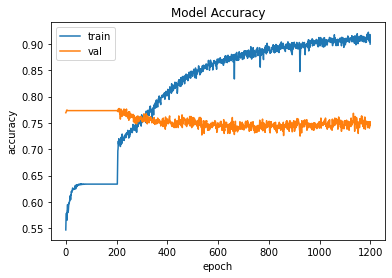

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [211]:
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(128, input_shape=(225,), activation='relu', kernel_regularizer='l2'))
#model.add(tf.keras.layers.Dropout(.3))
#model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
#model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC()])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15)
history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 400, validation_split = .2, callbacks=[callback]) # 800, 1000, oe 1200 epoch

Epoch 1/400
125/125 [==============================] - 1s 4ms/step - loss: 5.5647 - accuracy: 0.4239 - auc_28: 0.4879 - val_loss: 1.3310 - val_accuracy: 0.6848 - val_auc_28: 0.6133
Epoch 2/400
125/125 [==============================] - 0s 2ms/step - loss: 3.8755 - accuracy: 0.4671 - auc_28: 0.4834 - val_loss: 1.2343 - val_accuracy: 0.7744 - val_auc_28: 0.6373
Epoch 3/400
125/125 [==============================] - 0s 2ms/step - loss: 3.3023 - accuracy: 0.4984 - auc_28: 0.4900 - val_loss: 1.2219 - val_accuracy: 0.7774 - val_auc_28: 0.6522
Epoch 4/400
125/125 [==============================] - 0s 2ms/step - loss: 2.7800 - accuracy: 0.5023 - auc_28: 0.5023 - val_loss: 1.1904 - val_accuracy: 0.7754 - val_auc_28: 0.6572
Epoch 5/400
125/125 [==============================] - 0s 2ms/step - loss: 2.4282 - accuracy: 0.5326 - auc_28: 0.5327 - val_loss: 1.1535 - val_accuracy: 0.7744 - val_auc_28: 0.6546
Epoch 6/400
125/125 [==============================] - 0s 2ms/step - loss: 2.1846 - accuracy: 0

125/125 [==============================] - 0s 2ms/step - loss: 0.7649 - accuracy: 0.6393 - auc_28: 0.6663 - val_loss: 0.6900 - val_accuracy: 0.7734 - val_auc_28: 0.7341
Epoch 47/400
125/125 [==============================] - 0s 2ms/step - loss: 0.7567 - accuracy: 0.6473 - auc_28: 0.6769 - val_loss: 0.6825 - val_accuracy: 0.7734 - val_auc_28: 0.7391
Epoch 48/400
125/125 [==============================] - 0s 2ms/step - loss: 0.7662 - accuracy: 0.6325 - auc_28: 0.6500 - val_loss: 0.6729 - val_accuracy: 0.7734 - val_auc_28: 0.7395
Epoch 49/400
125/125 [==============================] - 0s 2ms/step - loss: 0.7373 - accuracy: 0.6497 - auc_28: 0.6650 - val_loss: 0.6719 - val_accuracy: 0.7734 - val_auc_28: 0.7417
Epoch 50/400
125/125 [==============================] - 0s 2ms/step - loss: 0.7423 - accuracy: 0.6368 - auc_28: 0.6741 - val_loss: 0.6604 - val_accuracy: 0.7734 - val_auc_28: 0.7413
Epoch 51/400
125/125 [==============================] - 0s 2ms/step - loss: 0.7387 - accuracy: 0.6380 -

Epoch 136/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.7294 - auc_28: 0.7794 - val_loss: 0.5107 - val_accuracy: 0.7754 - val_auc_28: 0.7605
Epoch 137/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.7318 - auc_28: 0.7769 - val_loss: 0.5134 - val_accuracy: 0.7684 - val_auc_28: 0.7590
Epoch 138/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7436 - auc_28: 0.7804 - val_loss: 0.5093 - val_accuracy: 0.7704 - val_auc_28: 0.7600
Epoch 139/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.7235 - auc_28: 0.7720 - val_loss: 0.5086 - val_accuracy: 0.7704 - val_auc_28: 0.7592
Epoch 140/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.7306 - auc_28: 0.7801 - val_loss: 0.5112 - val_accuracy: 0.7684 - val_auc_28: 0.7590
Epoch 141/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5624 -

Epoch 181/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7573 - auc_28: 0.8171 - val_loss: 0.5113 - val_accuracy: 0.7633 - val_auc_28: 0.7552
Epoch 182/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7510 - auc_28: 0.8015 - val_loss: 0.5089 - val_accuracy: 0.7633 - val_auc_28: 0.7566
Epoch 183/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.7463 - auc_28: 0.8044 - val_loss: 0.5061 - val_accuracy: 0.7674 - val_auc_28: 0.7569
Epoch 184/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.7480 - auc_28: 0.8075 - val_loss: 0.5087 - val_accuracy: 0.7654 - val_auc_28: 0.7572
Epoch 185/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7500 - auc_28: 0.8004 - val_loss: 0.5083 - val_accuracy: 0.7674 - val_auc_28: 0.7552
Epoch 186/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5523 -

Epoch 226/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7713 - auc_28: 0.8159 - val_loss: 0.5118 - val_accuracy: 0.7654 - val_auc_28: 0.7569
Epoch 227/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5508 - accuracy: 0.7627 - auc_28: 0.8050 - val_loss: 0.5125 - val_accuracy: 0.7603 - val_auc_28: 0.7553
Epoch 228/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7727 - auc_28: 0.8210 - val_loss: 0.5104 - val_accuracy: 0.7654 - val_auc_28: 0.7531
Epoch 229/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.7642 - auc_28: 0.8145 - val_loss: 0.5082 - val_accuracy: 0.7654 - val_auc_28: 0.7540
Epoch 230/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7605 - auc_28: 0.8171 - val_loss: 0.5108 - val_accuracy: 0.7664 - val_auc_28: 0.7576
Epoch 231/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5437 -

Epoch 271/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.7764 - auc_28: 0.8328 - val_loss: 0.5104 - val_accuracy: 0.7633 - val_auc_28: 0.7531
Epoch 272/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7784 - auc_28: 0.8348 - val_loss: 0.5131 - val_accuracy: 0.7644 - val_auc_28: 0.7528
Epoch 273/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.7809 - auc_28: 0.8396 - val_loss: 0.5127 - val_accuracy: 0.7573 - val_auc_28: 0.7506
Epoch 274/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7745 - auc_28: 0.8373 - val_loss: 0.5140 - val_accuracy: 0.7593 - val_auc_28: 0.7510
Epoch 275/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7812 - auc_28: 0.8400 - val_loss: 0.5146 - val_accuracy: 0.7603 - val_auc_28: 0.7493
Epoch 276/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5260 -

In [224]:
pred = model.predict(x_test)
pred[pred >= .5] = 1
pred[pred  < .5] = 0
newpred = []
for p in pred:
    newpred.append(p[0])
np.mean(newpred != y_test.iloc[:,0])

0.26563234602726843

In [232]:
pred = model.predict(x_test).ravel()
pred[pred >= .5] = 1
pred[pred < .5] = 0
np.mean(pred != y_test.iloc[:,0])

0.26563234602726843

In [213]:
auc = tf.keras.metrics.AUC()
auc.update_state(pred, y_test.iloc[:,0])
auc.result().numpy()

0.70148206

In [214]:
cfMat = confusion_matrix(y_test.iloc[:,0], newpred)
(cfMat[0][1] / sum(cfMat[0]) + cfMat[1][0] / sum(cfMat[1])) / 2

0.3141443366271996

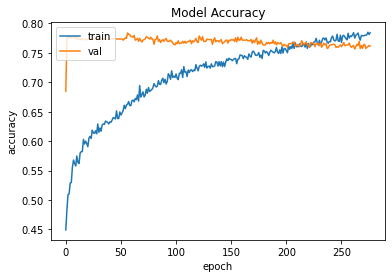

In [215]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [197]:
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(128, input_shape=(225,), activation='relu', kernel_regularizer='l2'))
#model.add(tf.keras.layers.Dropout(.3))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(8, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=.0001)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC()])

history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 1000, validation_split = .2, callbacks=[callback])

Epoch 1/1000
125/125 [==============================] - 1s 4ms/step - loss: 2.9346 - accuracy: 0.5565 - auc_23: 0.4939 - val_loss: 1.3293 - val_accuracy: 0.7734 - val_auc_23: 0.6395
Epoch 2/1000
125/125 [==============================] - 0s 2ms/step - loss: 2.5361 - accuracy: 0.5451 - auc_23: 0.4932 - val_loss: 1.2717 - val_accuracy: 0.7734 - val_auc_23: 0.6586
Epoch 3/1000
125/125 [==============================] - 0s 2ms/step - loss: 1.9899 - accuracy: 0.5556 - auc_23: 0.5308 - val_loss: 1.2550 - val_accuracy: 0.7764 - val_auc_23: 0.6727
Epoch 4/1000
125/125 [==============================] - 0s 2ms/step - loss: 1.8931 - accuracy: 0.5455 - auc_23: 0.5236 - val_loss: 1.2445 - val_accuracy: 0.7664 - val_auc_23: 0.6664
Epoch 5/1000
125/125 [==============================] - 0s 2ms/step - loss: 1.7066 - accuracy: 0.5571 - auc_23: 0.5360 - val_loss: 1.2286 - val_accuracy: 0.7684 - val_auc_23: 0.6489
Epoch 6/1000
125/125 [==============================] - 0s 2ms/step - loss: 1.5811 - accur

Epoch 46/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.7734 - accuracy: 0.6288 - auc_23: 0.6112 - val_loss: 0.7168 - val_accuracy: 0.7734 - val_auc_23: 0.7408
Epoch 47/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.7716 - accuracy: 0.6334 - auc_23: 0.6143 - val_loss: 0.7106 - val_accuracy: 0.7734 - val_auc_23: 0.7414
Epoch 48/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.7644 - accuracy: 0.6250 - auc_23: 0.6226 - val_loss: 0.7016 - val_accuracy: 0.7734 - val_auc_23: 0.7414
Epoch 49/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.7448 - accuracy: 0.6426 - auc_23: 0.6373 - val_loss: 0.6957 - val_accuracy: 0.7734 - val_auc_23: 0.7425
Epoch 50/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.7598 - accuracy: 0.6278 - auc_23: 0.6167 - val_loss: 0.6919 - val_accuracy: 0.7734 - val_auc_23: 0.7446
Epoch 51/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.7449 -

In [199]:
pred = model.predict(x_test.drop(columns = "RF_Results"))
pred[pred >= .5] = 1
pred[pred  < .5] = 0
newpred = []
for p in pred:
    newpred.append(p[0])
np.mean(newpred != y_test.iloc[:,0])

0.32957216737188527

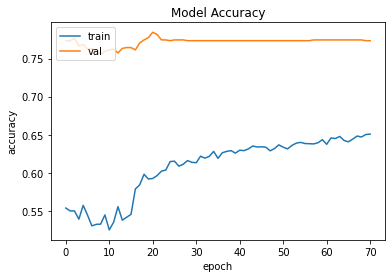

In [200]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Grid Search

In [235]:
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold

kf5 = KFold(n_splits=5, random_state=4521, shuffle=True)

test_epochs = [100,200,400,800,1000]
para_grid_ES = {'patience': [10, 15, 20], 'val':[.1, .2]}
para_grid_ES = list(ParameterGrid(para_grid_ES))

In [236]:
para_grid_ES

[{'patience': 10, 'val': 0.1},
 {'patience': 10, 'val': 0.2},
 {'patience': 15, 'val': 0.1},
 {'patience': 15, 'val': 0.2},
 {'patience': 20, 'val': 0.1},
 {'patience': 20, 'val': 0.2}]

In [239]:
auc = tf.keras.metrics.AUC()
earlyStoppingResults = [[],[],[],[],[],[]] 
epochResults = [[],[],[],[],[]] 
EScount = 0
EpCount = 0

for train, test in kf5.split(x_train):
    EScount, EpCount = 0, 0
    
    for paras in para_grid_ES:
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
        model.add(tf.keras.layers.Dropout(.4))
        model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer='l2'))
        model.add(tf.keras.layers.Dropout(.4))
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        optimizer = tf.keras.optimizers.Adam(learning_rate=.0001)
        model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC()])
        
        callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=paras['patience'])
        history = model.fit(x = x_train.iloc[train,:], y = y_train.iloc[train,:], batch_size = 32, epochs = 400, 
                            validation_split = paras['val'], callbacks=[callback])
        
        pred = model.predict(x_train.iloc[test,:]).ravel()
        pred[pred >= .5] = 1
        pred[pred < .5] = 0
        predErr = np.mean(pred != y_train.iloc[test,:].values.ravel())
        
        auc.update_state(pred, y_train.iloc[test,:].values.ravel())
        aucRes = auc.result().numpy()
        
        cfMat = confusion_matrix(y_train.iloc[test,:].values.ravel(), pred)
        ber = (cfMat[0][1] / sum(cfMat[0]) + cfMat[1][0] / sum(cfMat[1])) / 2
        
        earlyStoppingResults[EScount].append((predErr, aucRes, ber, history))
        EScount += 1
        
    for e in test_epochs:
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
        model.add(tf.keras.layers.Dropout(.4))
        model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer='l2'))
        model.add(tf.keras.layers.Dropout(.4))
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        optimizer = tf.keras.optimizers.Adam(learning_rate=.0001)
        model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC()])
        
        history = model.fit(x = x_train.iloc[train,:], y = y_train.iloc[train,:], batch_size = 32, epochs = e)
        
        pred = model.predict(x_train.iloc[test,:]).ravel()
        pred[pred >= .5] = 1
        pred[pred < .5] = 0
        predErr = np.mean(pred != y_train.iloc[test,:].values.ravel())
        
        auc.update_state(pred, y_train.iloc[test,:].values.ravel())
        aucRes = auc.result().numpy()
        
        cfMat = confusion_matrix(y_train.iloc[test,:].values.ravel(), pred)
        ber = (cfMat[0][1] / sum(cfMat[0]) + cfMat[1][0] / sum(cfMat[1])) / 2
        
        epochResults[EpCount].append((predErr, aucRes, ber, history))
        EpCount += 1

Epoch 1/400
112/112 [==============================] - 1s 6ms/step - loss: 3.0060 - accuracy: 0.5504 - auc_37: 0.5461 - val_loss: 1.2645 - val_accuracy: 0.7355 - val_auc_37: 0.6504
Epoch 2/400
112/112 [==============================] - 0s 3ms/step - loss: 2.6382 - accuracy: 0.5700 - auc_37: 0.5547 - val_loss: 1.2037 - val_accuracy: 0.7531 - val_auc_37: 0.6747
Epoch 3/400
112/112 [==============================] - 0s 3ms/step - loss: 2.3687 - accuracy: 0.5587 - auc_37: 0.5336 - val_loss: 1.1486 - val_accuracy: 0.7531 - val_auc_37: 0.6869
Epoch 4/400
112/112 [==============================] - 0s 3ms/step - loss: 2.2132 - accuracy: 0.5481 - auc_37: 0.5175 - val_loss: 1.1089 - val_accuracy: 0.7506 - val_auc_37: 0.6973
Epoch 5/400
112/112 [==============================] - 0s 3ms/step - loss: 1.9443 - accuracy: 0.5646 - auc_37: 0.5476 - val_loss: 1.0794 - val_accuracy: 0.7330 - val_auc_37: 0.7017
Epoch 6/400
112/112 [==============================] - 0s 3ms/step - loss: 1.7806 - accuracy: 0

Epoch 46/400
112/112 [==============================] - 1s 5ms/step - loss: 0.7549 - accuracy: 0.6480 - auc_37: 0.6764 - val_loss: 0.6749 - val_accuracy: 0.7758 - val_auc_37: 0.7440
Epoch 47/400
112/112 [==============================] - 0s 4ms/step - loss: 0.7505 - accuracy: 0.6610 - auc_37: 0.6746 - val_loss: 0.6680 - val_accuracy: 0.7733 - val_auc_37: 0.7463
Epoch 48/400
112/112 [==============================] - 0s 4ms/step - loss: 0.7399 - accuracy: 0.6578 - auc_37: 0.6947 - val_loss: 0.6605 - val_accuracy: 0.7683 - val_auc_37: 0.7483
Epoch 49/400
112/112 [==============================] - 0s 4ms/step - loss: 0.7533 - accuracy: 0.6484 - auc_37: 0.6680 - val_loss: 0.6518 - val_accuracy: 0.7708 - val_auc_37: 0.7478
Epoch 50/400
112/112 [==============================] - 0s 4ms/step - loss: 0.7391 - accuracy: 0.6526 - auc_37: 0.6959 - val_loss: 0.6464 - val_accuracy: 0.7733 - val_auc_37: 0.7515
Epoch 51/400
112/112 [==============================] - 0s 4ms/step - loss: 0.7238 - accur

112/112 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.7271 - auc_37: 0.7872 - val_loss: 0.5238 - val_accuracy: 0.7708 - val_auc_37: 0.7525
Epoch 92/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5747 - accuracy: 0.7255 - auc_37: 0.7829 - val_loss: 0.5251 - val_accuracy: 0.7607 - val_auc_37: 0.7511
Epoch 93/400
112/112 [==============================] - 1s 6ms/step - loss: 0.5864 - accuracy: 0.7127 - auc_37: 0.7679 - val_loss: 0.5189 - val_accuracy: 0.7683 - val_auc_37: 0.7528
Epoch 94/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5744 - accuracy: 0.7291 - auc_37: 0.7850 - val_loss: 0.5219 - val_accuracy: 0.7708 - val_auc_37: 0.7520
Epoch 95/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.7210 - auc_37: 0.7707 - val_loss: 0.5216 - val_accuracy: 0.7607 - val_auc_37: 0.7504
Epoch 96/400
112/112 [==============================] - 1s 5ms/step - loss: 0.5771 - accuracy: 0.7176 -

Epoch 136/400
112/112 [==============================] - 0s 4ms/step - loss: 0.5492 - accuracy: 0.7405 - auc_37: 0.7964 - val_loss: 0.5078 - val_accuracy: 0.7557 - val_auc_37: 0.7431
Epoch 137/400
112/112 [==============================] - 0s 4ms/step - loss: 0.5569 - accuracy: 0.7324 - auc_37: 0.7835 - val_loss: 0.5080 - val_accuracy: 0.7506 - val_auc_37: 0.7427
Epoch 138/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5436 - accuracy: 0.7422 - auc_37: 0.8045 - val_loss: 0.5064 - val_accuracy: 0.7506 - val_auc_37: 0.7435
Epoch 139/400
112/112 [==============================] - 1s 5ms/step - loss: 0.5423 - accuracy: 0.7528 - auc_37: 0.7988 - val_loss: 0.5067 - val_accuracy: 0.7506 - val_auc_37: 0.7439
Epoch 140/400
112/112 [==============================] - 1s 5ms/step - loss: 0.5366 - accuracy: 0.7467 - auc_37: 0.8088 - val_loss: 0.5092 - val_accuracy: 0.7506 - val_auc_37: 0.7436
Epoch 141/400
112/112 [==============================] - 1s 6ms/step - loss: 0.5321 -

Epoch 181/400
112/112 [==============================] - 1s 5ms/step - loss: 0.5445 - accuracy: 0.7520 - auc_37: 0.8037 - val_loss: 0.5135 - val_accuracy: 0.7557 - val_auc_37: 0.7352
Epoch 182/400
112/112 [==============================] - 1s 6ms/step - loss: 0.5288 - accuracy: 0.7591 - auc_37: 0.8221 - val_loss: 0.5168 - val_accuracy: 0.7557 - val_auc_37: 0.7329
Epoch 183/400
112/112 [==============================] - 1s 5ms/step - loss: 0.5303 - accuracy: 0.7638 - auc_37: 0.8210 - val_loss: 0.5149 - val_accuracy: 0.7632 - val_auc_37: 0.7317
Epoch 184/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5209 - accuracy: 0.7681 - auc_37: 0.8331 - val_loss: 0.5171 - val_accuracy: 0.7557 - val_auc_37: 0.7320
Epoch 185/400
112/112 [==============================] - 0s 4ms/step - loss: 0.5221 - accuracy: 0.7688 - auc_37: 0.8294 - val_loss: 0.5169 - val_accuracy: 0.7506 - val_auc_37: 0.7316
Epoch 186/400
112/112 [==============================] - 1s 5ms/step - loss: 0.5339 -

100/100 [==============================] - 1s 5ms/step - loss: 0.6575 - accuracy: 0.6929 - auc_38: 0.7369 - val_loss: 0.5753 - val_accuracy: 0.7695 - val_auc_38: 0.7620
Epoch 64/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6621 - accuracy: 0.6923 - auc_38: 0.7299 - val_loss: 0.5626 - val_accuracy: 0.7758 - val_auc_38: 0.7635
Epoch 65/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6554 - accuracy: 0.6770 - auc_38: 0.7368 - val_loss: 0.5556 - val_accuracy: 0.7746 - val_auc_38: 0.7646
Epoch 66/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6328 - accuracy: 0.6968 - auc_38: 0.7569 - val_loss: 0.5593 - val_accuracy: 0.7733 - val_auc_38: 0.7642
Epoch 67/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6763 - auc_38: 0.7267 - val_loss: 0.5550 - val_accuracy: 0.7771 - val_auc_38: 0.7649
Epoch 68/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6370 - accuracy: 0.7079 -

100/100 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7447 - auc_38: 0.7966 - val_loss: 0.4979 - val_accuracy: 0.7708 - val_auc_38: 0.7644
Epoch 152/400
100/100 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.7578 - auc_38: 0.8046 - val_loss: 0.5002 - val_accuracy: 0.7670 - val_auc_38: 0.7637
Epoch 153/400
100/100 [==============================] - 1s 5ms/step - loss: 0.5546 - accuracy: 0.7499 - auc_38: 0.7941 - val_loss: 0.5026 - val_accuracy: 0.7683 - val_auc_38: 0.7633
Epoch 154/400
100/100 [==============================] - 1s 6ms/step - loss: 0.5525 - accuracy: 0.7509 - auc_38: 0.7923 - val_loss: 0.5015 - val_accuracy: 0.7632 - val_auc_38: 0.7624
Epoch 155/400
100/100 [==============================] - 0s 5ms/step - loss: 0.5682 - accuracy: 0.7518 - auc_38: 0.7923 - val_loss: 0.4980 - val_accuracy: 0.7695 - val_auc_38: 0.7636
Epoch 156/400
100/100 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7

Epoch 55/400
112/112 [==============================] - 1s 5ms/step - loss: 0.6161 - accuracy: 0.7095 - auc_39: 0.7555 - val_loss: 0.5488 - val_accuracy: 0.7557 - val_auc_39: 0.7532
Epoch 56/400
112/112 [==============================] - 1s 6ms/step - loss: 0.6288 - accuracy: 0.6988 - auc_39: 0.7462 - val_loss: 0.5454 - val_accuracy: 0.7582 - val_auc_39: 0.7536
Epoch 57/400
112/112 [==============================] - 0s 4ms/step - loss: 0.6355 - accuracy: 0.6961 - auc_39: 0.7458 - val_loss: 0.5417 - val_accuracy: 0.7632 - val_auc_39: 0.7535
Epoch 58/400
112/112 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.7053 - auc_39: 0.7344 - val_loss: 0.5421 - val_accuracy: 0.7607 - val_auc_39: 0.7527
Epoch 59/400
112/112 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.6997 - auc_39: 0.7436 - val_loss: 0.5425 - val_accuracy: 0.7632 - val_auc_39: 0.7523
Epoch 60/400
112/112 [==============================] - 0s 3ms/step - loss: 0.6127 - accur

Epoch 100/400
112/112 [==============================] - 1s 5ms/step - loss: 0.5674 - accuracy: 0.7335 - auc_39: 0.7781 - val_loss: 0.5055 - val_accuracy: 0.7708 - val_auc_39: 0.7479
Epoch 101/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.7089 - auc_39: 0.7673 - val_loss: 0.5075 - val_accuracy: 0.7657 - val_auc_39: 0.7467
Epoch 102/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.7453 - auc_39: 0.7933 - val_loss: 0.5117 - val_accuracy: 0.7683 - val_auc_39: 0.7450
Epoch 103/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5609 - accuracy: 0.7334 - auc_39: 0.7888 - val_loss: 0.5056 - val_accuracy: 0.7683 - val_auc_39: 0.7477
Epoch 104/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5509 - accuracy: 0.7467 - auc_39: 0.7922 - val_loss: 0.5060 - val_accuracy: 0.7683 - val_auc_39: 0.7464
Epoch 105/400
112/112 [==============================] - 1s 5ms/step - loss: 0.5676 -

Epoch 145/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5280 - accuracy: 0.7618 - auc_39: 0.8151 - val_loss: 0.5055 - val_accuracy: 0.7582 - val_auc_39: 0.7403
Epoch 146/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5345 - accuracy: 0.7623 - auc_39: 0.8126 - val_loss: 0.5083 - val_accuracy: 0.7531 - val_auc_39: 0.7408
Epoch 147/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.7577 - auc_39: 0.8002 - val_loss: 0.5058 - val_accuracy: 0.7506 - val_auc_39: 0.7404
Epoch 148/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.7538 - auc_39: 0.8015 - val_loss: 0.5097 - val_accuracy: 0.7531 - val_auc_39: 0.7402
Epoch 149/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5452 - accuracy: 0.7433 - auc_39: 0.7970 - val_loss: 0.5079 - val_accuracy: 0.7481 - val_auc_39: 0.7410
Epoch 150/400
112/112 [==============================] - 0s 3ms/step - loss: 0.5451 -

Epoch 190/400
112/112 [==============================] - 0s 4ms/step - loss: 0.5187 - accuracy: 0.7653 - auc_39: 0.8279 - val_loss: 0.5148 - val_accuracy: 0.7582 - val_auc_39: 0.7344
Epoch 191/400
112/112 [==============================] - 0s 4ms/step - loss: 0.5411 - accuracy: 0.7665 - auc_39: 0.8161 - val_loss: 0.5150 - val_accuracy: 0.7582 - val_auc_39: 0.7352
Epoch 192/400
112/112 [==============================] - 0s 4ms/step - loss: 0.5320 - accuracy: 0.7577 - auc_39: 0.8169 - val_loss: 0.5138 - val_accuracy: 0.7607 - val_auc_39: 0.7364
Epoch 193/400
112/112 [==============================] - 0s 4ms/step - loss: 0.5274 - accuracy: 0.7648 - auc_39: 0.8155 - val_loss: 0.5142 - val_accuracy: 0.7582 - val_auc_39: 0.7347
Epoch 194/400
112/112 [==============================] - 0s 4ms/step - loss: 0.5202 - accuracy: 0.7708 - auc_39: 0.8271 - val_loss: 0.5123 - val_accuracy: 0.7481 - val_auc_39: 0.7352
Epoch 195/400
112/112 [==============================] - 0s 4ms/step - loss: 0.5305 -

Epoch 23/400
100/100 [==============================] - 1s 8ms/step - loss: 0.9950 - accuracy: 0.6282 - auc_40: 0.6013 - val_loss: 0.8824 - val_accuracy: 0.7733 - val_auc_40: 0.7341
Epoch 24/400
100/100 [==============================] - 1s 7ms/step - loss: 0.9834 - accuracy: 0.6235 - auc_40: 0.5984 - val_loss: 0.8701 - val_accuracy: 0.7720 - val_auc_40: 0.7344
Epoch 25/400
100/100 [==============================] - 1s 8ms/step - loss: 0.9660 - accuracy: 0.6369 - auc_40: 0.6105 - val_loss: 0.8581 - val_accuracy: 0.7720 - val_auc_40: 0.7373
Epoch 26/400
100/100 [==============================] - 1s 8ms/step - loss: 0.9345 - accuracy: 0.6431 - auc_40: 0.6269 - val_loss: 0.8508 - val_accuracy: 0.7746 - val_auc_40: 0.7394
Epoch 27/400
100/100 [==============================] - 1s 7ms/step - loss: 0.9257 - accuracy: 0.6442 - auc_40: 0.6458 - val_loss: 0.8413 - val_accuracy: 0.7746 - val_auc_40: 0.7417
Epoch 28/400
100/100 [==============================] - 1s 6ms/step - loss: 0.9122 - accur

Epoch 68/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6604 - accuracy: 0.7000 - auc_40: 0.7388 - val_loss: 0.5839 - val_accuracy: 0.7771 - val_auc_40: 0.7606
Epoch 69/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6447 - accuracy: 0.7004 - auc_40: 0.7574 - val_loss: 0.5858 - val_accuracy: 0.7783 - val_auc_40: 0.7614
Epoch 70/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6648 - accuracy: 0.6852 - auc_40: 0.7338 - val_loss: 0.5798 - val_accuracy: 0.7758 - val_auc_40: 0.7615
Epoch 71/400
100/100 [==============================] - 1s 8ms/step - loss: 0.6405 - accuracy: 0.7113 - auc_40: 0.7561 - val_loss: 0.5793 - val_accuracy: 0.7821 - val_auc_40: 0.7615
Epoch 72/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6491 - accuracy: 0.6972 - auc_40: 0.7425 - val_loss: 0.5769 - val_accuracy: 0.7771 - val_auc_40: 0.7615
Epoch 73/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6496 - accur

Epoch 113/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7256 - auc_40: 0.7808 - val_loss: 0.5190 - val_accuracy: 0.7758 - val_auc_40: 0.7644
Epoch 114/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.7463 - auc_40: 0.7838 - val_loss: 0.5178 - val_accuracy: 0.7771 - val_auc_40: 0.7645
Epoch 115/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7356 - auc_40: 0.7848 - val_loss: 0.5125 - val_accuracy: 0.7809 - val_auc_40: 0.7638
Epoch 116/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7308 - auc_40: 0.7692 - val_loss: 0.5192 - val_accuracy: 0.7720 - val_auc_40: 0.7643
Epoch 117/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7285 - auc_40: 0.7618 - val_loss: 0.5166 - val_accuracy: 0.7758 - val_auc_40: 0.7639
Epoch 118/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5722 -

Epoch 158/400
100/100 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.7543 - auc_40: 0.8021 - val_loss: 0.5091 - val_accuracy: 0.7620 - val_auc_40: 0.7645
Epoch 159/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.7546 - auc_40: 0.8048 - val_loss: 0.5100 - val_accuracy: 0.7645 - val_auc_40: 0.7648
Epoch 160/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.7367 - auc_40: 0.8044 - val_loss: 0.5031 - val_accuracy: 0.7733 - val_auc_40: 0.7649
Epoch 161/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7435 - auc_40: 0.8083 - val_loss: 0.5033 - val_accuracy: 0.7733 - val_auc_40: 0.7656
Epoch 162/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7626 - auc_40: 0.8200 - val_loss: 0.5104 - val_accuracy: 0.7632 - val_auc_40: 0.7646
Epoch 163/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5440 -

Epoch 15/400
112/112 [==============================] - 0s 2ms/step - loss: 1.0858 - accuracy: 0.5960 - auc_41: 0.5857 - val_loss: 0.9726 - val_accuracy: 0.7229 - val_auc_41: 0.6383
Epoch 16/400
112/112 [==============================] - 0s 2ms/step - loss: 1.0982 - accuracy: 0.5754 - auc_41: 0.5447 - val_loss: 0.9635 - val_accuracy: 0.7456 - val_auc_41: 0.6405
Epoch 17/400
112/112 [==============================] - 0s 2ms/step - loss: 1.0706 - accuracy: 0.5876 - auc_41: 0.5586 - val_loss: 0.9534 - val_accuracy: 0.7481 - val_auc_41: 0.6450
Epoch 18/400
112/112 [==============================] - 0s 2ms/step - loss: 1.0197 - accuracy: 0.5996 - auc_41: 0.5928 - val_loss: 0.9379 - val_accuracy: 0.7531 - val_auc_41: 0.6456
Epoch 19/400
112/112 [==============================] - 0s 2ms/step - loss: 1.0180 - accuracy: 0.5967 - auc_41: 0.5673 - val_loss: 0.9280 - val_accuracy: 0.7607 - val_auc_41: 0.6623
Epoch 20/400
112/112 [==============================] - 0s 2ms/step - loss: 0.9935 - accur

Epoch 60/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.7122 - auc_41: 0.7508 - val_loss: 0.5822 - val_accuracy: 0.7607 - val_auc_41: 0.7469
Epoch 61/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.6980 - auc_41: 0.7382 - val_loss: 0.5785 - val_accuracy: 0.7607 - val_auc_41: 0.7467
Epoch 62/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.7029 - auc_41: 0.7435 - val_loss: 0.5737 - val_accuracy: 0.7632 - val_auc_41: 0.7477
Epoch 63/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.7127 - auc_41: 0.7707 - val_loss: 0.5711 - val_accuracy: 0.7708 - val_auc_41: 0.7482
Epoch 64/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.7209 - auc_41: 0.7606 - val_loss: 0.5717 - val_accuracy: 0.7708 - val_auc_41: 0.7501
Epoch 65/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6357 - accur

Epoch 105/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.7308 - auc_41: 0.7831 - val_loss: 0.5105 - val_accuracy: 0.7683 - val_auc_41: 0.7469
Epoch 106/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7602 - auc_41: 0.7887 - val_loss: 0.5121 - val_accuracy: 0.7582 - val_auc_41: 0.7466
Epoch 107/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.7407 - auc_41: 0.7886 - val_loss: 0.5127 - val_accuracy: 0.7607 - val_auc_41: 0.7467
Epoch 108/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.7387 - auc_41: 0.7899 - val_loss: 0.5079 - val_accuracy: 0.7683 - val_auc_41: 0.7466
Epoch 109/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7486 - auc_41: 0.7956 - val_loss: 0.5120 - val_accuracy: 0.7582 - val_auc_41: 0.7466
Epoch 110/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5737 -

Epoch 150/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7653 - auc_41: 0.8138 - val_loss: 0.5104 - val_accuracy: 0.7531 - val_auc_41: 0.7419
Epoch 151/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7719 - auc_41: 0.8244 - val_loss: 0.5109 - val_accuracy: 0.7506 - val_auc_41: 0.7420
Epoch 152/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.7584 - auc_41: 0.8066 - val_loss: 0.5120 - val_accuracy: 0.7456 - val_auc_41: 0.7400
Epoch 153/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.7769 - auc_41: 0.8309 - val_loss: 0.5089 - val_accuracy: 0.7557 - val_auc_41: 0.7416
Epoch 154/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7592 - auc_41: 0.8124 - val_loss: 0.5086 - val_accuracy: 0.7582 - val_auc_41: 0.7414
Epoch 155/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5363 -

Epoch 239/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7974 - auc_41: 0.8510 - val_loss: 0.5172 - val_accuracy: 0.7708 - val_auc_41: 0.7393
Epoch 240/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7987 - auc_41: 0.8611 - val_loss: 0.5186 - val_accuracy: 0.7783 - val_auc_41: 0.7358
Epoch 241/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.7972 - auc_41: 0.8588 - val_loss: 0.5179 - val_accuracy: 0.7632 - val_auc_41: 0.7371
Epoch 242/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7953 - auc_41: 0.8504 - val_loss: 0.5200 - val_accuracy: 0.7733 - val_auc_41: 0.7359
Epoch 243/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7999 - auc_41: 0.8505 - val_loss: 0.5215 - val_accuracy: 0.7708 - val_auc_41: 0.7363
Epoch 244/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5021 -

Epoch 284/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7974 - auc_41: 0.8576 - val_loss: 0.5220 - val_accuracy: 0.7582 - val_auc_41: 0.7365
Epoch 285/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7906 - auc_41: 0.8515 - val_loss: 0.5256 - val_accuracy: 0.7683 - val_auc_41: 0.7337
Epoch 286/400
112/112 [==============================] - ETA: 0s - loss: 0.4815 - accuracy: 0.8069 - auc_41: 0.864 - 0s 2ms/step - loss: 0.4831 - accuracy: 0.8054 - auc_41: 0.8634 - val_loss: 0.5301 - val_accuracy: 0.7607 - val_auc_41: 0.7304
Epoch 287/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7867 - auc_41: 0.8545 - val_loss: 0.5250 - val_accuracy: 0.7607 - val_auc_41: 0.7326
Epoch 288/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.7965 - auc_41: 0.8627 - val_loss: 0.5264 - val_accuracy: 0.7683 - val_auc_41: 0.7326
Epoch 289/400
112/112 [==

Epoch 35/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8602 - accuracy: 0.6306 - auc_42: 0.5945 - val_loss: 0.7991 - val_accuracy: 0.7758 - val_auc_42: 0.7033
Epoch 36/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8701 - accuracy: 0.6298 - auc_42: 0.5713 - val_loss: 0.7911 - val_accuracy: 0.7758 - val_auc_42: 0.7072
Epoch 37/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8352 - accuracy: 0.6309 - auc_42: 0.6022 - val_loss: 0.7816 - val_accuracy: 0.7758 - val_auc_42: 0.7100
Epoch 38/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8397 - accuracy: 0.6263 - auc_42: 0.5998 - val_loss: 0.7753 - val_accuracy: 0.7758 - val_auc_42: 0.7129
Epoch 39/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8322 - accuracy: 0.6258 - auc_42: 0.5948 - val_loss: 0.7665 - val_accuracy: 0.7758 - val_auc_42: 0.7164
Epoch 40/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8284 - accur

100/100 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6835 - auc_42: 0.7193 - val_loss: 0.5701 - val_accuracy: 0.7758 - val_auc_42: 0.7519
Epoch 81/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.6754 - auc_42: 0.7107 - val_loss: 0.5677 - val_accuracy: 0.7771 - val_auc_42: 0.7526
Epoch 82/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6868 - auc_42: 0.7138 - val_loss: 0.5688 - val_accuracy: 0.7746 - val_auc_42: 0.7524
Epoch 83/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6937 - auc_42: 0.7145 - val_loss: 0.5642 - val_accuracy: 0.7746 - val_auc_42: 0.7532
Epoch 84/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.6880 - auc_42: 0.7135 - val_loss: 0.5621 - val_accuracy: 0.7758 - val_auc_42: 0.7527
Epoch 85/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6866 -

Epoch 125/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7188 - auc_42: 0.7714 - val_loss: 0.5144 - val_accuracy: 0.7771 - val_auc_42: 0.7639
Epoch 126/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.7189 - auc_42: 0.7648 - val_loss: 0.5146 - val_accuracy: 0.7783 - val_auc_42: 0.7646
Epoch 127/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.7388 - auc_42: 0.7801 - val_loss: 0.5144 - val_accuracy: 0.7758 - val_auc_42: 0.7641
Epoch 128/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.7038 - auc_42: 0.7571 - val_loss: 0.5152 - val_accuracy: 0.7771 - val_auc_42: 0.7643
Epoch 129/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.7096 - auc_42: 0.7642 - val_loss: 0.5095 - val_accuracy: 0.7758 - val_auc_42: 0.7637
Epoch 130/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5922 -

Epoch 170/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.7404 - auc_42: 0.7854 - val_loss: 0.5026 - val_accuracy: 0.7733 - val_auc_42: 0.7633
Epoch 171/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.7340 - auc_42: 0.7826 - val_loss: 0.5037 - val_accuracy: 0.7708 - val_auc_42: 0.7641
Epoch 172/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7393 - auc_42: 0.7830 - val_loss: 0.5053 - val_accuracy: 0.7733 - val_auc_42: 0.7642
Epoch 173/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7289 - auc_42: 0.7801 - val_loss: 0.5038 - val_accuracy: 0.7783 - val_auc_42: 0.7632
Epoch 174/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.7364 - auc_42: 0.7905 - val_loss: 0.5060 - val_accuracy: 0.7733 - val_auc_42: 0.7648
Epoch 175/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5690 -

Epoch 215/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7621 - auc_42: 0.8162 - val_loss: 0.5012 - val_accuracy: 0.7695 - val_auc_42: 0.7649
Epoch 216/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7500 - auc_42: 0.7986 - val_loss: 0.5032 - val_accuracy: 0.7733 - val_auc_42: 0.7652
Epoch 217/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5294 - accuracy: 0.7606 - auc_42: 0.8201 - val_loss: 0.4978 - val_accuracy: 0.7758 - val_auc_42: 0.7643
Epoch 218/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7578 - auc_42: 0.7970 - val_loss: 0.5049 - val_accuracy: 0.7683 - val_auc_42: 0.7648
Epoch 219/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7724 - auc_42: 0.8207 - val_loss: 0.4990 - val_accuracy: 0.7733 - val_auc_42: 0.7646
Epoch 220/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5371 -

Epoch 304/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7775 - auc_42: 0.8309 - val_loss: 0.5013 - val_accuracy: 0.7695 - val_auc_42: 0.7698
Epoch 305/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.7677 - auc_42: 0.8268 - val_loss: 0.5013 - val_accuracy: 0.7758 - val_auc_42: 0.7687
Epoch 306/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5103 - accuracy: 0.7825 - auc_42: 0.8391 - val_loss: 0.4987 - val_accuracy: 0.7771 - val_auc_42: 0.7685
Epoch 307/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.7811 - auc_42: 0.8307 - val_loss: 0.5043 - val_accuracy: 0.7695 - val_auc_42: 0.7680
Epoch 308/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.7972 - auc_42: 0.8513 - val_loss: 0.5040 - val_accuracy: 0.7733 - val_auc_42: 0.7705
Epoch 309/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5262 -

Epoch 393/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.8120 - auc_42: 0.8782 - val_loss: 0.5120 - val_accuracy: 0.7771 - val_auc_42: 0.7572
Epoch 394/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7998 - auc_42: 0.8547 - val_loss: 0.5183 - val_accuracy: 0.7708 - val_auc_42: 0.7612
Epoch 395/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7973 - auc_42: 0.8618 - val_loss: 0.5164 - val_accuracy: 0.7720 - val_auc_42: 0.7588
Epoch 396/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7895 - auc_42: 0.8599 - val_loss: 0.5143 - val_accuracy: 0.7758 - val_auc_42: 0.7602
Epoch 397/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.8072 - auc_42: 0.8631 - val_loss: 0.5145 - val_accuracy: 0.7771 - val_auc_42: 0.7602
Epoch 398/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4820 -

125/125 [==============================] - 0s 2ms/step - loss: 0.8587 - accuracy: 0.6214 - auc_44: 0.5924
Epoch 27/200
125/125 [==============================] - 0s 2ms/step - loss: 0.8281 - accuracy: 0.6485 - auc_44: 0.6296
Epoch 28/200
125/125 [==============================] - 0s 3ms/step - loss: 0.8123 - accuracy: 0.6669 - auc_44: 0.6340
Epoch 29/200
125/125 [==============================] - 0s 3ms/step - loss: 0.8106 - accuracy: 0.6591 - auc_44: 0.6324
Epoch 30/200
125/125 [==============================] - 0s 3ms/step - loss: 0.8212 - accuracy: 0.6464 - auc_44: 0.6205
Epoch 31/200
125/125 [==============================] - 0s 3ms/step - loss: 0.7930 - accuracy: 0.6596 - auc_44: 0.6343
Epoch 32/200
125/125 [==============================] - 0s 3ms/step - loss: 0.7923 - accuracy: 0.6625 - auc_44: 0.6353
Epoch 33/200
125/125 [==============================] - 0s 3ms/step - loss: 0.7735 - accuracy: 0.6658 - auc_44: 0.6402
Epoch 34/200
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7610 - auc_44: 0.7947
Epoch 163/200
125/125 [==============================] - 0s 2ms/step - loss: 0.5448 - accuracy: 0.7444 - auc_44: 0.7838
Epoch 164/200
125/125 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.7556 - auc_44: 0.7953
Epoch 165/200
125/125 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.7579 - auc_44: 0.8034
Epoch 166/200
125/125 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.7471 - auc_44: 0.8006
Epoch 167/200
125/125 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.7644 - auc_44: 0.8063
Epoch 168/200
125/125 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7418 - auc_44: 0.7934
Epoch 169/200
125/125 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.7457 - auc_44: 0.7900
Epoch 170/200
125/125 [==============================]

125/125 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.7479 - auc_45: 0.7801
Epoch 99/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7248 - auc_45: 0.7642
Epoch 100/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7250 - auc_45: 0.7716
Epoch 101/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7139 - auc_45: 0.7632
Epoch 102/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.7154 - auc_45: 0.7620
Epoch 103/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.7292 - auc_45: 0.7747
Epoch 104/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.7373 - auc_45: 0.7750
Epoch 105/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7260 - auc_45: 0.7737
Epoch 106/400
125/125 [==============================] 

125/125 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7667 - auc_45: 0.8143
Epoch 235/400
125/125 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7763 - auc_45: 0.8379
Epoch 236/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7795 - auc_45: 0.8298
Epoch 237/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7607 - auc_45: 0.8114
Epoch 238/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.7761 - auc_45: 0.8270
Epoch 239/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7661 - auc_45: 0.8295
Epoch 240/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7646 - auc_45: 0.8184
Epoch 241/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7674 - auc_45: 0.8116
Epoch 242/400
125/125 [==============================]

125/125 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.7844 - auc_45: 0.8545
Epoch 371/400
125/125 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.8055 - auc_45: 0.8714
Epoch 372/400
125/125 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7963 - auc_45: 0.8571
Epoch 373/400
125/125 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.8053 - auc_45: 0.8659
Epoch 374/400
125/125 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7934 - auc_45: 0.8631
Epoch 375/400
125/125 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.8039 - auc_45: 0.8658
Epoch 376/400
125/125 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.7939 - auc_45: 0.8549
Epoch 377/400
125/125 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7956 - auc_45: 0.8554
Epoch 378/400
125/125 [==============================]

125/125 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7326 - auc_46: 0.7793
Epoch 107/800
125/125 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.7394 - auc_46: 0.7895
Epoch 108/800
125/125 [==============================] - 0s 2ms/step - loss: 0.5453 - accuracy: 0.7336 - auc_46: 0.7880
Epoch 109/800
125/125 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.7366 - auc_46: 0.7910
Epoch 110/800
125/125 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7310 - auc_46: 0.7642
Epoch 111/800
125/125 [==============================] - 0s 2ms/step - loss: 0.5479 - accuracy: 0.7449 - auc_46: 0.7878
Epoch 112/800
125/125 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7511 - auc_46: 0.8013
Epoch 113/800
125/125 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7512 - auc_46: 0.7918
Epoch 114/800
125/125 [==============================]

125/125 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7756 - auc_46: 0.8335
Epoch 243/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7983 - auc_46: 0.8486
Epoch 244/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7880 - auc_46: 0.8403
Epoch 245/800
125/125 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.7844 - auc_46: 0.8353
Epoch 246/800
125/125 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7756 - auc_46: 0.8329
Epoch 247/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.8017 - auc_46: 0.8528
Epoch 248/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7846 - auc_46: 0.8486
Epoch 249/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.7808 - auc_46: 0.8445
Epoch 250/800
125/125 [==============================]

125/125 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.8028 - auc_46: 0.8632
Epoch 378/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.8234 - auc_46: 0.8812
Epoch 379/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.8082 - auc_46: 0.8751
Epoch 380/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8221 - auc_46: 0.8841
Epoch 381/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.8083 - auc_46: 0.8653
Epoch 382/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.8078 - auc_46: 0.8688
Epoch 383/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.8130 - auc_46: 0.8798
Epoch 384/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.8179 - auc_46: 0.8784
Epoch 385/800
125/125 [==============================]

125/125 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8280 - auc_46: 0.8996
Epoch 514/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8329 - auc_46: 0.8981
Epoch 515/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.8247 - auc_46: 0.8865
Epoch 516/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8353 - auc_46: 0.9026
Epoch 517/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8320 - auc_46: 0.8947
Epoch 518/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.8199 - auc_46: 0.8973
Epoch 519/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.8232 - auc_46: 0.8909
Epoch 520/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.8283 - auc_46: 0.8882
Epoch 521/800
125/125 [==============================]

125/125 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8325 - auc_46: 0.9101
Epoch 650/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8461 - auc_46: 0.9189
Epoch 651/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8411 - auc_46: 0.9117
Epoch 652/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8560 - auc_46: 0.9172
Epoch 653/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8477 - auc_46: 0.9169
Epoch 654/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8401 - auc_46: 0.9139
Epoch 655/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8395 - auc_46: 0.9125
Epoch 656/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8412 - auc_46: 0.9101
Epoch 657/800
125/125 [==============================]

125/125 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8440 - auc_46: 0.9188
Epoch 786/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8535 - auc_46: 0.9182
Epoch 787/800
125/125 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8487 - auc_46: 0.9208
Epoch 788/800
125/125 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8487 - auc_46: 0.9212
Epoch 789/800
125/125 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8622 - auc_46: 0.9314
Epoch 790/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8459 - auc_46: 0.9143
Epoch 791/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8464 - auc_46: 0.9197
Epoch 792/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8520 - auc_46: 0.9223
Epoch 793/800
125/125 [==============================]

125/125 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.7478 - auc_47: 0.8050
Epoch 122/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7657 - auc_47: 0.7991
Epoch 123/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7509 - auc_47: 0.7922
Epoch 124/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.7547 - auc_47: 0.7944
Epoch 125/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.7517 - auc_47: 0.8016
Epoch 126/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.7350 - auc_47: 0.7748
Epoch 127/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.7562 - auc_47: 0.8076
Epoch 128/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.7490 - auc_47: 0.7804
Epoch 129/1000
125/125 [=======================

125/125 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7827 - auc_47: 0.8351
Epoch 256/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.7667 - auc_47: 0.8306
Epoch 257/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7862 - auc_47: 0.8404
Epoch 258/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7873 - auc_47: 0.8401
Epoch 259/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7729 - auc_47: 0.8347
Epoch 260/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7799 - auc_47: 0.8372
Epoch 261/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7832 - auc_47: 0.8297
Epoch 262/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7917 - auc_47: 0.8444
Epoch 263/1000
125/125 [=======================

125/125 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.8035 - auc_47: 0.8580
Epoch 390/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.7986 - auc_47: 0.8648
Epoch 391/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.8058 - auc_47: 0.8628
Epoch 392/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7996 - auc_47: 0.8578
Epoch 393/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.8092 - auc_47: 0.8730
Epoch 394/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7875 - auc_47: 0.8595
Epoch 395/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7921 - auc_47: 0.8627
Epoch 396/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.8061 - auc_47: 0.8670
Epoch 397/1000
125/125 [=======================

125/125 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.8121 - auc_47: 0.8778
Epoch 524/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.8184 - auc_47: 0.8872
Epoch 525/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8249 - auc_47: 0.9026
Epoch 526/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.8255 - auc_47: 0.8987
Epoch 527/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8257 - auc_47: 0.9017
Epoch 528/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.8101 - auc_47: 0.8841
Epoch 529/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.8390 - auc_47: 0.8982
Epoch 530/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8262 - auc_47: 0.8860
Epoch 531/1000
125/125 [=======================

125/125 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8360 - auc_47: 0.9034
Epoch 658/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8422 - auc_47: 0.9106
Epoch 659/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8323 - auc_47: 0.9040
Epoch 660/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8249 - auc_47: 0.9069
Epoch 661/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8344 - auc_47: 0.9134
Epoch 662/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8275 - auc_47: 0.9002
Epoch 663/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8430 - auc_47: 0.9191
Epoch 664/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8387 - auc_47: 0.9094
Epoch 665/1000
125/125 [=======================

125/125 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8416 - auc_47: 0.9169
Epoch 792/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8521 - auc_47: 0.9259
Epoch 793/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8533 - auc_47: 0.9221
Epoch 794/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8486 - auc_47: 0.9217
Epoch 795/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8488 - auc_47: 0.9202
Epoch 796/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.8315 - auc_47: 0.9054
Epoch 797/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8433 - auc_47: 0.9209
Epoch 798/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8561 - auc_47: 0.9181
Epoch 799/1000
125/125 [=======================

125/125 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.8636 - auc_47: 0.9324
Epoch 926/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8602 - auc_47: 0.9267
Epoch 927/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8616 - auc_47: 0.9331
Epoch 928/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8642 - auc_47: 0.9297
Epoch 929/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8610 - auc_47: 0.9345
Epoch 930/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8516 - auc_47: 0.9251
Epoch 931/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8570 - auc_47: 0.9268
Epoch 932/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8538 - auc_47: 0.9242
Epoch 933/1000
125/125 [=======================

Epoch 40/400
112/112 [==============================] - 0s 2ms/step - loss: 0.8258 - accuracy: 0.6632 - auc_48: 0.6648 - val_loss: 0.7812 - val_accuracy: 0.7607 - val_auc_48: 0.6731
Epoch 41/400
112/112 [==============================] - 0s 2ms/step - loss: 0.8102 - accuracy: 0.6602 - auc_48: 0.6716 - val_loss: 0.7720 - val_accuracy: 0.7632 - val_auc_48: 0.6794
Epoch 42/400
112/112 [==============================] - 0s 2ms/step - loss: 0.8081 - accuracy: 0.6716 - auc_48: 0.6713 - val_loss: 0.7654 - val_accuracy: 0.7607 - val_auc_48: 0.6786
Epoch 43/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7954 - accuracy: 0.6676 - auc_48: 0.6739 - val_loss: 0.7595 - val_accuracy: 0.7632 - val_auc_48: 0.6790
Epoch 44/400
112/112 [==============================] - 0s 2ms/step - loss: 0.8042 - accuracy: 0.6544 - auc_48: 0.6686 - val_loss: 0.7555 - val_accuracy: 0.7557 - val_auc_48: 0.6834
Epoch 45/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7804 - accur

112/112 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.7157 - auc_48: 0.7677 - val_loss: 0.5733 - val_accuracy: 0.7380 - val_auc_48: 0.7104
Epoch 86/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.7134 - auc_48: 0.7715 - val_loss: 0.5703 - val_accuracy: 0.7355 - val_auc_48: 0.7129
Epoch 87/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.6841 - auc_48: 0.7518 - val_loss: 0.5628 - val_accuracy: 0.7406 - val_auc_48: 0.7127
Epoch 88/400
112/112 [==============================] - 0s 4ms/step - loss: 0.6101 - accuracy: 0.6968 - auc_48: 0.7641 - val_loss: 0.5631 - val_accuracy: 0.7406 - val_auc_48: 0.7141
Epoch 89/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7244 - auc_48: 0.7708 - val_loss: 0.5631 - val_accuracy: 0.7380 - val_auc_48: 0.7159
Epoch 90/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7107 -

Epoch 174/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7597 - auc_48: 0.8264 - val_loss: 0.5437 - val_accuracy: 0.7305 - val_auc_48: 0.7030
Epoch 175/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.7497 - auc_48: 0.8126 - val_loss: 0.5481 - val_accuracy: 0.7305 - val_auc_48: 0.7032
Epoch 176/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7583 - auc_48: 0.8192 - val_loss: 0.5487 - val_accuracy: 0.7280 - val_auc_48: 0.7014
Epoch 177/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7638 - auc_48: 0.8218 - val_loss: 0.5469 - val_accuracy: 0.7254 - val_auc_48: 0.7030
Epoch 178/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7545 - auc_48: 0.8196 - val_loss: 0.5444 - val_accuracy: 0.7305 - val_auc_48: 0.7001
Epoch 179/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5241 -

Epoch 15/400
100/100 [==============================] - 0s 2ms/step - loss: 1.1352 - accuracy: 0.5959 - auc_49: 0.5712 - val_loss: 1.0234 - val_accuracy: 0.7393 - val_auc_49: 0.6970
Epoch 16/400
100/100 [==============================] - 0s 2ms/step - loss: 1.1315 - accuracy: 0.5951 - auc_49: 0.5646 - val_loss: 1.0065 - val_accuracy: 0.7494 - val_auc_49: 0.6997
Epoch 17/400
100/100 [==============================] - 0s 2ms/step - loss: 1.0895 - accuracy: 0.5977 - auc_49: 0.5813 - val_loss: 0.9892 - val_accuracy: 0.7469 - val_auc_49: 0.7016
Epoch 18/400
100/100 [==============================] - 0s 2ms/step - loss: 1.0792 - accuracy: 0.6025 - auc_49: 0.5768 - val_loss: 0.9720 - val_accuracy: 0.7582 - val_auc_49: 0.7048
Epoch 19/400
100/100 [==============================] - 0s 2ms/step - loss: 1.0408 - accuracy: 0.6156 - auc_49: 0.6127 - val_loss: 0.9576 - val_accuracy: 0.7645 - val_auc_49: 0.7073
Epoch 20/400
100/100 [==============================] - 0s 2ms/step - loss: 1.0404 - accur

100/100 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.6702 - auc_49: 0.6913 - val_loss: 0.6230 - val_accuracy: 0.7657 - val_auc_49: 0.7320
Epoch 61/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.6694 - auc_49: 0.6978 - val_loss: 0.6227 - val_accuracy: 0.7620 - val_auc_49: 0.7323
Epoch 62/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.6776 - auc_49: 0.7026 - val_loss: 0.6139 - val_accuracy: 0.7594 - val_auc_49: 0.7335
Epoch 63/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.6678 - auc_49: 0.6980 - val_loss: 0.6097 - val_accuracy: 0.7569 - val_auc_49: 0.7331
Epoch 64/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6754 - auc_49: 0.6993 - val_loss: 0.6076 - val_accuracy: 0.7594 - val_auc_49: 0.7344
Epoch 65/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6810 -

100/100 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.7085 - auc_49: 0.7694 - val_loss: 0.5396 - val_accuracy: 0.7620 - val_auc_49: 0.7426
Epoch 106/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.7187 - auc_49: 0.7641 - val_loss: 0.5426 - val_accuracy: 0.7519 - val_auc_49: 0.7417
Epoch 107/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.7276 - auc_49: 0.7804 - val_loss: 0.5335 - val_accuracy: 0.7632 - val_auc_49: 0.7426
Epoch 108/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.6994 - auc_49: 0.7664 - val_loss: 0.5297 - val_accuracy: 0.7683 - val_auc_49: 0.7430
Epoch 109/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.7207 - auc_49: 0.7696 - val_loss: 0.5371 - val_accuracy: 0.7607 - val_auc_49: 0.7429
Epoch 110/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7

Epoch 1/400
112/112 [==============================] - 1s 4ms/step - loss: 3.0553 - accuracy: 0.4612 - auc_50: 0.4808 - val_loss: 1.5643 - val_accuracy: 0.4786 - val_auc_50: 0.5694
Epoch 2/400
112/112 [==============================] - 0s 2ms/step - loss: 2.4176 - accuracy: 0.5175 - auc_50: 0.5198 - val_loss: 1.2770 - val_accuracy: 0.6902 - val_auc_50: 0.6313
Epoch 3/400
112/112 [==============================] - 0s 2ms/step - loss: 2.0421 - accuracy: 0.5433 - auc_50: 0.5294 - val_loss: 1.1930 - val_accuracy: 0.7355 - val_auc_50: 0.6538
Epoch 4/400
112/112 [==============================] - 0s 2ms/step - loss: 1.8532 - accuracy: 0.5553 - auc_50: 0.5313 - val_loss: 1.1465 - val_accuracy: 0.7506 - val_auc_50: 0.6670
Epoch 5/400
112/112 [==============================] - 0s 2ms/step - loss: 1.6576 - accuracy: 0.5807 - auc_50: 0.5614 - val_loss: 1.1101 - val_accuracy: 0.7481 - val_auc_50: 0.6799
Epoch 6/400
112/112 [==============================] - 0s 2ms/step - loss: 1.5112 - accuracy: 0

112/112 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.6922 - auc_50: 0.7237 - val_loss: 0.6435 - val_accuracy: 0.7607 - val_auc_50: 0.7206
Epoch 47/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.6930 - auc_50: 0.7337 - val_loss: 0.6389 - val_accuracy: 0.7531 - val_auc_50: 0.7207
Epoch 48/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.7023 - auc_50: 0.7535 - val_loss: 0.6330 - val_accuracy: 0.7481 - val_auc_50: 0.7215
Epoch 49/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6960 - auc_50: 0.7546 - val_loss: 0.6239 - val_accuracy: 0.7582 - val_auc_50: 0.7220
Epoch 50/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.6839 - auc_50: 0.7449 - val_loss: 0.6182 - val_accuracy: 0.7582 - val_auc_50: 0.7211
Epoch 51/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6901 -

Epoch 91/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.7274 - auc_50: 0.7948 - val_loss: 0.5378 - val_accuracy: 0.7456 - val_auc_50: 0.7126
Epoch 92/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7256 - auc_50: 0.7700 - val_loss: 0.5433 - val_accuracy: 0.7431 - val_auc_50: 0.7100
Epoch 93/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7431 - auc_50: 0.7936 - val_loss: 0.5433 - val_accuracy: 0.7355 - val_auc_50: 0.7098
Epoch 94/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.7367 - auc_50: 0.7809 - val_loss: 0.5385 - val_accuracy: 0.7506 - val_auc_50: 0.7115
Epoch 95/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7349 - auc_50: 0.7941 - val_loss: 0.5409 - val_accuracy: 0.7380 - val_auc_50: 0.7119
Epoch 96/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5658 - accur

Epoch 136/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7578 - auc_50: 0.8180 - val_loss: 0.5391 - val_accuracy: 0.7380 - val_auc_50: 0.7045
Epoch 137/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.7405 - auc_50: 0.8011 - val_loss: 0.5434 - val_accuracy: 0.7280 - val_auc_50: 0.7019
Epoch 138/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5468 - accuracy: 0.7487 - auc_50: 0.8121 - val_loss: 0.5362 - val_accuracy: 0.7431 - val_auc_50: 0.7011
Epoch 139/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.7484 - auc_50: 0.8053 - val_loss: 0.5421 - val_accuracy: 0.7280 - val_auc_50: 0.7028
Epoch 140/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7512 - auc_50: 0.8129 - val_loss: 0.5386 - val_accuracy: 0.7431 - val_auc_50: 0.7054
Epoch 141/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5295 -

Epoch 181/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.7744 - auc_50: 0.8417 - val_loss: 0.5521 - val_accuracy: 0.7431 - val_auc_50: 0.6998
Epoch 182/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.7755 - auc_50: 0.8308 - val_loss: 0.5504 - val_accuracy: 0.7431 - val_auc_50: 0.6991
Epoch 183/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5131 - accuracy: 0.7814 - auc_50: 0.8350 - val_loss: 0.5517 - val_accuracy: 0.7380 - val_auc_50: 0.7001
Epoch 184/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7671 - auc_50: 0.8316 - val_loss: 0.5515 - val_accuracy: 0.7406 - val_auc_50: 0.6992
Epoch 185/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.7745 - auc_50: 0.8373 - val_loss: 0.5534 - val_accuracy: 0.7531 - val_auc_50: 0.6978
Epoch 186/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5080 -

100/100 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6966 - auc_51: 0.7512 - val_loss: 0.6243 - val_accuracy: 0.7657 - val_auc_51: 0.7422
Epoch 65/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.6969 - auc_51: 0.7461 - val_loss: 0.6145 - val_accuracy: 0.7670 - val_auc_51: 0.7425
Epoch 66/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6868 - auc_51: 0.7481 - val_loss: 0.6119 - val_accuracy: 0.7607 - val_auc_51: 0.7436
Epoch 67/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.7040 - auc_51: 0.7566 - val_loss: 0.6116 - val_accuracy: 0.7645 - val_auc_51: 0.7431
Epoch 68/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.6885 - auc_51: 0.7457 - val_loss: 0.6043 - val_accuracy: 0.7582 - val_auc_51: 0.7449
Epoch 69/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.7127 -

100/100 [==============================] - 0s 2ms/step - loss: 0.5689 - accuracy: 0.7260 - auc_51: 0.7973 - val_loss: 0.5446 - val_accuracy: 0.7607 - val_auc_51: 0.7432
Epoch 110/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7353 - auc_51: 0.7933 - val_loss: 0.5450 - val_accuracy: 0.7544 - val_auc_51: 0.7431
Epoch 111/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7253 - auc_51: 0.7925 - val_loss: 0.5451 - val_accuracy: 0.7557 - val_auc_51: 0.7433
Epoch 112/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.7513 - auc_51: 0.8113 - val_loss: 0.5395 - val_accuracy: 0.7582 - val_auc_51: 0.7432
Epoch 113/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7391 - auc_51: 0.8115 - val_loss: 0.5401 - val_accuracy: 0.7582 - val_auc_51: 0.7426
Epoch 114/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.7

Epoch 154/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.7534 - auc_51: 0.8170 - val_loss: 0.5304 - val_accuracy: 0.7632 - val_auc_51: 0.7397
Epoch 155/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7609 - auc_51: 0.8313 - val_loss: 0.5363 - val_accuracy: 0.7557 - val_auc_51: 0.7394
Epoch 156/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7743 - auc_51: 0.8358 - val_loss: 0.5359 - val_accuracy: 0.7506 - val_auc_51: 0.7403
Epoch 157/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7600 - auc_51: 0.8238 - val_loss: 0.5340 - val_accuracy: 0.7582 - val_auc_51: 0.7404
Epoch 158/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.7493 - auc_51: 0.8126 - val_loss: 0.5331 - val_accuracy: 0.7569 - val_auc_51: 0.7411
Epoch 159/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5314 -

Epoch 199/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.7755 - auc_51: 0.8464 - val_loss: 0.5415 - val_accuracy: 0.7594 - val_auc_51: 0.7355
Epoch 200/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.7776 - auc_51: 0.8475 - val_loss: 0.5429 - val_accuracy: 0.7620 - val_auc_51: 0.7367
Epoch 201/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7703 - auc_51: 0.8444 - val_loss: 0.5409 - val_accuracy: 0.7645 - val_auc_51: 0.7353
Epoch 202/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.7895 - auc_51: 0.8515 - val_loss: 0.5430 - val_accuracy: 0.7594 - val_auc_51: 0.7352
Epoch 203/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.7828 - auc_51: 0.8580 - val_loss: 0.5424 - val_accuracy: 0.7582 - val_auc_51: 0.7355
Epoch 204/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5075 -

Epoch 288/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.8127 - auc_51: 0.8792 - val_loss: 0.5625 - val_accuracy: 0.7531 - val_auc_51: 0.7250
Epoch 289/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7997 - auc_51: 0.8647 - val_loss: 0.5590 - val_accuracy: 0.7557 - val_auc_51: 0.7256
Epoch 290/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.8115 - auc_51: 0.8801 - val_loss: 0.5588 - val_accuracy: 0.7569 - val_auc_51: 0.7255
Epoch 291/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.8183 - auc_51: 0.8806 - val_loss: 0.5601 - val_accuracy: 0.7557 - val_auc_51: 0.7266
Epoch 292/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7895 - auc_51: 0.8684 - val_loss: 0.5581 - val_accuracy: 0.7557 - val_auc_51: 0.7264
Epoch 293/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4766 -

Epoch 333/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.8210 - auc_51: 0.8938 - val_loss: 0.5711 - val_accuracy: 0.7506 - val_auc_51: 0.7221
Epoch 334/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.8099 - auc_51: 0.8850 - val_loss: 0.5737 - val_accuracy: 0.7506 - val_auc_51: 0.7194
Epoch 335/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.8131 - auc_51: 0.8872 - val_loss: 0.5719 - val_accuracy: 0.7494 - val_auc_51: 0.7204
Epoch 336/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.8194 - auc_51: 0.8919 - val_loss: 0.5694 - val_accuracy: 0.7519 - val_auc_51: 0.7213
Epoch 337/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.8217 - auc_51: 0.8925 - val_loss: 0.5707 - val_accuracy: 0.7531 - val_auc_51: 0.7193
Epoch 338/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4774 -

112/112 [==============================] - 0s 2ms/step - loss: 0.7706 - accuracy: 0.6778 - auc_52: 0.6709 - val_loss: 0.7259 - val_accuracy: 0.7305 - val_auc_52: 0.7131
Epoch 40/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7755 - accuracy: 0.6468 - auc_52: 0.6593 - val_loss: 0.7199 - val_accuracy: 0.7330 - val_auc_52: 0.7125
Epoch 41/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7749 - accuracy: 0.6469 - auc_52: 0.6557 - val_loss: 0.7149 - val_accuracy: 0.7380 - val_auc_52: 0.7136
Epoch 42/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7599 - accuracy: 0.6581 - auc_52: 0.6711 - val_loss: 0.7082 - val_accuracy: 0.7280 - val_auc_52: 0.7155
Epoch 43/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7535 - accuracy: 0.6576 - auc_52: 0.6664 - val_loss: 0.7046 - val_accuracy: 0.7254 - val_auc_52: 0.7145
Epoch 44/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7562 - accuracy: 0.6525 -

Epoch 129/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.7347 - auc_52: 0.7917 - val_loss: 0.5236 - val_accuracy: 0.7406 - val_auc_52: 0.7179
Epoch 130/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.7278 - auc_52: 0.7891 - val_loss: 0.5297 - val_accuracy: 0.7380 - val_auc_52: 0.7167
Epoch 131/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7209 - auc_52: 0.7896 - val_loss: 0.5279 - val_accuracy: 0.7406 - val_auc_52: 0.7161
Epoch 132/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7386 - auc_52: 0.8029 - val_loss: 0.5277 - val_accuracy: 0.7330 - val_auc_52: 0.7154
Epoch 133/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.7242 - auc_52: 0.7783 - val_loss: 0.5299 - val_accuracy: 0.7330 - val_auc_52: 0.7170
Epoch 134/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5555 -

Epoch 218/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7798 - auc_52: 0.8367 - val_loss: 0.5446 - val_accuracy: 0.7305 - val_auc_52: 0.7013
Epoch 219/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.7633 - auc_52: 0.8347 - val_loss: 0.5441 - val_accuracy: 0.7330 - val_auc_52: 0.7027
Epoch 220/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.7708 - auc_52: 0.8390 - val_loss: 0.5465 - val_accuracy: 0.7355 - val_auc_52: 0.7030
Epoch 221/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.7740 - auc_52: 0.8269 - val_loss: 0.5460 - val_accuracy: 0.7305 - val_auc_52: 0.7027
Epoch 222/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7648 - auc_52: 0.8254 - val_loss: 0.5390 - val_accuracy: 0.7406 - val_auc_52: 0.7033
Epoch 223/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5144 -

Epoch 263/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7932 - auc_52: 0.8557 - val_loss: 0.5570 - val_accuracy: 0.7431 - val_auc_52: 0.6963
Epoch 264/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7725 - auc_52: 0.8405 - val_loss: 0.5533 - val_accuracy: 0.7406 - val_auc_52: 0.7035
Epoch 265/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7933 - auc_52: 0.8478 - val_loss: 0.5515 - val_accuracy: 0.7355 - val_auc_52: 0.6991
Epoch 266/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7808 - auc_52: 0.8455 - val_loss: 0.5494 - val_accuracy: 0.7456 - val_auc_52: 0.7008
Epoch 267/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.7753 - auc_52: 0.8430 - val_loss: 0.5552 - val_accuracy: 0.7355 - val_auc_52: 0.7006
Epoch 268/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4983 -

Epoch 10/400
100/100 [==============================] - 0s 2ms/step - loss: 1.7141 - accuracy: 0.5552 - auc_53: 0.5473 - val_loss: 0.9804 - val_accuracy: 0.7418 - val_auc_53: 0.7087
Epoch 11/400
100/100 [==============================] - 0s 2ms/step - loss: 1.4811 - accuracy: 0.5794 - auc_53: 0.5852 - val_loss: 0.9587 - val_accuracy: 0.7469 - val_auc_53: 0.7084
Epoch 12/400
100/100 [==============================] - 0s 2ms/step - loss: 1.3829 - accuracy: 0.5966 - auc_53: 0.6040 - val_loss: 0.9405 - val_accuracy: 0.7481 - val_auc_53: 0.7101
Epoch 13/400
100/100 [==============================] - 0s 2ms/step - loss: 1.3735 - accuracy: 0.5758 - auc_53: 0.5735 - val_loss: 0.9244 - val_accuracy: 0.7494 - val_auc_53: 0.7114
Epoch 14/400
100/100 [==============================] - 0s 2ms/step - loss: 1.2836 - accuracy: 0.5842 - auc_53: 0.5816 - val_loss: 0.9212 - val_accuracy: 0.7406 - val_auc_53: 0.7129
Epoch 15/400
100/100 [==============================] - 0s 2ms/step - loss: 1.1926 - accur

100/100 [==============================] - 0s 2ms/step - loss: 0.7334 - accuracy: 0.6577 - auc_53: 0.7063 - val_loss: 0.6793 - val_accuracy: 0.7494 - val_auc_53: 0.7333
Epoch 56/400
100/100 [==============================] - 0s 2ms/step - loss: 0.7239 - accuracy: 0.6776 - auc_53: 0.7133 - val_loss: 0.6726 - val_accuracy: 0.7557 - val_auc_53: 0.7327
Epoch 57/400
100/100 [==============================] - 0s 2ms/step - loss: 0.7062 - accuracy: 0.6876 - auc_53: 0.7300 - val_loss: 0.6703 - val_accuracy: 0.7531 - val_auc_53: 0.7333
Epoch 58/400
100/100 [==============================] - 0s 2ms/step - loss: 0.7089 - accuracy: 0.6862 - auc_53: 0.7282 - val_loss: 0.6676 - val_accuracy: 0.7469 - val_auc_53: 0.7321
Epoch 59/400
100/100 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.6764 - auc_53: 0.7221 - val_loss: 0.6610 - val_accuracy: 0.7557 - val_auc_53: 0.7323
Epoch 60/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.7011 -

Epoch 145/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.7414 - auc_53: 0.8054 - val_loss: 0.5302 - val_accuracy: 0.7683 - val_auc_53: 0.7374
Epoch 146/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7362 - auc_53: 0.8144 - val_loss: 0.5325 - val_accuracy: 0.7582 - val_auc_53: 0.7363
Epoch 147/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7443 - auc_53: 0.8199 - val_loss: 0.5337 - val_accuracy: 0.7594 - val_auc_53: 0.7363
Epoch 148/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.7382 - auc_53: 0.8021 - val_loss: 0.5333 - val_accuracy: 0.7582 - val_auc_53: 0.7360
Epoch 149/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5539 - accuracy: 0.7443 - auc_53: 0.8040 - val_loss: 0.5292 - val_accuracy: 0.7708 - val_auc_53: 0.7370
Epoch 150/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5540 -

100/100 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7682 - auc_53: 0.8288 - val_loss: 0.5463 - val_accuracy: 0.7569 - val_auc_53: 0.7276
Epoch 234/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7857 - auc_53: 0.8515 - val_loss: 0.5459 - val_accuracy: 0.7569 - val_auc_53: 0.7274
Epoch 235/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.7785 - auc_53: 0.8516 - val_loss: 0.5451 - val_accuracy: 0.7620 - val_auc_53: 0.7278
Epoch 236/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.7710 - auc_53: 0.8422 - val_loss: 0.5430 - val_accuracy: 0.7594 - val_auc_53: 0.7293
Epoch 237/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.7760 - auc_53: 0.8438 - val_loss: 0.5420 - val_accuracy: 0.7569 - val_auc_53: 0.7290
Epoch 238/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7

Epoch 278/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.7871 - auc_53: 0.8563 - val_loss: 0.5579 - val_accuracy: 0.7519 - val_auc_53: 0.7225
Epoch 279/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7743 - auc_53: 0.8593 - val_loss: 0.5528 - val_accuracy: 0.7456 - val_auc_53: 0.7255
Epoch 280/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.7908 - auc_53: 0.8627 - val_loss: 0.5487 - val_accuracy: 0.7494 - val_auc_53: 0.7260
Epoch 281/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.7749 - auc_53: 0.8419 - val_loss: 0.5529 - val_accuracy: 0.7569 - val_auc_53: 0.7250
Epoch 282/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7933 - auc_53: 0.8625 - val_loss: 0.5585 - val_accuracy: 0.7456 - val_auc_53: 0.7237
Epoch 283/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4982 -

125/125 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.7138 - auc_54: 0.7708
Epoch 84/100
125/125 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7054 - auc_54: 0.7673
Epoch 85/100
125/125 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.6947 - auc_54: 0.7623
Epoch 86/100
125/125 [==============================] - 0s 1ms/step - loss: 0.5832 - accuracy: 0.7090 - auc_54: 0.7648
Epoch 87/100
125/125 [==============================] - 0s 1ms/step - loss: 0.5791 - accuracy: 0.7149 - auc_54: 0.7683
Epoch 88/100
125/125 [==============================] - 0s 1ms/step - loss: 0.5619 - accuracy: 0.7211 - auc_54: 0.7865
Epoch 89/100
125/125 [==============================] - 0s 1ms/step - loss: 0.5741 - accuracy: 0.7127 - auc_54: 0.7772
Epoch 90/100
125/125 [==============================] - 0s 1ms/step - loss: 0.5711 - accuracy: 0.7158 - auc_54: 0.7750
Epoch 91/100
125/125 [==============================] - 0s 1m

125/125 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.6834 - auc_55: 0.7336
Epoch 53/200
125/125 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.6995 - auc_55: 0.7292
Epoch 54/200
125/125 [==============================] - 0s 1ms/step - loss: 0.6292 - accuracy: 0.7177 - auc_55: 0.7551
Epoch 55/200
125/125 [==============================] - 0s 1ms/step - loss: 0.6360 - accuracy: 0.7025 - auc_55: 0.7516
Epoch 56/200
125/125 [==============================] - 0s 1ms/step - loss: 0.6365 - accuracy: 0.6989 - auc_55: 0.7587
Epoch 57/200
125/125 [==============================] - 0s 1ms/step - loss: 0.6369 - accuracy: 0.7028 - auc_55: 0.7420
Epoch 58/200
125/125 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.7033 - auc_55: 0.7439
Epoch 59/200
125/125 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.7004 - auc_55: 0.7426
Epoch 60/200
125/125 [==============================] - 0s 1m

125/125 [==============================] - 0s 1ms/step - loss: 0.5243 - accuracy: 0.7597 - auc_55: 0.8160
Epoch 189/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5227 - accuracy: 0.7570 - auc_55: 0.8148
Epoch 190/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5145 - accuracy: 0.7589 - auc_55: 0.8259
Epoch 191/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5321 - accuracy: 0.7590 - auc_55: 0.8097
Epoch 192/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5305 - accuracy: 0.7547 - auc_55: 0.8136
Epoch 193/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5401 - accuracy: 0.7514 - auc_55: 0.8006
Epoch 194/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5254 - accuracy: 0.7602 - auc_55: 0.8112
Epoch 195/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5393 - accuracy: 0.7451 - auc_55: 0.8022
Epoch 196/200
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 0.7301 - auc_56: 0.7840
Epoch 125/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5589 - accuracy: 0.7107 - auc_56: 0.7776
Epoch 126/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5504 - accuracy: 0.7317 - auc_56: 0.7854
Epoch 127/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5552 - accuracy: 0.7302 - auc_56: 0.7756
Epoch 128/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5640 - accuracy: 0.7371 - auc_56: 0.7829
Epoch 129/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5350 - accuracy: 0.7512 - auc_56: 0.7929
Epoch 130/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.7398 - auc_56: 0.7955
Epoch 131/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5530 - accuracy: 0.7282 - auc_56: 0.7802
Epoch 132/400
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.7692 - auc_56: 0.8338
Epoch 261/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5282 - accuracy: 0.7485 - auc_56: 0.8082
Epoch 262/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5142 - accuracy: 0.7618 - auc_56: 0.8297
Epoch 263/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5160 - accuracy: 0.7654 - auc_56: 0.8244
Epoch 264/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5070 - accuracy: 0.7710 - auc_56: 0.8267
Epoch 265/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.7642 - auc_56: 0.8235
Epoch 266/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.7560 - auc_56: 0.8206
Epoch 267/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5259 - accuracy: 0.7697 - auc_56: 0.8189
Epoch 268/400
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.7925 - auc_56: 0.8582
Epoch 397/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.7995 - auc_56: 0.8535
Epoch 398/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7957 - auc_56: 0.8587
Epoch 399/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.7799 - auc_56: 0.8532
Epoch 400/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.7884 - auc_56: 0.8523
Epoch 1/800
125/125 [==============================] - 1s 1ms/step - loss: 3.4684 - accuracy: 0.5271 - auc_57: 0.5379
Epoch 2/800
125/125 [==============================] - 0s 1ms/step - loss: 3.0063 - accuracy: 0.5578 - auc_57: 0.5282
Epoch 3/800
125/125 [==============================] - 0s 1ms/step - loss: 2.5342 - accuracy: 0.5656 - auc_57: 0.5507
Epoch 4/800
125/125 [==============================] - 0s 1m

Epoch 65/800
125/125 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.7196 - auc_57: 0.7568
Epoch 66/800
125/125 [==============================] - 0s 1ms/step - loss: 0.6258 - accuracy: 0.7144 - auc_57: 0.7469
Epoch 67/800
125/125 [==============================] - 0s 1ms/step - loss: 0.6293 - accuracy: 0.6981 - auc_57: 0.7465
Epoch 68/800
125/125 [==============================] - 0s 1ms/step - loss: 0.6153 - accuracy: 0.7151 - auc_57: 0.7628
Epoch 69/800
125/125 [==============================] - 0s 1ms/step - loss: 0.6185 - accuracy: 0.7118 - auc_57: 0.7480
Epoch 70/800
125/125 [==============================] - 0s 1ms/step - loss: 0.6224 - accuracy: 0.7088 - auc_57: 0.7460
Epoch 71/800
125/125 [==============================] - 0s 1ms/step - loss: 0.6210 - accuracy: 0.7150 - auc_57: 0.7573
Epoch 72/800
125/125 [==============================] - 0s 1ms/step - loss: 0.6010 - accuracy: 0.7154 - auc_57: 0.7769
Epoch 73/800
125/125 [==========================

125/125 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7639 - auc_57: 0.8265
Epoch 202/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.7702 - auc_57: 0.8318
Epoch 203/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5163 - accuracy: 0.7703 - auc_57: 0.8211
Epoch 204/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5086 - accuracy: 0.7806 - auc_57: 0.8350
Epoch 205/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.7646 - auc_57: 0.8296
Epoch 206/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7835 - auc_57: 0.8569
Epoch 207/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7761 - auc_57: 0.8344
Epoch 208/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5279 - accuracy: 0.7651 - auc_57: 0.8241
Epoch 209/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.8064 - auc_57: 0.8744
Epoch 337/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.8094 - auc_57: 0.8764
Epoch 338/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.7963 - auc_57: 0.8615
Epoch 339/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.8053 - auc_57: 0.8768
Epoch 340/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.8139 - auc_57: 0.8803
Epoch 341/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.7967 - auc_57: 0.8605
Epoch 342/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.8128 - auc_57: 0.8733
Epoch 343/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.8186 - auc_57: 0.8767
Epoch 344/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.8233 - auc_57: 0.8887
Epoch 473/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.8389 - auc_57: 0.8987
Epoch 474/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.8128 - auc_57: 0.8886
Epoch 475/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8257 - auc_57: 0.8979
Epoch 476/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8276 - auc_57: 0.9001
Epoch 477/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.8133 - auc_57: 0.8867
Epoch 478/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.8242 - auc_57: 0.8968
Epoch 479/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.8255 - auc_57: 0.8921
Epoch 480/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.8319 - auc_57: 0.9104
Epoch 609/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4229 - accuracy: 0.8369 - auc_57: 0.9075
Epoch 610/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8371 - auc_57: 0.9091
Epoch 611/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8271 - auc_57: 0.9014
Epoch 612/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.8468 - auc_57: 0.9139
Epoch 613/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8369 - auc_57: 0.9072
Epoch 614/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8358 - auc_57: 0.9074
Epoch 615/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8371 - auc_57: 0.9099
Epoch 616/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8461 - auc_57: 0.9230
Epoch 745/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8518 - auc_57: 0.9245
Epoch 746/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3959 - accuracy: 0.8517 - auc_57: 0.9238
Epoch 747/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8537 - auc_57: 0.9281
Epoch 748/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8383 - auc_57: 0.9163
Epoch 749/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8423 - auc_57: 0.9187
Epoch 750/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8331 - auc_57: 0.9157
Epoch 751/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8388 - auc_57: 0.9151
Epoch 752/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.5817 - accuracy: 0.7241 - auc_58: 0.7742
Epoch 81/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5716 - accuracy: 0.7391 - auc_58: 0.7771
Epoch 82/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.7389 - auc_58: 0.7861
Epoch 83/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5613 - accuracy: 0.7502 - auc_58: 0.7938
Epoch 84/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5670 - accuracy: 0.7253 - auc_58: 0.7810
Epoch 85/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5712 - accuracy: 0.7298 - auc_58: 0.7861
Epoch 86/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5784 - accuracy: 0.7302 - auc_58: 0.7728
Epoch 87/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7273 - auc_58: 0.7821
Epoch 88/1000
125/125 [==============================]

Epoch 148/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5298 - accuracy: 0.7528 - auc_58: 0.8049
Epoch 149/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5314 - accuracy: 0.7630 - auc_58: 0.8130
Epoch 150/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5287 - accuracy: 0.7603 - auc_58: 0.8132
Epoch 151/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5298 - accuracy: 0.7594 - auc_58: 0.8143
Epoch 152/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5260 - accuracy: 0.7558 - auc_58: 0.8090
Epoch 153/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.7542 - auc_58: 0.8109
Epoch 154/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.7454 - auc_58: 0.8113
Epoch 155/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.7742 - auc_58: 0.8282
Epoch 156/1000
125/125 [========

125/125 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.7823 - auc_58: 0.8497
Epoch 283/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.8014 - auc_58: 0.8664
Epoch 284/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4890 - accuracy: 0.7832 - auc_58: 0.8555
Epoch 285/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.7737 - auc_58: 0.8418
Epoch 286/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4994 - accuracy: 0.7784 - auc_58: 0.8449
Epoch 287/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7835 - auc_58: 0.8482
Epoch 288/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.7875 - auc_58: 0.8526
Epoch 289/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4910 - accuracy: 0.7961 - auc_58: 0.8464
Epoch 290/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.8162 - auc_58: 0.8828
Epoch 417/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.8067 - auc_58: 0.8707
Epoch 418/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4629 - accuracy: 0.8136 - auc_58: 0.8815
Epoch 419/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.8184 - auc_58: 0.8771
Epoch 420/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.8169 - auc_58: 0.8852
Epoch 421/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.8095 - auc_58: 0.8817
Epoch 422/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4463 - accuracy: 0.8222 - auc_58: 0.8931
Epoch 423/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.8114 - auc_58: 0.8785
Epoch 424/1000
125/125 [=======================

125/125 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8286 - auc_58: 0.9041
Epoch 551/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8391 - auc_58: 0.9116
Epoch 552/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8324 - auc_58: 0.9057
Epoch 553/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8299 - auc_58: 0.9007
Epoch 554/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8334 - auc_58: 0.9044
Epoch 555/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.8263 - auc_58: 0.8957
Epoch 556/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8346 - auc_58: 0.9087
Epoch 557/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8342 - auc_58: 0.9065
Epoch 558/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8412 - auc_58: 0.9192
Epoch 685/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8522 - auc_58: 0.9222
Epoch 686/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.8449 - auc_58: 0.9245
Epoch 687/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8567 - auc_58: 0.9195
Epoch 688/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8342 - auc_58: 0.9132
Epoch 689/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8389 - auc_58: 0.9163
Epoch 690/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8508 - auc_58: 0.9228
Epoch 691/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3886 - accuracy: 0.8504 - auc_58: 0.9282
Epoch 692/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.3849 - accuracy: 0.8559 - auc_58: 0.9318
Epoch 819/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8586 - auc_58: 0.9299
Epoch 820/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3864 - accuracy: 0.8538 - auc_58: 0.9315
Epoch 821/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8468 - auc_58: 0.9241
Epoch 822/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8546 - auc_58: 0.9276
Epoch 823/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8589 - auc_58: 0.9352
Epoch 824/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8481 - auc_58: 0.9243
Epoch 825/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8472 - auc_58: 0.9195
Epoch 826/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8720 - auc_58: 0.9441
Epoch 953/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8710 - auc_58: 0.9405
Epoch 954/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.8687 - auc_58: 0.9401
Epoch 955/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.8572 - auc_58: 0.9371
Epoch 956/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3582 - accuracy: 0.8639 - auc_58: 0.9407
Epoch 957/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8615 - auc_58: 0.9397
Epoch 958/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3813 - accuracy: 0.8560 - auc_58: 0.9315
Epoch 959/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3619 - accuracy: 0.8647 - auc_58: 0.9393
Epoch 960/1000
125/125 [=======================

112/112 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.6601 - auc_59: 0.6916 - val_loss: 0.6107 - val_accuracy: 0.7859 - val_auc_59: 0.7362
Epoch 58/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6704 - auc_59: 0.6945 - val_loss: 0.6046 - val_accuracy: 0.7834 - val_auc_59: 0.7362
Epoch 59/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6720 - auc_59: 0.6863 - val_loss: 0.5983 - val_accuracy: 0.7859 - val_auc_59: 0.7363
Epoch 60/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.6672 - auc_59: 0.6805 - val_loss: 0.5984 - val_accuracy: 0.7884 - val_auc_59: 0.7381
Epoch 61/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6765 - auc_59: 0.6989 - val_loss: 0.5897 - val_accuracy: 0.7859 - val_auc_59: 0.7381
Epoch 62/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6763 -

112/112 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.7470 - auc_59: 0.8089 - val_loss: 0.5065 - val_accuracy: 0.7683 - val_auc_59: 0.7283
Epoch 146/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.7541 - auc_59: 0.7941 - val_loss: 0.5098 - val_accuracy: 0.7708 - val_auc_59: 0.7277
Epoch 147/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7465 - auc_59: 0.8038 - val_loss: 0.5085 - val_accuracy: 0.7708 - val_auc_59: 0.7290
Epoch 148/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.7592 - auc_59: 0.8045 - val_loss: 0.5075 - val_accuracy: 0.7683 - val_auc_59: 0.7286
Epoch 149/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.7637 - auc_59: 0.8156 - val_loss: 0.5098 - val_accuracy: 0.7733 - val_auc_59: 0.7277
Epoch 150/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.7

100/100 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7424 - auc_60: 0.7919 - val_loss: 0.5279 - val_accuracy: 0.7683 - val_auc_60: 0.7503
Epoch 84/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7367 - auc_60: 0.7866 - val_loss: 0.5287 - val_accuracy: 0.7582 - val_auc_60: 0.7499
Epoch 85/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.7437 - auc_60: 0.7825 - val_loss: 0.5278 - val_accuracy: 0.7620 - val_auc_60: 0.7502
Epoch 86/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.7340 - auc_60: 0.7812 - val_loss: 0.5298 - val_accuracy: 0.7632 - val_auc_60: 0.7497
Epoch 87/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7293 - auc_60: 0.7806 - val_loss: 0.5276 - val_accuracy: 0.7569 - val_auc_60: 0.7491
Epoch 88/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7302 -

Epoch 128/400
100/100 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.7601 - auc_60: 0.8140 - val_loss: 0.5200 - val_accuracy: 0.7481 - val_auc_60: 0.7473
Epoch 129/400
100/100 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.7664 - auc_60: 0.8196 - val_loss: 0.5138 - val_accuracy: 0.7657 - val_auc_60: 0.7466
Epoch 130/400
100/100 [==============================] - 0s 3ms/step - loss: 0.5471 - accuracy: 0.7369 - auc_60: 0.8086 - val_loss: 0.5096 - val_accuracy: 0.7683 - val_auc_60: 0.7471
Epoch 131/400
100/100 [==============================] - 0s 3ms/step - loss: 0.5389 - accuracy: 0.7690 - auc_60: 0.8141 - val_loss: 0.5179 - val_accuracy: 0.7544 - val_auc_60: 0.7462
Epoch 132/400
100/100 [==============================] - 0s 3ms/step - loss: 0.5547 - accuracy: 0.7471 - auc_60: 0.8022 - val_loss: 0.5186 - val_accuracy: 0.7506 - val_auc_60: 0.7459
Epoch 133/400
100/100 [==============================] - 0s 3ms/step - loss: 0.5496 -

Epoch 17/400
112/112 [==============================] - 0s 2ms/step - loss: 1.1545 - accuracy: 0.6150 - auc_61: 0.5760 - val_loss: 0.9650 - val_accuracy: 0.7632 - val_auc_61: 0.7020
Epoch 18/400
112/112 [==============================] - 0s 2ms/step - loss: 1.1047 - accuracy: 0.6043 - auc_61: 0.5898 - val_loss: 0.9550 - val_accuracy: 0.7758 - val_auc_61: 0.6996
Epoch 19/400
112/112 [==============================] - 0s 2ms/step - loss: 1.0929 - accuracy: 0.6235 - auc_61: 0.5997 - val_loss: 0.9486 - val_accuracy: 0.7758 - val_auc_61: 0.6970
Epoch 20/400
112/112 [==============================] - 0s 2ms/step - loss: 1.0784 - accuracy: 0.6177 - auc_61: 0.5936 - val_loss: 0.9419 - val_accuracy: 0.7733 - val_auc_61: 0.6933
Epoch 21/400
112/112 [==============================] - 0s 2ms/step - loss: 1.0532 - accuracy: 0.6271 - auc_61: 0.5936 - val_loss: 0.9316 - val_accuracy: 0.7733 - val_auc_61: 0.6948
Epoch 22/400
112/112 [==============================] - 0s 2ms/step - loss: 1.0294 - accur

112/112 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.6782 - auc_61: 0.7217 - val_loss: 0.6132 - val_accuracy: 0.7758 - val_auc_61: 0.7432
Epoch 62/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6816 - auc_61: 0.7374 - val_loss: 0.6079 - val_accuracy: 0.7733 - val_auc_61: 0.7442
Epoch 63/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.7008 - auc_61: 0.7362 - val_loss: 0.6079 - val_accuracy: 0.7733 - val_auc_61: 0.7452
Epoch 64/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6914 - auc_61: 0.7259 - val_loss: 0.6001 - val_accuracy: 0.7708 - val_auc_61: 0.7469
Epoch 65/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.7064 - auc_61: 0.7358 - val_loss: 0.5935 - val_accuracy: 0.7708 - val_auc_61: 0.7469
Epoch 66/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6878 -

112/112 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.7708 - auc_61: 0.8303 - val_loss: 0.5067 - val_accuracy: 0.7607 - val_auc_61: 0.7338
Epoch 150/400
112/112 [==============================] - ETA: 0s - loss: 0.5313 - accuracy: 0.7611 - auc_61: 0.807 - 0s 2ms/step - loss: 0.5342 - accuracy: 0.7604 - auc_61: 0.8076 - val_loss: 0.5104 - val_accuracy: 0.7506 - val_auc_61: 0.7349
Epoch 151/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.7523 - auc_61: 0.8098 - val_loss: 0.5053 - val_accuracy: 0.7607 - val_auc_61: 0.7351
Epoch 152/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.7491 - auc_61: 0.7979 - val_loss: 0.5106 - val_accuracy: 0.7531 - val_auc_61: 0.7326
Epoch 153/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.7481 - auc_61: 0.8028 - val_loss: 0.5103 - val_accuracy: 0.7557 - val_auc_61: 0.7322
Epoch 154/400
112/112 [================

112/112 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7926 - auc_61: 0.8531 - val_loss: 0.5174 - val_accuracy: 0.7557 - val_auc_61: 0.7273
Epoch 238/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.7825 - auc_61: 0.8421 - val_loss: 0.5204 - val_accuracy: 0.7531 - val_auc_61: 0.7262
Epoch 239/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5188 - accuracy: 0.7763 - auc_61: 0.8285 - val_loss: 0.5185 - val_accuracy: 0.7557 - val_auc_61: 0.7281
Epoch 1/400
100/100 [==============================] - 1s 4ms/step - loss: 2.0722 - accuracy: 0.5315 - auc_62: 0.4829 - val_loss: 1.2934 - val_accuracy: 0.7003 - val_auc_62: 0.5195
Epoch 2/400
100/100 [==============================] - 0s 2ms/step - loss: 1.7668 - accuracy: 0.5672 - auc_62: 0.5320 - val_loss: 1.2365 - val_accuracy: 0.7418 - val_auc_62: 0.5635
Epoch 3/400
100/100 [==============================] - 0s 2ms/step - loss: 1.6468 - accuracy: 0.5583 - 

100/100 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7179 - auc_62: 0.7746 - val_loss: 0.5372 - val_accuracy: 0.7569 - val_auc_62: 0.7469
Epoch 88/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7020 - auc_62: 0.7519 - val_loss: 0.5313 - val_accuracy: 0.7607 - val_auc_62: 0.7472
Epoch 89/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.7233 - auc_62: 0.7703 - val_loss: 0.5354 - val_accuracy: 0.7569 - val_auc_62: 0.7470
Epoch 90/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.7085 - auc_62: 0.7604 - val_loss: 0.5319 - val_accuracy: 0.7657 - val_auc_62: 0.7469
Epoch 91/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7292 - auc_62: 0.7734 - val_loss: 0.5333 - val_accuracy: 0.7531 - val_auc_62: 0.7473
Epoch 92/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.7137 -

100/100 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7673 - auc_62: 0.8292 - val_loss: 0.5133 - val_accuracy: 0.7670 - val_auc_62: 0.7453
Epoch 176/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7640 - auc_62: 0.8179 - val_loss: 0.5111 - val_accuracy: 0.7695 - val_auc_62: 0.7425
Epoch 177/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.7731 - auc_62: 0.8307 - val_loss: 0.5154 - val_accuracy: 0.7557 - val_auc_62: 0.7443
Epoch 178/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7641 - auc_62: 0.8239 - val_loss: 0.5120 - val_accuracy: 0.7670 - val_auc_62: 0.7405
Epoch 179/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.7525 - auc_62: 0.8066 - val_loss: 0.5185 - val_accuracy: 0.7469 - val_auc_62: 0.7441
Epoch 180/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7

100/100 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7970 - auc_62: 0.8555 - val_loss: 0.5226 - val_accuracy: 0.7544 - val_auc_62: 0.7437
Epoch 264/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7859 - auc_62: 0.8553 - val_loss: 0.5180 - val_accuracy: 0.7531 - val_auc_62: 0.7453
Epoch 265/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5110 - accuracy: 0.7721 - auc_62: 0.8441 - val_loss: 0.5180 - val_accuracy: 0.7557 - val_auc_62: 0.7443
Epoch 266/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7846 - auc_62: 0.8573 - val_loss: 0.5172 - val_accuracy: 0.7506 - val_auc_62: 0.7451
Epoch 267/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7917 - auc_62: 0.8469 - val_loss: 0.5199 - val_accuracy: 0.7469 - val_auc_62: 0.7427
Epoch 268/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7

Epoch 352/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.8030 - auc_62: 0.8703 - val_loss: 0.5249 - val_accuracy: 0.7594 - val_auc_62: 0.7435
Epoch 353/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.8153 - auc_62: 0.8704 - val_loss: 0.5275 - val_accuracy: 0.7569 - val_auc_62: 0.7448
Epoch 354/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.8014 - auc_62: 0.8711 - val_loss: 0.5281 - val_accuracy: 0.7607 - val_auc_62: 0.7449
Epoch 355/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.8138 - auc_62: 0.8763 - val_loss: 0.5319 - val_accuracy: 0.7582 - val_auc_62: 0.7408
Epoch 356/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.8138 - auc_62: 0.8810 - val_loss: 0.5302 - val_accuracy: 0.7544 - val_auc_62: 0.7395
Epoch 357/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4887 -

112/112 [==============================] - 0s 2ms/step - loss: 0.7535 - accuracy: 0.6789 - auc_63: 0.6616 - val_loss: 0.6779 - val_accuracy: 0.7758 - val_auc_63: 0.7275
Epoch 37/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7411 - accuracy: 0.6736 - auc_63: 0.6994 - val_loss: 0.6632 - val_accuracy: 0.7733 - val_auc_63: 0.7300
Epoch 38/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7529 - accuracy: 0.6522 - auc_63: 0.6667 - val_loss: 0.6586 - val_accuracy: 0.7733 - val_auc_63: 0.7299
Epoch 39/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7314 - accuracy: 0.6664 - auc_63: 0.6975 - val_loss: 0.6512 - val_accuracy: 0.7708 - val_auc_63: 0.7318
Epoch 40/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7314 - accuracy: 0.6663 - auc_63: 0.6895 - val_loss: 0.6445 - val_accuracy: 0.7733 - val_auc_63: 0.7333
Epoch 41/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7148 - accuracy: 0.6697 -

Epoch 81/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.7250 - auc_63: 0.7757 - val_loss: 0.5246 - val_accuracy: 0.7607 - val_auc_63: 0.7391
Epoch 82/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.7449 - auc_63: 0.7939 - val_loss: 0.5226 - val_accuracy: 0.7657 - val_auc_63: 0.7391
Epoch 83/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.7300 - auc_63: 0.7722 - val_loss: 0.5263 - val_accuracy: 0.7657 - val_auc_63: 0.7382
Epoch 84/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.7489 - auc_63: 0.7944 - val_loss: 0.5277 - val_accuracy: 0.7708 - val_auc_63: 0.7371
Epoch 85/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.7276 - auc_63: 0.7884 - val_loss: 0.5187 - val_accuracy: 0.7607 - val_auc_63: 0.7380
Epoch 86/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5671 - accur

Epoch 126/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7396 - auc_63: 0.7912 - val_loss: 0.5115 - val_accuracy: 0.7657 - val_auc_63: 0.7310
Epoch 127/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7670 - auc_63: 0.8178 - val_loss: 0.5172 - val_accuracy: 0.7607 - val_auc_63: 0.7294
Epoch 128/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.7694 - auc_63: 0.8072 - val_loss: 0.5159 - val_accuracy: 0.7632 - val_auc_63: 0.7294
Epoch 129/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.7601 - auc_63: 0.8064 - val_loss: 0.5140 - val_accuracy: 0.7657 - val_auc_63: 0.7300
Epoch 130/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.7604 - auc_63: 0.8046 - val_loss: 0.5146 - val_accuracy: 0.7607 - val_auc_63: 0.7277
Epoch 131/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5289 -

112/112 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7808 - auc_63: 0.8395 - val_loss: 0.5271 - val_accuracy: 0.7506 - val_auc_63: 0.7238
Epoch 215/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7891 - auc_63: 0.8445 - val_loss: 0.5267 - val_accuracy: 0.7531 - val_auc_63: 0.7208
Epoch 216/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7657 - auc_63: 0.8215 - val_loss: 0.5251 - val_accuracy: 0.7506 - val_auc_63: 0.7251
Epoch 217/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7859 - auc_63: 0.8481 - val_loss: 0.5219 - val_accuracy: 0.7657 - val_auc_63: 0.7249
Epoch 218/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.7761 - auc_63: 0.8245 - val_loss: 0.5289 - val_accuracy: 0.7506 - val_auc_63: 0.7212
Epoch 219/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.7

112/112 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.8008 - auc_63: 0.8600 - val_loss: 0.5371 - val_accuracy: 0.7607 - val_auc_63: 0.7243
Epoch 303/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.8048 - auc_63: 0.8725 - val_loss: 0.5393 - val_accuracy: 0.7582 - val_auc_63: 0.7232
Epoch 304/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.8101 - auc_63: 0.8690 - val_loss: 0.5434 - val_accuracy: 0.7582 - val_auc_63: 0.7225
Epoch 305/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.7957 - auc_63: 0.8612 - val_loss: 0.5405 - val_accuracy: 0.7657 - val_auc_63: 0.7226
Epoch 306/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.8191 - auc_63: 0.8758 - val_loss: 0.5464 - val_accuracy: 0.7582 - val_auc_63: 0.7191
Epoch 307/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.8

Epoch 346/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.8054 - auc_63: 0.8737 - val_loss: 0.5552 - val_accuracy: 0.7531 - val_auc_63: 0.7163
Epoch 347/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.8163 - auc_63: 0.8868 - val_loss: 0.5579 - val_accuracy: 0.7456 - val_auc_63: 0.7139
Epoch 348/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.8164 - auc_63: 0.8903 - val_loss: 0.5557 - val_accuracy: 0.7481 - val_auc_63: 0.7111
Epoch 349/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8282 - auc_63: 0.8968 - val_loss: 0.5598 - val_accuracy: 0.7406 - val_auc_63: 0.7092
Epoch 350/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.8209 - auc_63: 0.8909 - val_loss: 0.5617 - val_accuracy: 0.7380 - val_auc_63: 0.7112
Epoch 351/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4651 -

100/100 [==============================] - 0s 2ms/step - loss: 0.9012 - accuracy: 0.6483 - auc_64: 0.6336 - val_loss: 0.8452 - val_accuracy: 0.7872 - val_auc_64: 0.7109
Epoch 36/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8880 - accuracy: 0.6339 - auc_64: 0.6353 - val_loss: 0.8370 - val_accuracy: 0.7846 - val_auc_64: 0.7139
Epoch 37/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8732 - accuracy: 0.6574 - auc_64: 0.6394 - val_loss: 0.8297 - val_accuracy: 0.7834 - val_auc_64: 0.7169
Epoch 38/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8565 - accuracy: 0.6585 - auc_64: 0.6415 - val_loss: 0.8222 - val_accuracy: 0.7846 - val_auc_64: 0.7150
Epoch 39/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8654 - accuracy: 0.6504 - auc_64: 0.6446 - val_loss: 0.8130 - val_accuracy: 0.7809 - val_auc_64: 0.7158
Epoch 40/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8596 - accuracy: 0.6484 -

100/100 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.7249 - auc_64: 0.7605 - val_loss: 0.5197 - val_accuracy: 0.7695 - val_auc_64: 0.7492
Epoch 125/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.7371 - auc_64: 0.7806 - val_loss: 0.5192 - val_accuracy: 0.7758 - val_auc_64: 0.7477
Epoch 126/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5733 - accuracy: 0.7457 - auc_64: 0.7896 - val_loss: 0.5187 - val_accuracy: 0.7733 - val_auc_64: 0.7487
Epoch 127/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7542 - auc_64: 0.7992 - val_loss: 0.5225 - val_accuracy: 0.7683 - val_auc_64: 0.7486
Epoch 128/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.7404 - auc_64: 0.7921 - val_loss: 0.5255 - val_accuracy: 0.7594 - val_auc_64: 0.7481
Epoch 129/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.7

100/100 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.7848 - auc_64: 0.8370 - val_loss: 0.5162 - val_accuracy: 0.7607 - val_auc_64: 0.7402
Epoch 213/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.7693 - auc_64: 0.8295 - val_loss: 0.5168 - val_accuracy: 0.7582 - val_auc_64: 0.7412
Epoch 214/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.7765 - auc_64: 0.8399 - val_loss: 0.5163 - val_accuracy: 0.7607 - val_auc_64: 0.7405
Epoch 215/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.7779 - auc_64: 0.8376 - val_loss: 0.5187 - val_accuracy: 0.7519 - val_auc_64: 0.7427
Epoch 216/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7890 - auc_64: 0.8509 - val_loss: 0.5141 - val_accuracy: 0.7607 - val_auc_64: 0.7416
Epoch 217/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7

Epoch 3/200
125/125 [==============================] - 0s 1ms/step - loss: 3.7551 - accuracy: 0.4999 - auc_66: 0.4990
Epoch 4/200
125/125 [==============================] - 0s 1ms/step - loss: 3.0997 - accuracy: 0.5413 - auc_66: 0.5281
Epoch 5/200
125/125 [==============================] - 0s 1ms/step - loss: 2.7931 - accuracy: 0.5506 - auc_66: 0.5341
Epoch 6/200
125/125 [==============================] - 0s 1ms/step - loss: 2.6194 - accuracy: 0.5626 - auc_66: 0.5257
Epoch 7/200
125/125 [==============================] - 0s 1ms/step - loss: 2.2303 - accuracy: 0.5994 - auc_66: 0.5738
Epoch 8/200
125/125 [==============================] - 0s 1ms/step - loss: 2.0592 - accuracy: 0.5976 - auc_66: 0.5690
Epoch 9/200
125/125 [==============================] - 0s 1ms/step - loss: 1.9549 - accuracy: 0.5999 - auc_66: 0.5681
Epoch 10/200
125/125 [==============================] - 0s 1ms/step - loss: 1.8116 - accuracy: 0.5766 - auc_66: 0.5615
Epoch 11/200
125/125 [==============================] -

125/125 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.7648 - auc_66: 0.8081
Epoch 140/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.7795 - auc_66: 0.8247
Epoch 141/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5241 - accuracy: 0.7767 - auc_66: 0.8148
Epoch 142/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5396 - accuracy: 0.7614 - auc_66: 0.8028
Epoch 143/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.7708 - auc_66: 0.8143
Epoch 144/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5367 - accuracy: 0.7608 - auc_66: 0.8072
Epoch 145/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5251 - accuracy: 0.7721 - auc_66: 0.8200
Epoch 146/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5324 - accuracy: 0.7682 - auc_66: 0.8151
Epoch 147/200
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 1.2879 - accuracy: 0.5914 - auc_67: 0.5439
Epoch 8/400
125/125 [==============================] - 0s 1ms/step - loss: 1.2205 - accuracy: 0.5997 - auc_67: 0.5579
Epoch 9/400
125/125 [==============================] - 0s 1ms/step - loss: 1.1674 - accuracy: 0.6001 - auc_67: 0.5491
Epoch 10/400
125/125 [==============================] - 0s 1ms/step - loss: 1.1442 - accuracy: 0.5949 - auc_67: 0.5568
Epoch 11/400
125/125 [==============================] - 0s 1ms/step - loss: 1.0894 - accuracy: 0.6143 - auc_67: 0.5663
Epoch 12/400
125/125 [==============================] - 0s 1ms/step - loss: 1.0283 - accuracy: 0.6257 - auc_67: 0.5885
Epoch 13/400
125/125 [==============================] - 0s 1ms/step - loss: 1.0401 - accuracy: 0.6073 - auc_67: 0.5621
Epoch 14/400
125/125 [==============================] - 0s 1ms/step - loss: 0.9901 - accuracy: 0.6385 - auc_67: 0.6007
Epoch 15/400
125/125 [==============================] - 0s 1ms/

Epoch 76/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5924 - accuracy: 0.7202 - auc_67: 0.7620
Epoch 77/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.7315 - auc_67: 0.7679
Epoch 78/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5712 - accuracy: 0.7340 - auc_67: 0.7741
Epoch 79/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5881 - accuracy: 0.7206 - auc_67: 0.7578
Epoch 80/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.7222 - auc_67: 0.7717
Epoch 81/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7362 - auc_67: 0.7621
Epoch 82/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.7219 - auc_67: 0.7534
Epoch 83/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5839 - accuracy: 0.7169 - auc_67: 0.7622
Epoch 84/400
125/125 [==========================

125/125 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.7726 - auc_67: 0.8231
Epoch 213/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7639 - auc_67: 0.8196
Epoch 214/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.7732 - auc_67: 0.8264
Epoch 215/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5047 - accuracy: 0.7857 - auc_67: 0.8348
Epoch 216/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5003 - accuracy: 0.7828 - auc_67: 0.8311
Epoch 217/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.7643 - auc_67: 0.8153
Epoch 218/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4924 - accuracy: 0.7871 - auc_67: 0.8443
Epoch 219/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5241 - accuracy: 0.7700 - auc_67: 0.8293
Epoch 220/400
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.8005 - auc_67: 0.8636
Epoch 349/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.8123 - auc_67: 0.8610
Epoch 350/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7967 - auc_67: 0.8541
Epoch 351/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4798 - accuracy: 0.8002 - auc_67: 0.8578
Epoch 352/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.8007 - auc_67: 0.8593
Epoch 353/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.7984 - auc_67: 0.8572
Epoch 354/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4847 - accuracy: 0.7965 - auc_67: 0.8602
Epoch 355/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4727 - accuracy: 0.8000 - auc_67: 0.8620
Epoch 356/400
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 1.0450 - accuracy: 0.6511 - auc_68: 0.5816
Epoch 17/800
125/125 [==============================] - 0s 1ms/step - loss: 1.0285 - accuracy: 0.6511 - auc_68: 0.5780
Epoch 18/800
125/125 [==============================] - 0s 1ms/step - loss: 1.0201 - accuracy: 0.6354 - auc_68: 0.5717
Epoch 19/800
125/125 [==============================] - 0s 1ms/step - loss: 0.9798 - accuracy: 0.6540 - auc_68: 0.5996
Epoch 20/800
125/125 [==============================] - 0s 1ms/step - loss: 0.9649 - accuracy: 0.6618 - auc_68: 0.5947
Epoch 21/800
125/125 [==============================] - 0s 1ms/step - loss: 0.9583 - accuracy: 0.6549 - auc_68: 0.5953
Epoch 22/800
125/125 [==============================] - 0s 1ms/step - loss: 0.9291 - accuracy: 0.6565 - auc_68: 0.6111
Epoch 23/800
125/125 [==============================] - 0s 1ms/step - loss: 0.9180 - accuracy: 0.6610 - auc_68: 0.6064
Epoch 24/800
125/125 [==============================] - 0s 1m

125/125 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.7615 - auc_68: 0.8031
Epoch 153/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5319 - accuracy: 0.7493 - auc_68: 0.8007
Epoch 154/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5363 - accuracy: 0.7461 - auc_68: 0.7961
Epoch 155/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.7638 - auc_68: 0.8163
Epoch 156/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.7511 - auc_68: 0.8002
Epoch 157/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5317 - accuracy: 0.7498 - auc_68: 0.8071
Epoch 158/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5154 - accuracy: 0.7583 - auc_68: 0.8201
Epoch 159/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.7423 - auc_68: 0.8002
Epoch 160/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7931 - auc_68: 0.8490
Epoch 289/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.7872 - auc_68: 0.8507
Epoch 290/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7948 - auc_68: 0.8524
Epoch 291/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7865 - auc_68: 0.8529
Epoch 292/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4891 - accuracy: 0.7951 - auc_68: 0.8528
Epoch 293/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5043 - accuracy: 0.7890 - auc_68: 0.8393
Epoch 294/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5089 - accuracy: 0.7871 - auc_68: 0.8390
Epoch 295/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4862 - accuracy: 0.8062 - auc_68: 0.8559
Epoch 296/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4657 - accuracy: 0.8028 - auc_68: 0.8741
Epoch 425/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.8179 - auc_68: 0.8832
Epoch 426/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.8130 - auc_68: 0.8794
Epoch 427/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8146 - auc_68: 0.8852
Epoch 428/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8207 - auc_68: 0.8849
Epoch 429/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.8330 - auc_68: 0.8892
Epoch 430/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4512 - accuracy: 0.8218 - auc_68: 0.8864
Epoch 431/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8247 - auc_68: 0.8887
Epoch 432/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8337 - auc_68: 0.9054A: 0s - loss: 0.4252 - accuracy: 0.8333 - auc_68: 0.905
Epoch 561/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8310 - auc_68: 0.9024
Epoch 562/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8475 - auc_68: 0.9085
Epoch 563/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8434 - auc_68: 0.9122
Epoch 564/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8305 - auc_68: 0.9039
Epoch 565/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8337 - auc_68: 0.9003
Epoch 566/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8434 - auc_68: 0.9125
Epoch 567/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8350 - auc_68: 0.9015

125/125 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.8471 - auc_68: 0.9221
Epoch 696/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8515 - auc_68: 0.9219
Epoch 697/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8505 - auc_68: 0.9122
Epoch 698/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4065 - accuracy: 0.8396 - auc_68: 0.9132
Epoch 699/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8435 - auc_68: 0.9135
Epoch 700/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4044 - accuracy: 0.8492 - auc_68: 0.9181
Epoch 701/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8375 - auc_68: 0.9112
Epoch 702/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4189 - accuracy: 0.8401 - auc_68: 0.9116
Epoch 703/800
125/125 [==============================]

125/125 [==============================] - 0s 2ms/step - loss: 0.8052 - accuracy: 0.6773 - auc_69: 0.6430
Epoch 31/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.7974 - accuracy: 0.6684 - auc_69: 0.6292
Epoch 32/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.7875 - accuracy: 0.6608 - auc_69: 0.6670
Epoch 33/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.7687 - accuracy: 0.6762 - auc_69: 0.6643
Epoch 34/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.7575 - accuracy: 0.6774 - auc_69: 0.6840
Epoch 35/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.7568 - accuracy: 0.6745 - auc_69: 0.6606
Epoch 36/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.7577 - accuracy: 0.6679 - auc_69: 0.6592
Epoch 37/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.7434 - accuracy: 0.6653 - auc_69: 0.6909
Epoch 38/1000
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.5235 - accuracy: 0.7648 - auc_69: 0.8097
Epoch 166/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 0.7618 - auc_69: 0.8132
Epoch 167/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5333 - accuracy: 0.7652 - auc_69: 0.8039
Epoch 168/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5237 - accuracy: 0.7624 - auc_69: 0.8123
Epoch 169/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.7630 - auc_69: 0.8095
Epoch 170/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5342 - accuracy: 0.7607 - auc_69: 0.8032
Epoch 171/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5364 - accuracy: 0.7481 - auc_69: 0.7988
Epoch 172/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5372 - accuracy: 0.7629 - auc_69: 0.8035
Epoch 173/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.5004 - accuracy: 0.7923 - auc_69: 0.8429
Epoch 300/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.8068 - auc_69: 0.8602
Epoch 301/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.7920 - auc_69: 0.8537
Epoch 302/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.8064 - auc_69: 0.8516
Epoch 303/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.8050 - auc_69: 0.8482
Epoch 304/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.7983 - auc_69: 0.8438
Epoch 305/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7986 - auc_69: 0.8546
Epoch 306/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.8022 - auc_69: 0.8589
Epoch 307/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.8027 - auc_69: 0.8763
Epoch 434/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.8111 - auc_69: 0.8777
Epoch 435/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4542 - accuracy: 0.8290 - auc_69: 0.8783
Epoch 436/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.8100 - auc_69: 0.8685
Epoch 437/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.8223 - auc_69: 0.8733
Epoch 438/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.8025 - auc_69: 0.8689
Epoch 439/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.8066 - auc_69: 0.8713
Epoch 440/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.8159 - auc_69: 0.8774
Epoch 441/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.8319 - auc_69: 0.8915
Epoch 568/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8311 - auc_69: 0.9029
Epoch 569/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.8233 - auc_69: 0.8950
Epoch 570/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8405 - auc_69: 0.8952
Epoch 571/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8349 - auc_69: 0.9083
Epoch 572/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8393 - auc_69: 0.9094
Epoch 573/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.8265 - auc_69: 0.8971
Epoch 574/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.8132 - auc_69: 0.8921
Epoch 575/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.8253 - auc_69: 0.8929
Epoch 702/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4176 - accuracy: 0.8371 - auc_69: 0.9125
Epoch 703/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8424 - auc_69: 0.9161
Epoch 704/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8347 - auc_69: 0.9048
Epoch 705/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8480 - auc_69: 0.9077
Epoch 706/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8258 - auc_69: 0.9024
Epoch 707/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.8362 - auc_69: 0.9090
Epoch 708/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8381 - auc_69: 0.9101
Epoch 709/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8480 - auc_69: 0.9155
Epoch 836/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.8438 - auc_69: 0.9232
Epoch 837/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8413 - auc_69: 0.9094
Epoch 838/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8494 - auc_69: 0.9174
Epoch 839/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8448 - auc_69: 0.9174
Epoch 840/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8526 - auc_69: 0.9277
Epoch 841/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8542 - auc_69: 0.9280
Epoch 842/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3900 - accuracy: 0.8438 - auc_69: 0.9203
Epoch 843/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8400 - auc_69: 0.9224
Epoch 970/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 0.8522 - auc_69: 0.9281
Epoch 971/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.8598 - auc_69: 0.9287
Epoch 972/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.8635 - auc_69: 0.9310
Epoch 973/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.8509 - auc_69: 0.9245
Epoch 974/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3875 - accuracy: 0.8510 - auc_69: 0.9234
Epoch 975/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3904 - accuracy: 0.8548 - auc_69: 0.9258
Epoch 976/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8465 - auc_69: 0.9311
Epoch 977/1000
125/125 [=======================

Epoch 25/400
112/112 [==============================] - 0s 2ms/step - loss: 0.8174 - accuracy: 0.6520 - auc_70: 0.6397 - val_loss: 0.7614 - val_accuracy: 0.7683 - val_auc_70: 0.7323
Epoch 26/400
112/112 [==============================] - 0s 2ms/step - loss: 0.8045 - accuracy: 0.6487 - auc_70: 0.6411 - val_loss: 0.7486 - val_accuracy: 0.7683 - val_auc_70: 0.7324
Epoch 27/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7955 - accuracy: 0.6621 - auc_70: 0.6297 - val_loss: 0.7421 - val_accuracy: 0.7607 - val_auc_70: 0.7321
Epoch 28/400
112/112 [==============================] - ETA: 0s - loss: 0.7807 - accuracy: 0.6748 - auc_70: 0.656 - 0s 2ms/step - loss: 0.7817 - accuracy: 0.6716 - auc_70: 0.6539 - val_loss: 0.7321 - val_accuracy: 0.7607 - val_auc_70: 0.7312
Epoch 29/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7660 - accuracy: 0.6581 - auc_70: 0.6673 - val_loss: 0.7215 - val_accuracy: 0.7632 - val_auc_70: 0.7346
Epoch 30/400
112/112 [========

Epoch 113/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.7302 - auc_70: 0.7728 - val_loss: 0.4980 - val_accuracy: 0.7657 - val_auc_70: 0.7501
Epoch 114/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7283 - auc_70: 0.7694 - val_loss: 0.4967 - val_accuracy: 0.7683 - val_auc_70: 0.7489
Epoch 115/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.7401 - auc_70: 0.7915 - val_loss: 0.4973 - val_accuracy: 0.7557 - val_auc_70: 0.7514
Epoch 116/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7447 - auc_70: 0.7784 - val_loss: 0.4946 - val_accuracy: 0.7657 - val_auc_70: 0.7489
Epoch 117/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.7386 - auc_70: 0.7816 - val_loss: 0.4949 - val_accuracy: 0.7632 - val_auc_70: 0.7499
Epoch 118/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5411 -

100/100 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6672 - auc_71: 0.7303 - val_loss: 0.5882 - val_accuracy: 0.7758 - val_auc_71: 0.7670
Epoch 75/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6919 - auc_71: 0.7526 - val_loss: 0.5853 - val_accuracy: 0.7720 - val_auc_71: 0.7671
Epoch 76/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.6903 - auc_71: 0.7449 - val_loss: 0.5832 - val_accuracy: 0.7695 - val_auc_71: 0.7677
Epoch 77/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.6908 - auc_71: 0.7450 - val_loss: 0.5808 - val_accuracy: 0.7708 - val_auc_71: 0.7663
Epoch 78/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.6913 - auc_71: 0.7504 - val_loss: 0.5766 - val_accuracy: 0.7683 - val_auc_71: 0.7664
Epoch 79/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.6935 -

Epoch 163/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7664 - auc_71: 0.8078 - val_loss: 0.4966 - val_accuracy: 0.7708 - val_auc_71: 0.7787
Epoch 164/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7633 - auc_71: 0.8106 - val_loss: 0.4953 - val_accuracy: 0.7758 - val_auc_71: 0.7792
Epoch 165/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7507 - auc_71: 0.8104 - val_loss: 0.4948 - val_accuracy: 0.7758 - val_auc_71: 0.7787
Epoch 166/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5423 - accuracy: 0.7611 - auc_71: 0.8141 - val_loss: 0.4921 - val_accuracy: 0.7758 - val_auc_71: 0.7793
Epoch 167/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.7575 - auc_71: 0.8014 - val_loss: 0.4942 - val_accuracy: 0.7708 - val_auc_71: 0.7794
Epoch 168/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5411 -

Epoch 208/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.7723 - auc_71: 0.8350 - val_loss: 0.4981 - val_accuracy: 0.7683 - val_auc_71: 0.7752
Epoch 209/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7852 - auc_71: 0.8544 - val_loss: 0.4998 - val_accuracy: 0.7708 - val_auc_71: 0.7734
Epoch 210/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7968 - auc_71: 0.8606 - val_loss: 0.4980 - val_accuracy: 0.7771 - val_auc_71: 0.7752
Epoch 211/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.7716 - auc_71: 0.8300 - val_loss: 0.4988 - val_accuracy: 0.7733 - val_auc_71: 0.7746
Epoch 212/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.7824 - auc_71: 0.8454 - val_loss: 0.4974 - val_accuracy: 0.7758 - val_auc_71: 0.7750
Epoch 1/400
112/112 [==============================] - 1s 3ms/step - loss: 3.4461 - a

112/112 [==============================] - 0s 2ms/step - loss: 0.7914 - accuracy: 0.6668 - auc_72: 0.6293 - val_loss: 0.7291 - val_accuracy: 0.7834 - val_auc_72: 0.7351
Epoch 42/400
112/112 [==============================] - 0s 2ms/step - loss: 0.8007 - accuracy: 0.6516 - auc_72: 0.6116 - val_loss: 0.7179 - val_accuracy: 0.7834 - val_auc_72: 0.7381
Epoch 43/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7900 - accuracy: 0.6461 - auc_72: 0.6436 - val_loss: 0.7090 - val_accuracy: 0.7834 - val_auc_72: 0.7433
Epoch 44/400
112/112 [==============================] - ETA: 0s - loss: 0.7840 - accuracy: 0.6448 - auc_72: 0.657 - 0s 2ms/step - loss: 0.7830 - accuracy: 0.6477 - auc_72: 0.6550 - val_loss: 0.6983 - val_accuracy: 0.7834 - val_auc_72: 0.7469
Epoch 45/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7748 - accuracy: 0.6527 - auc_72: 0.6502 - val_loss: 0.6926 - val_accuracy: 0.7834 - val_auc_72: 0.7446
Epoch 46/400
112/112 [=====================

112/112 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7448 - auc_72: 0.7913 - val_loss: 0.4957 - val_accuracy: 0.7758 - val_auc_72: 0.7548
Epoch 130/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.7576 - auc_72: 0.8011 - val_loss: 0.4938 - val_accuracy: 0.7733 - val_auc_72: 0.7548
Epoch 131/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.7368 - auc_72: 0.7890 - val_loss: 0.4964 - val_accuracy: 0.7683 - val_auc_72: 0.7550
Epoch 132/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.7523 - auc_72: 0.8112 - val_loss: 0.5001 - val_accuracy: 0.7582 - val_auc_72: 0.7560
Epoch 133/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7449 - auc_72: 0.7885 - val_loss: 0.4947 - val_accuracy: 0.7632 - val_auc_72: 0.7548
Epoch 134/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.7

100/100 [==============================] - 0s 2ms/step - loss: 1.3554 - accuracy: 0.5942 - auc_73: 0.5619 - val_loss: 1.0377 - val_accuracy: 0.7683 - val_auc_73: 0.6977
Epoch 11/400
100/100 [==============================] - 0s 2ms/step - loss: 1.3241 - accuracy: 0.5702 - auc_73: 0.5500 - val_loss: 1.0288 - val_accuracy: 0.7657 - val_auc_73: 0.7015
Epoch 12/400
100/100 [==============================] - 0s 2ms/step - loss: 1.2561 - accuracy: 0.5794 - auc_73: 0.5622 - val_loss: 1.0198 - val_accuracy: 0.7670 - val_auc_73: 0.7050
Epoch 13/400
100/100 [==============================] - 0s 2ms/step - loss: 1.2122 - accuracy: 0.6157 - auc_73: 0.5528 - val_loss: 1.0147 - val_accuracy: 0.7657 - val_auc_73: 0.7116
Epoch 14/400
100/100 [==============================] - 0s 2ms/step - loss: 1.2085 - accuracy: 0.6015 - auc_73: 0.5583 - val_loss: 1.0070 - val_accuracy: 0.7657 - val_auc_73: 0.7130
Epoch 15/400
100/100 [==============================] - 0s 2ms/step - loss: 1.1415 - accuracy: 0.6268 -

Epoch 99/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.6906 - auc_73: 0.7473 - val_loss: 0.5189 - val_accuracy: 0.7758 - val_auc_73: 0.7757
Epoch 100/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7043 - auc_73: 0.7527 - val_loss: 0.5237 - val_accuracy: 0.7758 - val_auc_73: 0.7769
Epoch 101/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.7080 - auc_73: 0.7525 - val_loss: 0.5231 - val_accuracy: 0.7733 - val_auc_73: 0.7771
Epoch 102/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.7164 - auc_73: 0.7612 - val_loss: 0.5211 - val_accuracy: 0.7771 - val_auc_73: 0.7774
Epoch 103/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.7120 - auc_73: 0.7651 - val_loss: 0.5162 - val_accuracy: 0.7771 - val_auc_73: 0.7773
Epoch 104/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6072 - 

Epoch 144/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7241 - auc_73: 0.7725 - val_loss: 0.4970 - val_accuracy: 0.7771 - val_auc_73: 0.7686
Epoch 145/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.7377 - auc_73: 0.7868 - val_loss: 0.4979 - val_accuracy: 0.7746 - val_auc_73: 0.7699
Epoch 146/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7446 - auc_73: 0.7849 - val_loss: 0.4980 - val_accuracy: 0.7695 - val_auc_73: 0.7704
Epoch 147/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.7163 - auc_73: 0.7608 - val_loss: 0.4969 - val_accuracy: 0.7733 - val_auc_73: 0.7695
Epoch 148/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.7256 - auc_73: 0.7838 - val_loss: 0.4966 - val_accuracy: 0.7746 - val_auc_73: 0.7691
Epoch 149/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5553 -

Epoch 189/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.7534 - auc_73: 0.8068 - val_loss: 0.4937 - val_accuracy: 0.7720 - val_auc_73: 0.7690
Epoch 190/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.7530 - auc_73: 0.8015 - val_loss: 0.4944 - val_accuracy: 0.7746 - val_auc_73: 0.7686
Epoch 191/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5400 - accuracy: 0.7603 - auc_73: 0.8105 - val_loss: 0.4934 - val_accuracy: 0.7758 - val_auc_73: 0.7689
Epoch 192/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.7632 - auc_73: 0.8072 - val_loss: 0.4954 - val_accuracy: 0.7670 - val_auc_73: 0.7685
Epoch 193/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7688 - auc_73: 0.8158 - val_loss: 0.4945 - val_accuracy: 0.7708 - val_auc_73: 0.7679
Epoch 194/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5465 -

112/112 [==============================] - 0s 2ms/step - loss: 0.9028 - accuracy: 0.6399 - auc_74: 0.6079 - val_loss: 0.8218 - val_accuracy: 0.7859 - val_auc_74: 0.7232
Epoch 23/400
112/112 [==============================] - 0s 2ms/step - loss: 0.8812 - accuracy: 0.6486 - auc_74: 0.6233 - val_loss: 0.8115 - val_accuracy: 0.7859 - val_auc_74: 0.7258
Epoch 24/400
112/112 [==============================] - 0s 2ms/step - loss: 0.8655 - accuracy: 0.6517 - auc_74: 0.6235 - val_loss: 0.8003 - val_accuracy: 0.7859 - val_auc_74: 0.7271
Epoch 25/400
112/112 [==============================] - 0s 2ms/step - loss: 0.8554 - accuracy: 0.6483 - auc_74: 0.6263 - val_loss: 0.7885 - val_accuracy: 0.7859 - val_auc_74: 0.7279
Epoch 26/400
112/112 [==============================] - 0s 2ms/step - loss: 0.8450 - accuracy: 0.6472 - auc_74: 0.6396 - val_loss: 0.7751 - val_accuracy: 0.7859 - val_auc_74: 0.7265
Epoch 27/400
112/112 [==============================] - ETA: 0s - loss: 0.8318 - accuracy: 0.6567 - auc

Epoch 66/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.7086 - auc_74: 0.7590 - val_loss: 0.5391 - val_accuracy: 0.7632 - val_auc_74: 0.7550
Epoch 67/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.7090 - auc_74: 0.7564 - val_loss: 0.5373 - val_accuracy: 0.7657 - val_auc_74: 0.7557
Epoch 68/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.7009 - auc_74: 0.7609 - val_loss: 0.5331 - val_accuracy: 0.7708 - val_auc_74: 0.7552
Epoch 69/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.7108 - auc_74: 0.7525 - val_loss: 0.5340 - val_accuracy: 0.7708 - val_auc_74: 0.7550
Epoch 70/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.6931 - auc_74: 0.7424 - val_loss: 0.5331 - val_accuracy: 0.7683 - val_auc_74: 0.7544
Epoch 71/400
112/112 [==============================] - 0s 2ms/step - loss: 0.6170 - accur

Epoch 111/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7421 - auc_74: 0.7880 - val_loss: 0.4976 - val_accuracy: 0.7582 - val_auc_74: 0.7544
Epoch 112/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.7337 - auc_74: 0.7852 - val_loss: 0.5002 - val_accuracy: 0.7657 - val_auc_74: 0.7537
Epoch 113/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.7251 - auc_74: 0.7811 - val_loss: 0.5008 - val_accuracy: 0.7683 - val_auc_74: 0.7555
Epoch 114/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7360 - auc_74: 0.7867 - val_loss: 0.4996 - val_accuracy: 0.7657 - val_auc_74: 0.7534
Epoch 115/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.7496 - auc_74: 0.7936 - val_loss: 0.5000 - val_accuracy: 0.7683 - val_auc_74: 0.7545
Epoch 116/400
112/112 [==============================] - ETA: 0s - loss: 0.5678 - acc

112/112 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7632 - auc_74: 0.8192 - val_loss: 0.5020 - val_accuracy: 0.7557 - val_auc_74: 0.7470
Epoch 199/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7669 - auc_74: 0.8226 - val_loss: 0.5019 - val_accuracy: 0.7582 - val_auc_74: 0.7473
Epoch 200/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7693 - auc_74: 0.8223 - val_loss: 0.5076 - val_accuracy: 0.7481 - val_auc_74: 0.7453
Epoch 201/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.7691 - auc_74: 0.8245 - val_loss: 0.5041 - val_accuracy: 0.7481 - val_auc_74: 0.7440
Epoch 202/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.7680 - auc_74: 0.8306 - val_loss: 0.5032 - val_accuracy: 0.7506 - val_auc_74: 0.7462
Epoch 203/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.7

112/112 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.7990 - auc_74: 0.8509 - val_loss: 0.5234 - val_accuracy: 0.7531 - val_auc_74: 0.7407
Epoch 286/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.8000 - auc_74: 0.8541 - val_loss: 0.5173 - val_accuracy: 0.7683 - val_auc_74: 0.7388
Epoch 287/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.8130 - auc_74: 0.8640 - val_loss: 0.5214 - val_accuracy: 0.7657 - val_auc_74: 0.7400
Epoch 288/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.8016 - auc_74: 0.8680 - val_loss: 0.5175 - val_accuracy: 0.7607 - val_auc_74: 0.7405
Epoch 289/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4976 - accuracy: 0.7831 - auc_74: 0.8475 - val_loss: 0.5145 - val_accuracy: 0.7708 - val_auc_74: 0.7398
Epoch 290/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7

Epoch 330/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.8209 - auc_74: 0.8759 - val_loss: 0.5270 - val_accuracy: 0.7708 - val_auc_74: 0.7361
Epoch 331/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7965 - auc_74: 0.8616 - val_loss: 0.5299 - val_accuracy: 0.7683 - val_auc_74: 0.7345
Epoch 332/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.8122 - auc_74: 0.8708 - val_loss: 0.5281 - val_accuracy: 0.7683 - val_auc_74: 0.7368
Epoch 333/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.8298 - auc_74: 0.8860 - val_loss: 0.5273 - val_accuracy: 0.7657 - val_auc_74: 0.7373
Epoch 334/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.8144 - auc_74: 0.8669 - val_loss: 0.5245 - val_accuracy: 0.7683 - val_auc_74: 0.7371
Epoch 335/400
112/112 [==============================] - ETA: 0s - loss: 0.4756 - acc

Epoch 374/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.8093 - auc_74: 0.8770 - val_loss: 0.5339 - val_accuracy: 0.7506 - val_auc_74: 0.7386
Epoch 375/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.8082 - auc_74: 0.8792 - val_loss: 0.5406 - val_accuracy: 0.7582 - val_auc_74: 0.7320
Epoch 376/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.8142 - auc_74: 0.8723 - val_loss: 0.5434 - val_accuracy: 0.7607 - val_auc_74: 0.7297
Epoch 377/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8342 - auc_74: 0.8908 - val_loss: 0.5349 - val_accuracy: 0.7582 - val_auc_74: 0.7375
Epoch 378/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.8222 - auc_74: 0.8786 - val_loss: 0.5316 - val_accuracy: 0.7607 - val_auc_74: 0.7384
Epoch 379/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4547 -

Epoch 38/400
100/100 [==============================] - 0s 2ms/step - loss: 0.9081 - accuracy: 0.6486 - auc_75: 0.5958 - val_loss: 0.8409 - val_accuracy: 0.7645 - val_auc_75: 0.6348
Epoch 39/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8863 - accuracy: 0.6386 - auc_75: 0.5958 - val_loss: 0.8338 - val_accuracy: 0.7645 - val_auc_75: 0.6333
Epoch 40/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8855 - accuracy: 0.6290 - auc_75: 0.5935 - val_loss: 0.8245 - val_accuracy: 0.7657 - val_auc_75: 0.6354
Epoch 41/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8715 - accuracy: 0.6408 - auc_75: 0.6048 - val_loss: 0.8123 - val_accuracy: 0.7657 - val_auc_75: 0.6437
Epoch 42/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8532 - accuracy: 0.6446 - auc_75: 0.6410 - val_loss: 0.7990 - val_accuracy: 0.7670 - val_auc_75: 0.6536
Epoch 43/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8498 - accur

100/100 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.7083 - auc_75: 0.7655 - val_loss: 0.5507 - val_accuracy: 0.7796 - val_auc_75: 0.7687
Epoch 84/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.6915 - auc_75: 0.7610 - val_loss: 0.5457 - val_accuracy: 0.7771 - val_auc_75: 0.7687
Epoch 85/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.6988 - auc_75: 0.7566 - val_loss: 0.5497 - val_accuracy: 0.7746 - val_auc_75: 0.7688
Epoch 86/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.7151 - auc_75: 0.7696 - val_loss: 0.5476 - val_accuracy: 0.7720 - val_auc_75: 0.7670
Epoch 87/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.7017 - auc_75: 0.7601 - val_loss: 0.5461 - val_accuracy: 0.7758 - val_auc_75: 0.7669
Epoch 88/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.6995 -

Epoch 128/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.7514 - auc_75: 0.8116 - val_loss: 0.5105 - val_accuracy: 0.7657 - val_auc_75: 0.7671
Epoch 129/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7436 - auc_75: 0.7881 - val_loss: 0.5071 - val_accuracy: 0.7645 - val_auc_75: 0.7683
Epoch 130/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.7395 - auc_75: 0.7971 - val_loss: 0.5117 - val_accuracy: 0.7645 - val_auc_75: 0.7674
Epoch 131/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7286 - auc_75: 0.8007 - val_loss: 0.5099 - val_accuracy: 0.7632 - val_auc_75: 0.7666
Epoch 132/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7401 - auc_75: 0.8044 - val_loss: 0.5053 - val_accuracy: 0.7695 - val_auc_75: 0.7670
Epoch 133/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5450 -

Epoch 173/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7802 - auc_75: 0.8188 - val_loss: 0.5048 - val_accuracy: 0.7620 - val_auc_75: 0.7642
Epoch 174/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7784 - auc_75: 0.8242 - val_loss: 0.5051 - val_accuracy: 0.7657 - val_auc_75: 0.7617
Epoch 175/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.7637 - auc_75: 0.8154 - val_loss: 0.5068 - val_accuracy: 0.7594 - val_auc_75: 0.7634
Epoch 176/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.7657 - auc_75: 0.8231 - val_loss: 0.5052 - val_accuracy: 0.7620 - val_auc_75: 0.7630
Epoch 177/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7741 - auc_75: 0.8271 - val_loss: 0.5030 - val_accuracy: 0.7594 - val_auc_75: 0.7643
Epoch 178/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5375 -

Epoch 262/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.8001 - auc_75: 0.8650 - val_loss: 0.5157 - val_accuracy: 0.7632 - val_auc_75: 0.7550
Epoch 263/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.8012 - auc_75: 0.8632 - val_loss: 0.5180 - val_accuracy: 0.7607 - val_auc_75: 0.7530
Epoch 264/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.7997 - auc_75: 0.8592 - val_loss: 0.5167 - val_accuracy: 0.7645 - val_auc_75: 0.7531
Epoch 265/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.7937 - auc_75: 0.8473 - val_loss: 0.5170 - val_accuracy: 0.7519 - val_auc_75: 0.7559
Epoch 266/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.8053 - auc_75: 0.8702 - val_loss: 0.5165 - val_accuracy: 0.7670 - val_auc_75: 0.7554
Epoch 267/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5036 -

Epoch 307/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7982 - auc_75: 0.8691 - val_loss: 0.5246 - val_accuracy: 0.7607 - val_auc_75: 0.7524
Epoch 308/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.8136 - auc_75: 0.8817 - val_loss: 0.5228 - val_accuracy: 0.7632 - val_auc_75: 0.7545
Epoch 309/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7893 - auc_75: 0.8617 - val_loss: 0.5231 - val_accuracy: 0.7594 - val_auc_75: 0.7551
Epoch 310/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.8200 - auc_75: 0.8855 - val_loss: 0.5220 - val_accuracy: 0.7582 - val_auc_75: 0.7562
Epoch 311/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.8127 - auc_75: 0.8827 - val_loss: 0.5242 - val_accuracy: 0.7594 - val_auc_75: 0.7540
Epoch 312/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4850 -

Epoch 352/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.8091 - auc_75: 0.8745 - val_loss: 0.5362 - val_accuracy: 0.7607 - val_auc_75: 0.7501
Epoch 353/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.8230 - auc_75: 0.8869 - val_loss: 0.5378 - val_accuracy: 0.7594 - val_auc_75: 0.7448
Epoch 354/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.8128 - auc_75: 0.8770 - val_loss: 0.5369 - val_accuracy: 0.7594 - val_auc_75: 0.7486
Epoch 355/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.8241 - auc_75: 0.8803 - val_loss: 0.5348 - val_accuracy: 0.7582 - val_auc_75: 0.7515
Epoch 356/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.8234 - auc_75: 0.8936 - val_loss: 0.5342 - val_accuracy: 0.7531 - val_auc_75: 0.7502
Epoch 357/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4739 -

Epoch 397/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8367 - auc_75: 0.9066 - val_loss: 0.5434 - val_accuracy: 0.7582 - val_auc_75: 0.7495
Epoch 398/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8371 - auc_75: 0.8965 - val_loss: 0.5414 - val_accuracy: 0.7569 - val_auc_75: 0.7512
Epoch 399/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8375 - auc_75: 0.9048 - val_loss: 0.5409 - val_accuracy: 0.7594 - val_auc_75: 0.7459
Epoch 400/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.8274 - auc_75: 0.9028 - val_loss: 0.5404 - val_accuracy: 0.7582 - val_auc_75: 0.7503
Epoch 1/100
125/125 [==============================] - 1s 1ms/step - loss: 10.1699 - accuracy: 0.3513 - auc_76: 0.5024
Epoch 2/100
125/125 [==============================] - 0s 1ms/step - loss: 7.6003 - accuracy: 0.3656 - auc_76: 0.4869
Epoch 3/100
125/125 [==========

125/125 [==============================] - 0s 2ms/step - loss: 0.8030 - accuracy: 0.6866 - auc_77: 0.6529
Epoch 33/200
125/125 [==============================] - 0s 1ms/step - loss: 0.8021 - accuracy: 0.6795 - auc_77: 0.6387
Epoch 34/200
125/125 [==============================] - 0s 1ms/step - loss: 0.7977 - accuracy: 0.6681 - auc_77: 0.6490
Epoch 35/200
125/125 [==============================] - 0s 1ms/step - loss: 0.7876 - accuracy: 0.6723 - auc_77: 0.6537
Epoch 36/200
125/125 [==============================] - 0s 2ms/step - loss: 0.7656 - accuracy: 0.6865 - auc_77: 0.6835
Epoch 37/200
125/125 [==============================] - 0s 1ms/step - loss: 0.7697 - accuracy: 0.6824 - auc_77: 0.6561
Epoch 38/200
125/125 [==============================] - 0s 1ms/step - loss: 0.7612 - accuracy: 0.6815 - auc_77: 0.6558
Epoch 39/200
125/125 [==============================] - 0s 2ms/step - loss: 0.7541 - accuracy: 0.6861 - auc_77: 0.6560
Epoch 40/200
125/125 [==============================] - 0s 1m

125/125 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.7618 - auc_77: 0.8140
Epoch 169/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7626 - auc_77: 0.8188
Epoch 170/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7700 - auc_77: 0.8131
Epoch 171/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5229 - accuracy: 0.7603 - auc_77: 0.8150
Epoch 172/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5295 - accuracy: 0.7532 - auc_77: 0.8019
Epoch 173/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7774 - auc_77: 0.8212
Epoch 174/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7695 - auc_77: 0.8167
Epoch 175/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7677 - auc_77: 0.8279
Epoch 176/200
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.5624 - accuracy: 0.7364 - auc_78: 0.7856
Epoch 105/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5679 - accuracy: 0.7368 - auc_78: 0.7870
Epoch 106/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5562 - accuracy: 0.7432 - auc_78: 0.7969
Epoch 107/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5584 - accuracy: 0.7315 - auc_78: 0.7931
Epoch 108/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5606 - accuracy: 0.7396 - auc_78: 0.7820
Epoch 109/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.7488 - auc_78: 0.7936
Epoch 110/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.7444 - auc_78: 0.8007
Epoch 111/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5559 - accuracy: 0.7409 - auc_78: 0.7893
Epoch 112/400
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.8010 - auc_78: 0.8562
Epoch 241/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4898 - accuracy: 0.7903 - auc_78: 0.8540
Epoch 242/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.8029 - auc_78: 0.8640
Epoch 243/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.7950 - auc_78: 0.8572
Epoch 244/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.8034 - auc_78: 0.8563
Epoch 245/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.8066 - auc_78: 0.8601
Epoch 246/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.7981 - auc_78: 0.8655
Epoch 247/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.8053 - auc_78: 0.8609
Epoch 248/400
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.8206 - auc_78: 0.8920
Epoch 377/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.8303 - auc_78: 0.8883
Epoch 378/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.8078 - auc_78: 0.8735
Epoch 379/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.8170 - auc_78: 0.8923
Epoch 380/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.8210 - auc_78: 0.8920
Epoch 381/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.8208 - auc_78: 0.8866
Epoch 382/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8359 - auc_78: 0.9008
Epoch 383/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.8298 - auc_78: 0.8929
Epoch 384/400
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.5564 - accuracy: 0.7318 - auc_79: 0.7740
Epoch 113/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5477 - accuracy: 0.7312 - auc_79: 0.7841
Epoch 114/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.7374 - auc_79: 0.7888
Epoch 115/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.7164 - auc_79: 0.7646
Epoch 116/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5520 - accuracy: 0.7413 - auc_79: 0.7837
Epoch 117/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5582 - accuracy: 0.7294 - auc_79: 0.7783
Epoch 118/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5511 - accuracy: 0.7417 - auc_79: 0.7925
Epoch 119/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5438 - accuracy: 0.7391 - auc_79: 0.7899
Epoch 120/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7757 - auc_79: 0.8274
Epoch 249/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.7859 - auc_79: 0.8439
Epoch 250/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4997 - accuracy: 0.7803 - auc_79: 0.8384
Epoch 251/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.7935 - auc_79: 0.8438
Epoch 252/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4923 - accuracy: 0.7766 - auc_79: 0.8451
Epoch 253/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.7818 - auc_79: 0.8391
Epoch 254/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4978 - accuracy: 0.7913 - auc_79: 0.8479
Epoch 255/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4961 - accuracy: 0.7849 - auc_79: 0.8392
Epoch 256/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4616 - accuracy: 0.8208 - auc_79: 0.8807
Epoch 385/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.8140 - auc_79: 0.8887
Epoch 386/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4463 - accuracy: 0.8198 - auc_79: 0.8858
Epoch 387/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.8186 - auc_79: 0.8804
Epoch 388/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.8187 - auc_79: 0.8870
Epoch 389/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.8244 - auc_79: 0.8910
Epoch 390/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.8228 - auc_79: 0.8856
Epoch 391/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.8144 - auc_79: 0.8866
Epoch 392/800
125/125 [==============================]

125/125 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8325 - auc_79: 0.9024
Epoch 521/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8401 - auc_79: 0.9109
Epoch 522/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8342 - auc_79: 0.9165
Epoch 523/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8432 - auc_79: 0.9137
Epoch 524/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8526 - auc_79: 0.9161
Epoch 525/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8303 - auc_79: 0.9036
Epoch 526/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8427 - auc_79: 0.9182
Epoch 527/800
125/125 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8453 - auc_79: 0.9150
Epoch 528/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.8562 - auc_79: 0.9244
Epoch 656/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3954 - accuracy: 0.8541 - auc_79: 0.9274
Epoch 657/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8565 - auc_79: 0.9245
Epoch 658/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8439 - auc_79: 0.9186
Epoch 659/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8617 - auc_79: 0.9338
Epoch 660/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3972 - accuracy: 0.8543 - auc_79: 0.9274
Epoch 661/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8520 - auc_79: 0.9239
Epoch 662/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.8321 - auc_79: 0.9129
Epoch 663/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.3669 - accuracy: 0.8693 - auc_79: 0.9371
Epoch 792/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.8757 - auc_79: 0.9421
Epoch 793/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.8562 - auc_79: 0.9309
Epoch 794/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8730 - auc_79: 0.9391
Epoch 795/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3747 - accuracy: 0.8575 - auc_79: 0.9360
Epoch 796/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8668 - auc_79: 0.9386
Epoch 797/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8539 - auc_79: 0.9318
Epoch 798/800
125/125 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8611 - auc_79: 0.9301
Epoch 799/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.5363 - accuracy: 0.7557 - auc_80: 0.7906
Epoch 128/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.7522 - auc_80: 0.8056
Epoch 129/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5514 - accuracy: 0.7312 - auc_80: 0.7860
Epoch 130/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.7433 - auc_80: 0.7859
Epoch 131/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5349 - accuracy: 0.7399 - auc_80: 0.7931
Epoch 132/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5407 - accuracy: 0.7401 - auc_80: 0.7956
Epoch 133/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5382 - accuracy: 0.7489 - auc_80: 0.7919
Epoch 134/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5436 - accuracy: 0.7515 - auc_80: 0.7980
Epoch 135/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.5066 - accuracy: 0.7787 - auc_80: 0.8297
Epoch 262/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.7952 - auc_80: 0.8465
Epoch 263/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4887 - accuracy: 0.7882 - auc_80: 0.8437
Epoch 264/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4758 - accuracy: 0.7953 - auc_80: 0.8568
Epoch 265/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4889 - accuracy: 0.7843 - auc_80: 0.8475
Epoch 266/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.8032 - auc_80: 0.8522
Epoch 267/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.7830 - auc_80: 0.8445
Epoch 268/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.7977 - auc_80: 0.8457
Epoch 269/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.8038 - auc_80: 0.8770
Epoch 395/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8010 - auc_80: 0.8771
Epoch 396/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8093 - auc_80: 0.8781
Epoch 397/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8154 - auc_80: 0.8805
Epoch 398/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.8308 - auc_80: 0.8952
Epoch 399/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.8065 - auc_80: 0.8734
Epoch 400/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.8231 - auc_80: 0.8862
Epoch 401/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8204 - auc_80: 0.8831
Epoch 402/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.8222 - auc_80: 0.8943
Epoch 529/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8319 - auc_80: 0.9036
Epoch 530/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8214 - auc_80: 0.8947
Epoch 531/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8286 - auc_80: 0.8998
Epoch 532/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.8214 - auc_80: 0.8896
Epoch 533/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8263 - auc_80: 0.8984
Epoch 534/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8306 - auc_80: 0.9009
Epoch 535/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8320 - auc_80: 0.9096
Epoch 536/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8236 - auc_80: 0.9040
Epoch 663/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8336 - auc_80: 0.9067
Epoch 664/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8270 - auc_80: 0.9070
Epoch 665/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8244 - auc_80: 0.9041
Epoch 666/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8332 - auc_80: 0.9085
Epoch 667/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8219 - auc_80: 0.8986
Epoch 668/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8329 - auc_80: 0.9106
Epoch 669/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.8428 - auc_80: 0.9169
Epoch 670/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8429 - auc_80: 0.9193
Epoch 797/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3867 - accuracy: 0.8497 - auc_80: 0.9238
Epoch 798/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8347 - auc_80: 0.9158
Epoch 799/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8390 - auc_80: 0.9227
Epoch 800/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3874 - accuracy: 0.8545 - auc_80: 0.9276
Epoch 801/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8378 - auc_80: 0.9183
Epoch 802/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8325 - auc_80: 0.9106
Epoch 803/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8423 - auc_80: 0.9180
Epoch 804/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.8508 - auc_80: 0.9306
Epoch 931/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8513 - auc_80: 0.9328
Epoch 932/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8524 - auc_80: 0.9325
Epoch 933/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8457 - auc_80: 0.9277
Epoch 934/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8515 - auc_80: 0.9291
Epoch 935/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.8449 - auc_80: 0.9264
Epoch 936/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3713 - accuracy: 0.8587 - auc_80: 0.9351
Epoch 937/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3801 - accuracy: 0.8501 - auc_80: 0.9289
Epoch 938/1000
125/125 [=======================

112/112 [==============================] - 0s 2ms/step - loss: 0.7892 - accuracy: 0.6566 - auc_81: 0.6774 - val_loss: 0.7247 - val_accuracy: 0.7783 - val_auc_81: 0.7396
Epoch 43/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7810 - accuracy: 0.6523 - auc_81: 0.6748 - val_loss: 0.7201 - val_accuracy: 0.7733 - val_auc_81: 0.7416
Epoch 44/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7724 - accuracy: 0.6646 - auc_81: 0.6761 - val_loss: 0.7119 - val_accuracy: 0.7733 - val_auc_81: 0.7405
Epoch 45/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7646 - accuracy: 0.6550 - auc_81: 0.6835 - val_loss: 0.7000 - val_accuracy: 0.7708 - val_auc_81: 0.7405
Epoch 46/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7534 - accuracy: 0.6568 - auc_81: 0.6973 - val_loss: 0.6946 - val_accuracy: 0.7683 - val_auc_81: 0.7403
Epoch 47/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7550 - accuracy: 0.6598 -

112/112 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7406 - auc_81: 0.7952 - val_loss: 0.5192 - val_accuracy: 0.7531 - val_auc_81: 0.7246
Epoch 132/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5501 - accuracy: 0.7495 - auc_81: 0.8033 - val_loss: 0.5227 - val_accuracy: 0.7557 - val_auc_81: 0.7243
Epoch 133/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.7439 - auc_81: 0.8075 - val_loss: 0.5168 - val_accuracy: 0.7557 - val_auc_81: 0.7255
Epoch 134/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7180 - auc_81: 0.7921 - val_loss: 0.5196 - val_accuracy: 0.7557 - val_auc_81: 0.7269
Epoch 135/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.7506 - auc_81: 0.7983 - val_loss: 0.5195 - val_accuracy: 0.7531 - val_auc_81: 0.7252
Epoch 136/400
112/112 [==============================] - ETA: 0s - loss: 0.5624 - accuracy: 0.7412 

Epoch 20/400
100/100 [==============================] - 0s 2ms/step - loss: 1.1614 - accuracy: 0.5703 - auc_82: 0.5466 - val_loss: 0.9686 - val_accuracy: 0.6763 - val_auc_82: 0.6679
Epoch 21/400
100/100 [==============================] - 0s 2ms/step - loss: 1.1011 - accuracy: 0.5862 - auc_82: 0.5971 - val_loss: 0.9617 - val_accuracy: 0.6725 - val_auc_82: 0.6650
Epoch 22/400
100/100 [==============================] - 0s 2ms/step - loss: 1.0694 - accuracy: 0.5959 - auc_82: 0.5882 - val_loss: 0.9517 - val_accuracy: 0.6851 - val_auc_82: 0.6690
Epoch 23/400
100/100 [==============================] - 0s 2ms/step - loss: 1.0674 - accuracy: 0.5672 - auc_82: 0.5789 - val_loss: 0.9436 - val_accuracy: 0.6952 - val_auc_82: 0.6693
Epoch 24/400
100/100 [==============================] - 0s 2ms/step - loss: 1.0382 - accuracy: 0.5909 - auc_82: 0.5928 - val_loss: 0.9363 - val_accuracy: 0.6851 - val_auc_82: 0.6718
Epoch 25/400
100/100 [==============================] - 0s 2ms/step - loss: 1.0118 - accur

100/100 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.6939 - auc_82: 0.7424 - val_loss: 0.6252 - val_accuracy: 0.7645 - val_auc_82: 0.7558
Epoch 66/400
100/100 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.6851 - auc_82: 0.7188 - val_loss: 0.6219 - val_accuracy: 0.7657 - val_auc_82: 0.7567
Epoch 67/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.7048 - auc_82: 0.7447 - val_loss: 0.6209 - val_accuracy: 0.7683 - val_auc_82: 0.7565
Epoch 68/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.7040 - auc_82: 0.7462 - val_loss: 0.6163 - val_accuracy: 0.7632 - val_auc_82: 0.7579
Epoch 69/400
100/100 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.6735 - auc_82: 0.7123 - val_loss: 0.6126 - val_accuracy: 0.7683 - val_auc_82: 0.7589
Epoch 70/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.7082 -

100/100 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.7236 - auc_82: 0.7818 - val_loss: 0.5274 - val_accuracy: 0.7733 - val_auc_82: 0.7611
Epoch 111/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5863 - accuracy: 0.7283 - auc_82: 0.7878 - val_loss: 0.5324 - val_accuracy: 0.7620 - val_auc_82: 0.7599
Epoch 112/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7403 - auc_82: 0.7862 - val_loss: 0.5350 - val_accuracy: 0.7607 - val_auc_82: 0.7594
Epoch 113/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.7214 - auc_82: 0.7782 - val_loss: 0.5348 - val_accuracy: 0.7582 - val_auc_82: 0.7604
Epoch 114/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5767 - accuracy: 0.7486 - auc_82: 0.7911 - val_loss: 0.5271 - val_accuracy: 0.7695 - val_auc_82: 0.7617
Epoch 115/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7

Epoch 155/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7682 - auc_82: 0.8170 - val_loss: 0.5220 - val_accuracy: 0.7506 - val_auc_82: 0.7544
Epoch 156/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7363 - auc_82: 0.8093 - val_loss: 0.5150 - val_accuracy: 0.7708 - val_auc_82: 0.7544
Epoch 157/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7326 - auc_82: 0.7967 - val_loss: 0.5187 - val_accuracy: 0.7632 - val_auc_82: 0.7549
Epoch 158/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7569 - auc_82: 0.8109 - val_loss: 0.5146 - val_accuracy: 0.7683 - val_auc_82: 0.7543
Epoch 159/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7445 - auc_82: 0.8073 - val_loss: 0.5172 - val_accuracy: 0.7620 - val_auc_82: 0.7552
Epoch 160/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5493 -

Epoch 200/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.7812 - auc_82: 0.8427 - val_loss: 0.5224 - val_accuracy: 0.7695 - val_auc_82: 0.7457
Epoch 201/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7689 - auc_82: 0.8320 - val_loss: 0.5266 - val_accuracy: 0.7645 - val_auc_82: 0.7451
Epoch 202/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7784 - auc_82: 0.8340 - val_loss: 0.5237 - val_accuracy: 0.7632 - val_auc_82: 0.7447
Epoch 203/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7814 - auc_82: 0.8389 - val_loss: 0.5286 - val_accuracy: 0.7569 - val_auc_82: 0.7446
Epoch 204/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7794 - auc_82: 0.8373 - val_loss: 0.5305 - val_accuracy: 0.7582 - val_auc_82: 0.7443
Epoch 205/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5236 -

112/112 [==============================] - 0s 2ms/step - loss: 0.7283 - accuracy: 0.6720 - auc_83: 0.7116 - val_loss: 0.6390 - val_accuracy: 0.7783 - val_auc_83: 0.7570
Epoch 39/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7258 - accuracy: 0.6741 - auc_83: 0.7002 - val_loss: 0.6336 - val_accuracy: 0.7783 - val_auc_83: 0.7574
Epoch 40/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7196 - accuracy: 0.6846 - auc_83: 0.7098 - val_loss: 0.6283 - val_accuracy: 0.7783 - val_auc_83: 0.7572
Epoch 41/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.6884 - auc_83: 0.7149 - val_loss: 0.6221 - val_accuracy: 0.7783 - val_auc_83: 0.7586
Epoch 42/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7041 - accuracy: 0.6796 - auc_83: 0.7257 - val_loss: 0.6165 - val_accuracy: 0.7657 - val_auc_83: 0.7563
Epoch 43/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7217 - accuracy: 0.6601 -

Epoch 127/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.7396 - auc_83: 0.7973 - val_loss: 0.5156 - val_accuracy: 0.7683 - val_auc_83: 0.7279
Epoch 128/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.7480 - auc_83: 0.8003 - val_loss: 0.5201 - val_accuracy: 0.7632 - val_auc_83: 0.7262
Epoch 129/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7505 - auc_83: 0.8087 - val_loss: 0.5177 - val_accuracy: 0.7632 - val_auc_83: 0.7267
Epoch 130/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7466 - auc_83: 0.8039 - val_loss: 0.5196 - val_accuracy: 0.7607 - val_auc_83: 0.7252
Epoch 131/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.7565 - auc_83: 0.8167 - val_loss: 0.5162 - val_accuracy: 0.7632 - val_auc_83: 0.7241
Epoch 132/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5403 -

Epoch 172/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7776 - auc_83: 0.8274 - val_loss: 0.5237 - val_accuracy: 0.7632 - val_auc_83: 0.7212
Epoch 173/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7685 - auc_83: 0.8310 - val_loss: 0.5241 - val_accuracy: 0.7582 - val_auc_83: 0.7224
Epoch 174/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7752 - auc_83: 0.8280 - val_loss: 0.5246 - val_accuracy: 0.7632 - val_auc_83: 0.7240
Epoch 175/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7620 - auc_83: 0.8234 - val_loss: 0.5194 - val_accuracy: 0.7481 - val_auc_83: 0.7233
Epoch 176/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7761 - auc_83: 0.8321 - val_loss: 0.5279 - val_accuracy: 0.7557 - val_auc_83: 0.7211
Epoch 177/400
112/112 [==============================] - ETA: 0s - loss: 0.5243 - acc

112/112 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7807 - auc_83: 0.8385 - val_loss: 0.5331 - val_accuracy: 0.7582 - val_auc_83: 0.7219
Epoch 260/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7994 - auc_83: 0.8629 - val_loss: 0.5351 - val_accuracy: 0.7607 - val_auc_83: 0.7234
Epoch 261/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.7827 - auc_83: 0.8539 - val_loss: 0.5314 - val_accuracy: 0.7531 - val_auc_83: 0.7231
Epoch 262/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7991 - auc_83: 0.8532 - val_loss: 0.5335 - val_accuracy: 0.7557 - val_auc_83: 0.7219
Epoch 263/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7935 - auc_83: 0.8464 - val_loss: 0.5369 - val_accuracy: 0.7531 - val_auc_83: 0.7247
Epoch 264/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7

Epoch 29/400
100/100 [==============================] - 0s 2ms/step - loss: 0.9588 - accuracy: 0.5879 - auc_84: 0.5625 - val_loss: 0.9189 - val_accuracy: 0.6851 - val_auc_84: 0.6950
Epoch 30/400
100/100 [==============================] - 0s 2ms/step - loss: 0.9377 - accuracy: 0.5972 - auc_84: 0.5927 - val_loss: 0.9059 - val_accuracy: 0.6990 - val_auc_84: 0.7013
Epoch 31/400
100/100 [==============================] - 0s 2ms/step - loss: 0.9437 - accuracy: 0.5769 - auc_84: 0.5677 - val_loss: 0.8972 - val_accuracy: 0.7015 - val_auc_84: 0.6995
Epoch 32/400
100/100 [==============================] - 0s 2ms/step - loss: 0.9112 - accuracy: 0.6136 - auc_84: 0.6082 - val_loss: 0.8817 - val_accuracy: 0.7091 - val_auc_84: 0.7064
Epoch 33/400
100/100 [==============================] - 0s 2ms/step - loss: 0.9042 - accuracy: 0.6104 - auc_84: 0.6016 - val_loss: 0.8661 - val_accuracy: 0.7116 - val_auc_84: 0.7117
Epoch 34/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8887 - accur

100/100 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6755 - auc_84: 0.7265 - val_loss: 0.5786 - val_accuracy: 0.7620 - val_auc_84: 0.7600
Epoch 75/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6935 - auc_84: 0.7386 - val_loss: 0.5840 - val_accuracy: 0.7531 - val_auc_84: 0.7595
Epoch 76/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.6890 - auc_84: 0.7477 - val_loss: 0.5798 - val_accuracy: 0.7607 - val_auc_84: 0.7608
Epoch 77/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6957 - auc_84: 0.7444 - val_loss: 0.5707 - val_accuracy: 0.7607 - val_auc_84: 0.7599
Epoch 78/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6751 - auc_84: 0.7394 - val_loss: 0.5677 - val_accuracy: 0.7657 - val_auc_84: 0.7609
Epoch 79/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6826 -

Epoch 119/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.7101 - auc_84: 0.7711 - val_loss: 0.5121 - val_accuracy: 0.7720 - val_auc_84: 0.7604
Epoch 120/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7394 - auc_84: 0.7968 - val_loss: 0.5162 - val_accuracy: 0.7695 - val_auc_84: 0.7598
Epoch 121/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.7274 - auc_84: 0.7865 - val_loss: 0.5106 - val_accuracy: 0.7720 - val_auc_84: 0.7603
Epoch 122/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.7186 - auc_84: 0.7790 - val_loss: 0.5116 - val_accuracy: 0.7695 - val_auc_84: 0.7592
Epoch 123/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.7394 - auc_84: 0.7845 - val_loss: 0.5103 - val_accuracy: 0.7746 - val_auc_84: 0.7602
Epoch 124/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5699 -

Epoch 164/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.7507 - auc_84: 0.8206 - val_loss: 0.5050 - val_accuracy: 0.7657 - val_auc_84: 0.7559
Epoch 165/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7523 - auc_84: 0.8089 - val_loss: 0.5020 - val_accuracy: 0.7670 - val_auc_84: 0.7559
Epoch 166/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7591 - auc_84: 0.8066 - val_loss: 0.5070 - val_accuracy: 0.7657 - val_auc_84: 0.7550
Epoch 167/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7622 - auc_84: 0.8221 - val_loss: 0.5075 - val_accuracy: 0.7620 - val_auc_84: 0.7551
Epoch 168/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7578 - auc_84: 0.8066 - val_loss: 0.5119 - val_accuracy: 0.7607 - val_auc_84: 0.7541
Epoch 169/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5573 -

Epoch 209/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.7831 - auc_84: 0.8399 - val_loss: 0.5174 - val_accuracy: 0.7557 - val_auc_84: 0.7469
Epoch 210/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7729 - auc_84: 0.8369 - val_loss: 0.5194 - val_accuracy: 0.7582 - val_auc_84: 0.7469
Epoch 211/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.7726 - auc_84: 0.8454 - val_loss: 0.5172 - val_accuracy: 0.7569 - val_auc_84: 0.7483
Epoch 212/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7634 - auc_84: 0.8224 - val_loss: 0.5166 - val_accuracy: 0.7569 - val_auc_84: 0.7482
Epoch 213/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7662 - auc_84: 0.8365 - val_loss: 0.5192 - val_accuracy: 0.7557 - val_auc_84: 0.7473
Epoch 214/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5201 -

Epoch 254/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7869 - auc_84: 0.8471 - val_loss: 0.5282 - val_accuracy: 0.7519 - val_auc_84: 0.7441
Epoch 255/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.7776 - auc_84: 0.8504 - val_loss: 0.5275 - val_accuracy: 0.7494 - val_auc_84: 0.7445
Epoch 256/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7811 - auc_84: 0.8456 - val_loss: 0.5264 - val_accuracy: 0.7481 - val_auc_84: 0.7434
Epoch 257/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7834 - auc_84: 0.8481 - val_loss: 0.5268 - val_accuracy: 0.7519 - val_auc_84: 0.7433
Epoch 258/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7919 - auc_84: 0.8533 - val_loss: 0.5276 - val_accuracy: 0.7519 - val_auc_84: 0.7423
Epoch 259/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4975 -

Epoch 299/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7999 - auc_84: 0.8678 - val_loss: 0.5372 - val_accuracy: 0.7494 - val_auc_84: 0.7402
Epoch 300/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.7885 - auc_84: 0.8527 - val_loss: 0.5379 - val_accuracy: 0.7469 - val_auc_84: 0.7401
Epoch 301/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7857 - auc_84: 0.8580 - val_loss: 0.5384 - val_accuracy: 0.7519 - val_auc_84: 0.7375
Epoch 302/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.8153 - auc_84: 0.8813 - val_loss: 0.5397 - val_accuracy: 0.7469 - val_auc_84: 0.7399
Epoch 303/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.8027 - auc_84: 0.8735 - val_loss: 0.5377 - val_accuracy: 0.7519 - val_auc_84: 0.7396
Epoch 304/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5024 -

Epoch 34/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7546 - accuracy: 0.6603 - auc_85: 0.6820 - val_loss: 0.6593 - val_accuracy: 0.7607 - val_auc_85: 0.7484
Epoch 35/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7519 - accuracy: 0.6608 - auc_85: 0.6728 - val_loss: 0.6510 - val_accuracy: 0.7632 - val_auc_85: 0.7497
Epoch 36/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7323 - accuracy: 0.6682 - auc_85: 0.6907 - val_loss: 0.6391 - val_accuracy: 0.7683 - val_auc_85: 0.7499
Epoch 37/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.6697 - auc_85: 0.6973 - val_loss: 0.6287 - val_accuracy: 0.7632 - val_auc_85: 0.7522
Epoch 38/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7226 - accuracy: 0.6656 - auc_85: 0.7081 - val_loss: 0.6217 - val_accuracy: 0.7632 - val_auc_85: 0.7546
Epoch 39/400
112/112 [==============================] - 0s 2ms/step - loss: 0.7160 - accur

112/112 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7596 - auc_85: 0.8186 - val_loss: 0.5164 - val_accuracy: 0.7632 - val_auc_85: 0.7291
Epoch 123/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7570 - auc_85: 0.8039 - val_loss: 0.5173 - val_accuracy: 0.7657 - val_auc_85: 0.7271
Epoch 124/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5483 - accuracy: 0.7499 - auc_85: 0.7997 - val_loss: 0.5192 - val_accuracy: 0.7582 - val_auc_85: 0.7274
Epoch 125/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.7433 - auc_85: 0.7956 - val_loss: 0.5196 - val_accuracy: 0.7632 - val_auc_85: 0.7286
Epoch 126/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5430 - accuracy: 0.7524 - auc_85: 0.8077 - val_loss: 0.5208 - val_accuracy: 0.7582 - val_auc_85: 0.7275
Epoch 127/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7

112/112 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7736 - auc_85: 0.8317 - val_loss: 0.5291 - val_accuracy: 0.7531 - val_auc_85: 0.7181
Epoch 211/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.7780 - auc_85: 0.8355 - val_loss: 0.5286 - val_accuracy: 0.7456 - val_auc_85: 0.7142
Epoch 212/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7662 - auc_85: 0.8294 - val_loss: 0.5359 - val_accuracy: 0.7456 - val_auc_85: 0.7199
Epoch 213/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.7799 - auc_85: 0.8301 - val_loss: 0.5318 - val_accuracy: 0.7531 - val_auc_85: 0.7181
Epoch 214/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5103 - accuracy: 0.7895 - auc_85: 0.8376 - val_loss: 0.5344 - val_accuracy: 0.7506 - val_auc_85: 0.7165
Epoch 215/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7

Epoch 299/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7976 - auc_85: 0.8584 - val_loss: 0.5480 - val_accuracy: 0.7355 - val_auc_85: 0.7106
Epoch 300/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7980 - auc_85: 0.8657 - val_loss: 0.5496 - val_accuracy: 0.7355 - val_auc_85: 0.7048
Epoch 301/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7951 - auc_85: 0.8561 - val_loss: 0.5534 - val_accuracy: 0.7305 - val_auc_85: 0.7121
Epoch 302/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7882 - auc_85: 0.8519 - val_loss: 0.5527 - val_accuracy: 0.7280 - val_auc_85: 0.7123
Epoch 303/400
112/112 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.7815 - auc_85: 0.8422 - val_loss: 0.5519 - val_accuracy: 0.7330 - val_auc_85: 0.7115
Epoch 304/400
112/112 [==============================] - 0s 2ms/step - loss: 0.4816 -

Epoch 14/400
100/100 [==============================] - 0s 2ms/step - loss: 1.1693 - accuracy: 0.5830 - auc_86: 0.6045 - val_loss: 1.0185 - val_accuracy: 0.5668 - val_auc_86: 0.7013
Epoch 15/400
100/100 [==============================] - 0s 2ms/step - loss: 1.1434 - accuracy: 0.5749 - auc_86: 0.5900 - val_loss: 1.0074 - val_accuracy: 0.5479 - val_auc_86: 0.6914
Epoch 16/400
100/100 [==============================] - 0s 2ms/step - loss: 1.1096 - accuracy: 0.5886 - auc_86: 0.5981 - val_loss: 0.9936 - val_accuracy: 0.5327 - val_auc_86: 0.6818
Epoch 17/400
100/100 [==============================] - 0s 2ms/step - loss: 1.0606 - accuracy: 0.5837 - auc_86: 0.6028 - val_loss: 0.9815 - val_accuracy: 0.5252 - val_auc_86: 0.6832
Epoch 18/400
100/100 [==============================] - 0s 2ms/step - loss: 1.0461 - accuracy: 0.5740 - auc_86: 0.5966 - val_loss: 0.9638 - val_accuracy: 0.5390 - val_auc_86: 0.6942
Epoch 19/400
100/100 [==============================] - 0s 2ms/step - loss: 1.0393 - accur

100/100 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.6574 - auc_86: 0.7252 - val_loss: 0.6335 - val_accuracy: 0.7582 - val_auc_86: 0.7615
Epoch 60/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.6864 - auc_86: 0.7325 - val_loss: 0.6331 - val_accuracy: 0.7582 - val_auc_86: 0.7612
Epoch 61/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.6818 - auc_86: 0.7316 - val_loss: 0.6280 - val_accuracy: 0.7569 - val_auc_86: 0.7624
Epoch 62/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.6732 - auc_86: 0.7237 - val_loss: 0.6228 - val_accuracy: 0.7582 - val_auc_86: 0.7624
Epoch 63/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.6842 - auc_86: 0.7356 - val_loss: 0.6162 - val_accuracy: 0.7582 - val_auc_86: 0.7628
Epoch 64/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6929 -

100/100 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7161 - auc_86: 0.7790 - val_loss: 0.5196 - val_accuracy: 0.7632 - val_auc_86: 0.7656
Epoch 105/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.7367 - auc_86: 0.7886 - val_loss: 0.5248 - val_accuracy: 0.7531 - val_auc_86: 0.7646
Epoch 106/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7197 - auc_86: 0.7788 - val_loss: 0.5213 - val_accuracy: 0.7557 - val_auc_86: 0.7664
Epoch 107/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.7182 - auc_86: 0.7723 - val_loss: 0.5205 - val_accuracy: 0.7557 - val_auc_86: 0.7661
Epoch 108/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.7244 - auc_86: 0.7749 - val_loss: 0.5242 - val_accuracy: 0.7519 - val_auc_86: 0.7654
Epoch 109/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.7

Epoch 149/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7515 - auc_86: 0.8129 - val_loss: 0.5074 - val_accuracy: 0.7645 - val_auc_86: 0.7545
Epoch 150/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.7394 - auc_86: 0.7915 - val_loss: 0.5089 - val_accuracy: 0.7657 - val_auc_86: 0.7530
Epoch 151/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.7435 - auc_86: 0.8058 - val_loss: 0.5087 - val_accuracy: 0.7582 - val_auc_86: 0.7541
Epoch 152/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.7484 - auc_86: 0.8161 - val_loss: 0.5093 - val_accuracy: 0.7607 - val_auc_86: 0.7528
Epoch 153/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7600 - auc_86: 0.8176 - val_loss: 0.5156 - val_accuracy: 0.7531 - val_auc_86: 0.7540
Epoch 154/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5532 -

Epoch 194/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7524 - auc_86: 0.8233 - val_loss: 0.5180 - val_accuracy: 0.7607 - val_auc_86: 0.7447
Epoch 195/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.7627 - auc_86: 0.8110 - val_loss: 0.5180 - val_accuracy: 0.7594 - val_auc_86: 0.7437
Epoch 196/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7542 - auc_86: 0.8252 - val_loss: 0.5167 - val_accuracy: 0.7569 - val_auc_86: 0.7460
Epoch 197/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.7496 - auc_86: 0.8228 - val_loss: 0.5219 - val_accuracy: 0.7544 - val_auc_86: 0.7442
Epoch 198/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7628 - auc_86: 0.8233 - val_loss: 0.5206 - val_accuracy: 0.7557 - val_auc_86: 0.7431
Epoch 199/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5473 -

Epoch 239/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7744 - auc_86: 0.8525 - val_loss: 0.5299 - val_accuracy: 0.7544 - val_auc_86: 0.7365
Epoch 240/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.7709 - auc_86: 0.8442 - val_loss: 0.5304 - val_accuracy: 0.7594 - val_auc_86: 0.7338
Epoch 241/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.7761 - auc_86: 0.8475 - val_loss: 0.5306 - val_accuracy: 0.7519 - val_auc_86: 0.7347
Epoch 242/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.7746 - auc_86: 0.8541 - val_loss: 0.5280 - val_accuracy: 0.7657 - val_auc_86: 0.7343
Epoch 243/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.7677 - auc_86: 0.8441 - val_loss: 0.5285 - val_accuracy: 0.7645 - val_auc_86: 0.7351
Epoch 244/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5235 -

Epoch 284/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7856 - auc_86: 0.8589 - val_loss: 0.5441 - val_accuracy: 0.7531 - val_auc_86: 0.7256
Epoch 285/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7693 - auc_86: 0.8547 - val_loss: 0.5452 - val_accuracy: 0.7544 - val_auc_86: 0.7263
Epoch 286/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7914 - auc_86: 0.8600 - val_loss: 0.5455 - val_accuracy: 0.7544 - val_auc_86: 0.7264
Epoch 287/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7919 - auc_86: 0.8526 - val_loss: 0.5457 - val_accuracy: 0.7494 - val_auc_86: 0.7263
Epoch 288/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7943 - auc_86: 0.8649 - val_loss: 0.5447 - val_accuracy: 0.7519 - val_auc_86: 0.7288
Epoch 289/400
100/100 [==============================] - 0s 2ms/step - loss: 0.5063 -

Epoch 329/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.8033 - auc_86: 0.8741 - val_loss: 0.5558 - val_accuracy: 0.7607 - val_auc_86: 0.7298
Epoch 330/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.8012 - auc_86: 0.8763 - val_loss: 0.5534 - val_accuracy: 0.7594 - val_auc_86: 0.7277
Epoch 331/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.8063 - auc_86: 0.8704 - val_loss: 0.5559 - val_accuracy: 0.7620 - val_auc_86: 0.7277
Epoch 332/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7947 - auc_86: 0.8690 - val_loss: 0.5569 - val_accuracy: 0.7607 - val_auc_86: 0.7276
Epoch 333/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7982 - auc_86: 0.8720 - val_loss: 0.5545 - val_accuracy: 0.7645 - val_auc_86: 0.7324
Epoch 334/400
100/100 [==============================] - 0s 2ms/step - loss: 0.4777 -

125/125 [==============================] - 0s 1ms/step - loss: 1.3350 - accuracy: 0.5829 - auc_88: 0.5591
Epoch 12/200
125/125 [==============================] - 0s 1ms/step - loss: 1.2663 - accuracy: 0.6097 - auc_88: 0.5683
Epoch 13/200
125/125 [==============================] - 0s 1ms/step - loss: 1.2214 - accuracy: 0.6071 - auc_88: 0.5898
Epoch 14/200
125/125 [==============================] - 0s 1ms/step - loss: 1.2145 - accuracy: 0.6003 - auc_88: 0.5743
Epoch 15/200
125/125 [==============================] - 0s 1ms/step - loss: 1.1560 - accuracy: 0.6174 - auc_88: 0.5844
Epoch 16/200
125/125 [==============================] - 0s 1ms/step - loss: 1.1521 - accuracy: 0.6041 - auc_88: 0.5748
Epoch 17/200
125/125 [==============================] - 0s 1ms/step - loss: 1.0925 - accuracy: 0.6282 - auc_88: 0.6100
Epoch 18/200
125/125 [==============================] - 0s 1ms/step - loss: 1.1041 - accuracy: 0.6230 - auc_88: 0.5774
Epoch 19/200
125/125 [==============================] - 0s 1m

125/125 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7650 - auc_88: 0.8195
Epoch 148/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.7679 - auc_88: 0.8174
Epoch 149/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5315 - accuracy: 0.7539 - auc_88: 0.8138
Epoch 150/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5062 - accuracy: 0.7749 - auc_88: 0.8324
Epoch 151/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5324 - accuracy: 0.7591 - auc_88: 0.8159
Epoch 152/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5316 - accuracy: 0.7643 - auc_88: 0.8163
Epoch 153/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5317 - accuracy: 0.7605 - auc_88: 0.8102
Epoch 154/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5246 - accuracy: 0.7706 - auc_88: 0.8137
Epoch 155/200
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.5706 - accuracy: 0.7224 - auc_89: 0.7764
Epoch 84/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5627 - accuracy: 0.7313 - auc_89: 0.7776
Epoch 85/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5728 - accuracy: 0.7156 - auc_89: 0.7821
Epoch 86/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5623 - accuracy: 0.7305 - auc_89: 0.7880
Epoch 87/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5555 - accuracy: 0.7353 - auc_89: 0.7932
Epoch 88/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5662 - accuracy: 0.7276 - auc_89: 0.7726
Epoch 89/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5583 - accuracy: 0.7314 - auc_89: 0.7848
Epoch 90/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.7418 - auc_89: 0.7943
Epoch 91/400
125/125 [==============================] - 0s 1m

125/125 [==============================] - 0s 1ms/step - loss: 0.5013 - accuracy: 0.7832 - auc_89: 0.8443
Epoch 220/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7886 - auc_89: 0.8464
Epoch 221/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.7771 - auc_89: 0.8338
Epoch 222/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5122 - accuracy: 0.7698 - auc_89: 0.8309
Epoch 223/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.7778 - auc_89: 0.8426
Epoch 224/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5022 - accuracy: 0.7903 - auc_89: 0.8402
Epoch 225/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4932 - accuracy: 0.7820 - auc_89: 0.8410
Epoch 226/400
125/125 [==============================] - 0s 1ms/step - loss: 0.5031 - accuracy: 0.7805 - auc_89: 0.8424
Epoch 227/400
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.8039 - auc_89: 0.8684
Epoch 356/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.8020 - auc_89: 0.8635
Epoch 357/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.8058 - auc_89: 0.8657
Epoch 358/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.8041 - auc_89: 0.8681
Epoch 359/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7990 - auc_89: 0.8714
Epoch 360/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.8086 - auc_89: 0.8693
Epoch 361/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4685 - accuracy: 0.8016 - auc_89: 0.8765
Epoch 362/400
125/125 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7938 - auc_89: 0.8621
Epoch 363/400
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.5605 - accuracy: 0.7357 - auc_90: 0.7865
Epoch 92/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5656 - accuracy: 0.7321 - auc_90: 0.7756
Epoch 93/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5794 - accuracy: 0.7267 - auc_90: 0.7708
Epoch 94/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5709 - accuracy: 0.7288 - auc_90: 0.7697
Epoch 95/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.7217 - auc_90: 0.7775
Epoch 96/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.7292 - auc_90: 0.7750
Epoch 97/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5717 - accuracy: 0.7282 - auc_90: 0.7715
Epoch 98/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5725 - accuracy: 0.7278 - auc_90: 0.7738
Epoch 99/800
125/125 [==============================] - 0s 1m

125/125 [==============================] - 0s 1ms/step - loss: 0.5304 - accuracy: 0.7599 - auc_90: 0.8066
Epoch 228/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5233 - accuracy: 0.7552 - auc_90: 0.8127
Epoch 229/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7607 - auc_90: 0.8250
Epoch 230/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 0.7712 - auc_90: 0.8241
Epoch 231/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 0.7686 - auc_90: 0.8290
Epoch 232/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5160 - accuracy: 0.7563 - auc_90: 0.8243
Epoch 233/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5264 - accuracy: 0.7559 - auc_90: 0.8160
Epoch 234/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5115 - accuracy: 0.7827 - auc_90: 0.8346
Epoch 235/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7733 - auc_90: 0.8417
Epoch 364/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4890 - accuracy: 0.7901 - auc_90: 0.8573
Epoch 365/800
125/125 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7807 - auc_90: 0.8482
Epoch 366/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4918 - accuracy: 0.7884 - auc_90: 0.8495
Epoch 367/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4943 - accuracy: 0.7883 - auc_90: 0.8519
Epoch 368/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4945 - accuracy: 0.7818 - auc_90: 0.8531
Epoch 369/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.7878 - auc_90: 0.8468
Epoch 370/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.7919 - auc_90: 0.8611
Epoch 371/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8179 - auc_90: 0.8897
Epoch 500/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.8042 - auc_90: 0.8802
Epoch 501/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.8122 - auc_90: 0.8823
Epoch 502/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8198 - auc_90: 0.8862
Epoch 503/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.8087 - auc_90: 0.8799
Epoch 504/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8237 - auc_90: 0.8848
Epoch 505/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.8136 - auc_90: 0.8819
Epoch 506/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.8151 - auc_90: 0.8864
Epoch 507/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8429 - auc_90: 0.9014
Epoch 636/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8320 - auc_90: 0.9001
Epoch 637/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.8224 - auc_90: 0.8967
Epoch 638/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8226 - auc_90: 0.8991
Epoch 639/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8419 - auc_90: 0.9049
Epoch 640/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8340 - auc_90: 0.9049
Epoch 641/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.8434 - auc_90: 0.9073
Epoch 642/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8277 - auc_90: 0.9010
Epoch 643/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8386 - auc_90: 0.9096
Epoch 771/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8546 - auc_90: 0.9205
Epoch 772/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8362 - auc_90: 0.9099
Epoch 773/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8370 - auc_90: 0.9145
Epoch 774/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8495 - auc_90: 0.9159
Epoch 775/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.8448 - auc_90: 0.9186
Epoch 776/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8332 - auc_90: 0.9017
Epoch 777/800
125/125 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8483 - auc_90: 0.9183
Epoch 778/800
125/125 [==============================]

125/125 [==============================] - 0s 1ms/step - loss: 0.5731 - accuracy: 0.7289 - auc_91: 0.7762
Epoch 107/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5817 - accuracy: 0.7105 - auc_91: 0.7646
Epoch 108/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5584 - accuracy: 0.7297 - auc_91: 0.7969
Epoch 109/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5624 - accuracy: 0.7373 - auc_91: 0.7848
Epoch 110/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.7391 - auc_91: 0.7916
Epoch 111/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5469 - accuracy: 0.7512 - auc_91: 0.7943
Epoch 112/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5618 - accuracy: 0.7330 - auc_91: 0.7807
Epoch 113/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5581 - accuracy: 0.7355 - auc_91: 0.7878
Epoch 114/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.4966 - accuracy: 0.7956 - auc_91: 0.8500
Epoch 241/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4891 - accuracy: 0.7942 - auc_91: 0.8598
Epoch 242/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.5052 - accuracy: 0.7734 - auc_91: 0.8382
Epoch 243/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7935 - auc_91: 0.8621
Epoch 244/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.8145 - auc_91: 0.8615
Epoch 245/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4983 - accuracy: 0.7853 - auc_91: 0.8456
Epoch 246/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.7938 - auc_91: 0.8522
Epoch 247/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.7938 - auc_91: 0.8504
Epoch 248/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.8182 - auc_91: 0.8858
Epoch 375/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8348 - auc_91: 0.8877
Epoch 376/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.8249 - auc_91: 0.8909
Epoch 377/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8097 - auc_91: 0.8868
Epoch 378/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.8081 - auc_91: 0.8805
Epoch 379/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.8190 - auc_91: 0.8898
Epoch 380/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.8181 - auc_91: 0.8796
Epoch 381/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.8146 - auc_91: 0.8813
Epoch 382/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8453 - auc_91: 0.9106
Epoch 509/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8412 - auc_91: 0.9043
Epoch 510/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8294 - auc_91: 0.9063
Epoch 511/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8418 - auc_91: 0.9123
Epoch 512/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.8291 - auc_91: 0.9020
Epoch 513/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8341 - auc_91: 0.9030
Epoch 514/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8424 - auc_91: 0.9162
Epoch 515/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8444 - auc_91: 0.9162
Epoch 516/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8535 - auc_91: 0.9157
Epoch 643/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4001 - accuracy: 0.8508 - auc_91: 0.9220
Epoch 644/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8447 - auc_91: 0.9158
Epoch 645/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8598 - auc_91: 0.9228
Epoch 646/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3922 - accuracy: 0.8554 - auc_91: 0.9265
Epoch 647/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.8521 - auc_91: 0.9197
Epoch 648/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8568 - auc_91: 0.9227
Epoch 649/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8497 - auc_91: 0.9247
Epoch 650/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8725 - auc_91: 0.9314
Epoch 777/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.8613 - auc_91: 0.9295
Epoch 778/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3900 - accuracy: 0.8569 - auc_91: 0.9305
Epoch 779/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3887 - accuracy: 0.8654 - auc_91: 0.9284
Epoch 780/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.8599 - auc_91: 0.9347
Epoch 781/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8651 - auc_91: 0.9352
Epoch 782/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.8514 - auc_91: 0.9337
Epoch 783/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8706 - auc_91: 0.9409
Epoch 784/1000
125/125 [=======================

125/125 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.8733 - auc_91: 0.9376
Epoch 911/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8558 - auc_91: 0.9331
Epoch 912/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3736 - accuracy: 0.8642 - auc_91: 0.9369
Epoch 913/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3548 - accuracy: 0.8794 - auc_91: 0.9457
Epoch 914/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.8724 - auc_91: 0.9426
Epoch 915/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.8601 - auc_91: 0.9382
Epoch 916/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.8773 - auc_91: 0.9450
Epoch 917/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.3802 - accuracy: 0.8622 - auc_91: 0.9338
Epoch 918/1000
125/125 [=======================

In [240]:
earlyStoppingResults

[[(0.2759315206445116,
   0.69577277,
   0.32678598513575,
   <tensorflow.python.keras.callbacks.History at 0x1d01283f2c8>),
  (0.2719033232628399,
   0.6973605,
   0.33991920505200596,
   <tensorflow.python.keras.callbacks.History at 0x1d019551248>),
  (0.29536290322580644,
   0.69226784,
   0.34745549813379273,
   <tensorflow.python.keras.callbacks.History at 0x1d019922708>),
  (0.2872983870967742,
   0.6845557,
   0.3504971590909091,
   <tensorflow.python.keras.callbacks.History at 0x1d01d5f5e48>),
  (0.2711693548387097,
   0.68461,
   0.3429579611263511,
   <tensorflow.python.keras.callbacks.History at 0x1d039ae6ec8>)],
 [(0.27089627391742194,
   0.69863975,
   0.318247517420437,
   <tensorflow.python.keras.callbacks.History at 0x1d06a934208>),
  (0.27089627391742194,
   0.6966516,
   0.3391762630014859,
   <tensorflow.python.keras.callbacks.History at 0x1d0110e5c08>),
  (0.29536290322580644,
   0.6912935,
   0.3399547803617571,
   <tensorflow.python.keras.callbacks.History at 0x1d

In [241]:
epochResults

[[(0.28197381671701915,
   0.70098275,
   0.3554393697415262,
   <tensorflow.python.keras.callbacks.History at 0x1d018b3ba48>),
  (0.26586102719033233,
   0.69549,
   0.34037890044576524,
   <tensorflow.python.keras.callbacks.History at 0x1d01b9ddac8>),
  (0.29536290322580644,
   0.6877925,
   0.36041128337639966,
   <tensorflow.python.keras.callbacks.History at 0x1d02648c188>),
  (0.3004032258064516,
   0.6847793,
   0.3875,
   <tensorflow.python.keras.callbacks.History at 0x1d02635b308>),
  (0.2651209677419355,
   0.68449736,
   0.3308879041523059,
   <tensorflow.python.keras.callbacks.History at 0x1d0380991c8>)],
 [(0.27089627391742194,
   0.70122546,
   0.32491680124195893,
   <tensorflow.python.keras.callbacks.History at 0x1d0189e2448>),
  (0.26988922457200404,
   0.6951042,
   0.3318768573551263,
   <tensorflow.python.keras.callbacks.History at 0x1d01bd77e48>),
  (0.29435483870967744,
   0.6872503,
   0.35145707723227104,
   <tensorflow.python.keras.callbacks.History at 0x1d02c15

In [246]:
def getCVvals(x):
    finalCV = []
    count = 0
    
    for paraTest in x:
        totalErr = 0
        totalAUC = 0
        totalBER = 0
        
        for test in paraTest:
            totalErr += test[0]
            totalAUC += test[1]
            totalBER += test[2]
        
        finalCV.append((totalErr / len(paraTest), totalAUC / len(paraTest), totalBER / len(paraTest)))
    
    return finalCV

In [249]:
getCVvals(epochResults)

[(0.281744388136309, 0.6907083749771118, 0.3549234915431994),
 (0.2754958093753046, 0.6906576037406922, 0.3331572807111788),
 (0.28295508072637493, 0.6902741193771362, 0.33856943058835115),
 (0.2785181756164116, 0.6899677991867066, 0.3329938806402204),
 (0.2950457638956567, 0.6890244960784913, 0.34748019766510974)]

In [250]:
getCVvals(earlyStoppingResults)

[(0.2803330978137284, 0.6909133672714234, 0.34152316170776176),
 (0.2785197998895494, 0.6911710143089295, 0.33172900946565553),
 (0.27892607120813434, 0.6914454340934754, 0.33927486348658203),
 (0.27629941851021667, 0.6911691427230835, 0.32756635183877864),
 (0.27690953610759184, 0.6909381985664368, 0.3290967952936259),
 (0.2773117467433324, 0.6911321163177491, 0.32898176477030633)]

In [262]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC()])
        
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15)
history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 400, validation_split = .2, callbacks=[callback])
        
pred = model.predict(x_test).ravel()
pred[pred >= .5] = 1
pred[pred < .5] = 0
predErrES = np.mean(pred != y_test.values.ravel())
        
auc.update_state(pred, y_test.values.ravel())
aucResES = auc.result().numpy()
        
cfMat = confusion_matrix(y_test.values.ravel(), pred)
berES = (cfMat[0][1] / sum(cfMat[0]) + cfMat[1][0] / sum(cfMat[1])) / 2

Epoch 1/400
125/125 [==============================] - 2s 6ms/step - loss: 2.8576 - accuracy: 0.4518 - auc_96: 0.4848 - val_loss: 1.6853 - val_accuracy: 0.2920 - val_auc_96: 0.4907
Epoch 2/400
125/125 [==============================] - 0s 2ms/step - loss: 2.2418 - accuracy: 0.5162 - auc_96: 0.5128 - val_loss: 1.3193 - val_accuracy: 0.5891 - val_auc_96: 0.6334
Epoch 3/400
125/125 [==============================] - 0s 3ms/step - loss: 2.0406 - accuracy: 0.5225 - auc_96: 0.5197 - val_loss: 1.2060 - val_accuracy: 0.7241 - val_auc_96: 0.6854
Epoch 4/400
125/125 [==============================] - 0s 2ms/step - loss: 1.8457 - accuracy: 0.5468 - auc_96: 0.5216 - val_loss: 1.1180 - val_accuracy: 0.7603 - val_auc_96: 0.6934
Epoch 5/400
125/125 [==============================] - 0s 2ms/step - loss: 1.6262 - accuracy: 0.5690 - auc_96: 0.5572 - val_loss: 1.0790 - val_accuracy: 0.7623 - val_auc_96: 0.6932
Epoch 6/400
125/125 [==============================] - 0s 3ms/step - loss: 1.5605 - accuracy: 0

125/125 [==============================] - 0s 2ms/step - loss: 0.7119 - accuracy: 0.6725 - auc_96: 0.6925 - val_loss: 0.6487 - val_accuracy: 0.7724 - val_auc_96: 0.7452
Epoch 47/400
125/125 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.6717 - auc_96: 0.7128 - val_loss: 0.6390 - val_accuracy: 0.7714 - val_auc_96: 0.7448
Epoch 48/400
125/125 [==============================] - 0s 3ms/step - loss: 0.7193 - accuracy: 0.6562 - auc_96: 0.6775 - val_loss: 0.6366 - val_accuracy: 0.7724 - val_auc_96: 0.7460
Epoch 49/400
125/125 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6766 - auc_96: 0.7112 - val_loss: 0.6324 - val_accuracy: 0.7694 - val_auc_96: 0.7469
Epoch 50/400
125/125 [==============================] - 0s 3ms/step - loss: 0.7038 - accuracy: 0.6617 - auc_96: 0.6911 - val_loss: 0.6316 - val_accuracy: 0.7674 - val_auc_96: 0.7470
Epoch 51/400
125/125 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.6656 -

125/125 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7357 - auc_96: 0.7906 - val_loss: 0.5045 - val_accuracy: 0.7714 - val_auc_96: 0.7595
Epoch 136/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.7341 - auc_96: 0.7930 - val_loss: 0.5033 - val_accuracy: 0.7764 - val_auc_96: 0.7598
Epoch 137/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.7408 - auc_96: 0.7935 - val_loss: 0.5084 - val_accuracy: 0.7623 - val_auc_96: 0.7591
Epoch 138/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7492 - auc_96: 0.7952 - val_loss: 0.5064 - val_accuracy: 0.7694 - val_auc_96: 0.7596
Epoch 139/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7400 - auc_96: 0.7877 - val_loss: 0.5004 - val_accuracy: 0.7774 - val_auc_96: 0.7585
Epoch 140/400
125/125 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7

Epoch 180/400
125/125 [==============================] - 0s 3ms/step - loss: 0.5434 - accuracy: 0.7602 - auc_96: 0.8078 - val_loss: 0.5041 - val_accuracy: 0.7694 - val_auc_96: 0.7565
Epoch 181/400
125/125 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7596 - auc_96: 0.8204 - val_loss: 0.5074 - val_accuracy: 0.7724 - val_auc_96: 0.7550
Epoch 182/400
125/125 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7562 - auc_96: 0.8187 - val_loss: 0.5037 - val_accuracy: 0.7744 - val_auc_96: 0.7566
Epoch 183/400
125/125 [==============================] - 0s 3ms/step - loss: 0.5357 - accuracy: 0.7526 - auc_96: 0.8142 - val_loss: 0.5021 - val_accuracy: 0.7764 - val_auc_96: 0.7562
Epoch 184/400
125/125 [==============================] - 0s 3ms/step - loss: 0.5409 - accuracy: 0.7614 - auc_96: 0.8199 - val_loss: 0.5048 - val_accuracy: 0.7684 - val_auc_96: 0.7586
Epoch 185/400
125/125 [==============================] - 0s 3ms/step - loss: 0.5384 -

Epoch 225/400
125/125 [==============================] - 0s 3ms/step - loss: 0.5181 - accuracy: 0.7664 - auc_96: 0.8344 - val_loss: 0.5149 - val_accuracy: 0.7543 - val_auc_96: 0.7500
Epoch 226/400
125/125 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.7615 - auc_96: 0.8222 - val_loss: 0.5132 - val_accuracy: 0.7603 - val_auc_96: 0.7513
Epoch 227/400
125/125 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.7608 - auc_96: 0.8183 - val_loss: 0.5118 - val_accuracy: 0.7633 - val_auc_96: 0.7504
Epoch 228/400
125/125 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.7694 - auc_96: 0.8276 - val_loss: 0.5089 - val_accuracy: 0.7724 - val_auc_96: 0.7488
Epoch 229/400
125/125 [==============================] - 0s 3ms/step - loss: 0.5365 - accuracy: 0.7653 - auc_96: 0.8213 - val_loss: 0.5084 - val_accuracy: 0.7674 - val_auc_96: 0.7500
Epoch 230/400
125/125 [==============================] - 0s 3ms/step - loss: 0.5309 -

In [263]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC()])

history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 200)
        
pred = model.predict(x_test).ravel()
pred[pred >= .5] = 1
pred[pred < .5] = 0
predErrEp = np.mean(pred != y_test.values.ravel())
        
auc.update_state(pred, y_test.values.ravel())
aucResEp = auc.result().numpy()
        
cfMat = confusion_matrix(y_test.values.ravel(), pred)
berEp = (cfMat[0][1] / sum(cfMat[0]) + cfMat[1][0] / sum(cfMat[1])) / 2

Epoch 1/200
156/156 [==============================] - 1s 2ms/step - loss: 4.4833 - accuracy: 0.6220 - auc_97: 0.4948
Epoch 2/200
156/156 [==============================] - 0s 2ms/step - loss: 3.0675 - accuracy: 0.5913 - auc_97: 0.5176
Epoch 3/200
156/156 [==============================] - 0s 2ms/step - loss: 2.5645 - accuracy: 0.5934 - auc_97: 0.5363
Epoch 4/200
156/156 [==============================] - 0s 2ms/step - loss: 2.1585 - accuracy: 0.5854 - auc_97: 0.5256
Epoch 5/200
156/156 [==============================] - 0s 2ms/step - loss: 1.8016 - accuracy: 0.5824 - auc_97: 0.5428
Epoch 6/200
156/156 [==============================] - 0s 2ms/step - loss: 1.6028 - accuracy: 0.5909 - auc_97: 0.5522
Epoch 7/200
156/156 [==============================] - 0s 3ms/step - loss: 1.4989 - accuracy: 0.5956 - auc_97: 0.5514
Epoch 8/200
156/156 [==============================] - 1s 4ms/step - loss: 1.3777 - accuracy: 0.5910 - auc_97: 0.5513
Epoch 9/200
156/156 [==============================] - 1

156/156 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7568 - auc_97: 0.8167
Epoch 138/200
156/156 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.7567 - auc_97: 0.8044
Epoch 139/200
156/156 [==============================] - 0s 2ms/step - loss: 0.5370 - accuracy: 0.7584 - auc_97: 0.8030
Epoch 140/200
156/156 [==============================] - 0s 3ms/step - loss: 0.5336 - accuracy: 0.7473 - auc_97: 0.8012
Epoch 141/200
156/156 [==============================] - 0s 3ms/step - loss: 0.5137 - accuracy: 0.7616 - auc_97: 0.8115
Epoch 142/200
156/156 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7567 - auc_97: 0.8048
Epoch 143/200
156/156 [==============================] - 0s 3ms/step - loss: 0.5359 - accuracy: 0.7419 - auc_97: 0.7973
Epoch 144/200
156/156 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.7734 - auc_97: 0.8167
Epoch 145/200
156/156 [==============================]

In [258]:
# first run
print("STAT : Early Stop , Epoch 200")
print("ERROR : ",predErrES , predErrEp)
print("AUC : ",aucResES , aucResEp)
print("BER : ",berES , berEp)

STAT : Early Stop , Epoch 200
ERROR :  0.2557592853784673 0.2750352609308886
AUC :  0.6855109 0.68569833
BER :  0.3063547879759043 0.3390590225229235


In [261]:
# second run
print("STAT : Early Stop , Epoch 200")
print("ERROR : ",predErrES , predErrEp)
print("AUC : ",aucResES , aucResEp)
print("BER : ",berES , berEp)

STAT : Early Stop , Epoch 200
ERROR :  0.27174424071462155 0.27315467795016457
AUC :  0.68600774 0.68624896
BER :  0.33006469034689456 0.3372978426659545


In [264]:
# third run
print("STAT : Early Stop , Epoch 200")
print("ERROR : ",predErrES , predErrEp)
print("AUC : ",aucResES , aucResEp)
print("BER : ",berES , berEp)

STAT : Early Stop , Epoch 200
ERROR :  0.2689233662435355 0.27033380347907854
AUC :  0.68663317 0.6869513
BER :  0.3248523695065135 0.3327710021068875


# Final Run

In [17]:
x_train = pd.read_csv("imputed_trainSet.csv")
x_test = pd.read_csv("imputed_testSet.csv")
y_train = pd.read_csv("../final_data/train_outcome.csv")

In [18]:
x_train = x_train.drop(columns = "Unnamed: 0").set_index('RecordID')
x_train

,Age,Gender,AdmissionType,ALP_mean,ALP_max,ALP_min,ALP_range,ALP_changeStoF,ALP_numTest,ALT_mean,...,WBC_min,WBC_range,WBC_changeStoF,WBC_numTest,pH_mean,pH_max,pH_min,pH_range,pH_changeStoF,pH_numTest
RecordID,,,,,,,,,,,,,,,,,,,,,
1,64,1,4,76.610,76.61,76.61,0.00,0.00,0.0,30.730,...,7.3000,3.1,-3.1,4.0,7.37929,7.42000,7.34000,0.08,0.04,14.0
2,76,1,2,76.610,76.61,76.61,0.00,0.00,0.0,30.730,...,8.3000,1.9,1.9,2.0,7.40333,7.45000,7.34000,0.11,0.02,9.0
3,65,0,4,76.610,76.61,76.61,0.00,0.00,0.0,30.730,...,11.2000,17.3,-17.3,7.0,7.38500,7.48000,7.33000,0.15,0.10,6.0
4,44,0,4,96.710,96.71,96.71,0.00,0.00,1.0,20.835,...,14.1000,11.5,-10.8,4.0,7.41250,7.46000,7.38000,0.08,0.06,8.0
5,48,1,3,76.610,76.61,76.61,0.00,0.00,0.0,30.730,...,10.7825,0.0,0.0,0.0,7.38667,7.38667,7.38667,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,65,0,3,327.213,523.99,218.71,305.28,305.28,3.0,122.190,...,21.1000,6.0,0.5,8.0,7.30385,7.42000,7.16000,0.26,0.21,13.0
7086,65,1,2,76.610,76.61,76.61,0.00,0.00,0.0,30.730,...,15.2000,0.2,-0.2,2.0,7.40200,7.43000,7.37000,0.06,0.02,10.0
7087,71,1,1,21.180,21.18,21.18,0.00,0.00,1.0,44.360,...,5.3000,0.0,0.0,1.0,7.37389,7.45000,7.20000,0.25,0.16,18.0


In [21]:
y_train["RecordID"] = y_train["id"]
y_train = y_train.drop(columns = "id").set_index('RecordID')
y_train

,outcome
RecordID,
1,1
2,0
3,1
4,1
5,1
...,...
7085,1
7086,1
7087,1


In [19]:
x_test = x_test.drop(columns = "Unnamed: 0").set_index('RecordID')
x_test

,Age,Gender,AdmissionType,ALP_mean,ALP_max,ALP_min,ALP_range,ALP_changeStoF,ALP_numTest,ALT_mean,...,WBC_min,WBC_range,WBC_changeStoF,WBC_numTest,pH_mean,pH_max,pH_min,pH_range,pH_changeStoF,pH_numTest
RecordID,,,,,,,,,,,,,,,,,,,,,
7090,54,1,3,111.360,111.36,111.36,0.00,0.00,1.0,16.94,...,10.9,1.4,-1.4,2.0,7.38667,7.38667,7.38667,0.00,0.00,0.0
7091,73,0,4,76.610,76.61,76.61,0.00,0.00,0.0,30.73,...,8.9,9.5,-9.1,5.0,7.38000,7.42000,7.34000,0.08,0.08,2.0
7092,67,0,4,76.610,76.61,76.61,0.00,0.00,0.0,30.73,...,15.6,5.1,-5.1,3.0,7.35000,7.39000,7.32000,0.07,-0.07,3.0
7093,56,1,3,127.815,135.29,120.34,14.95,14.95,2.0,57.72,...,19.6,0.0,0.0,1.0,7.39000,7.42000,7.35000,0.07,0.07,5.0
7094,61,1,1,68.365,68.43,68.30,0.13,0.13,2.0,29.09,...,6.7,0.0,0.0,1.0,7.37909,7.52000,7.29000,0.23,0.06,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,62,0,3,149.320,149.32,149.32,0.00,0.00,1.0,30.73,...,7.7,5.5,-5.5,2.0,7.38750,7.47000,7.21000,0.26,0.24,4.0
10123,33,1,3,76.610,76.61,76.61,0.00,0.00,0.0,30.73,...,13.5,2.8,-2.8,2.0,7.32400,7.34000,7.29000,0.05,0.02,5.0
10124,37,0,4,76.610,76.61,76.61,0.00,0.00,0.0,30.73,...,7.2,2.1,-1.2,5.0,7.38667,7.38667,7.38667,0.00,0.00,0.0


In [22]:
from sklearn import preprocessing

cols = x_train.columns[3:]
scaler = preprocessing.StandardScaler().fit(x_train[cols])
x_train[cols] = scaler.transform(x_train[cols])

In [23]:
x_test[cols] = scaler.transform(x_test[cols])

In [24]:
x_train.head()

,Age,Gender,AdmissionType,ALP_mean,ALP_max,ALP_min,ALP_range,ALP_changeStoF,ALP_numTest,ALT_mean,...,WBC_min,WBC_range,WBC_changeStoF,WBC_numTest,pH_mean,pH_max,pH_min,pH_range,pH_changeStoF,pH_numTest
RecordID,,,,,,,,,,,,,,,,,,,,,
1,64,1,4,-0.124656,-0.140247,-0.106866,-0.18739,0.065801,-0.577715,-0.129119,...,-0.544495,-0.017033,-0.368351,0.887989,-0.027019,-0.021337,-0.017386,-0.018706,0.031767,1.818446
2,76,1,2,-0.124656,-0.140247,-0.106866,-0.18739,0.065801,-0.577715,-0.129119,...,-0.379365,-0.025113,0.367309,-0.534118,-0.013416,-0.018078,-0.017386,-0.015403,0.021175,0.811544
3,65,0,4,-0.124656,-0.140247,-0.106866,-0.18739,0.065801,-0.577715,-0.129119,...,0.099511,0.078578,-2.457624,3.021149,-0.023788,-0.014819,-0.023942,-0.011000,0.063543,0.207403
4,44,0,4,0.131981,0.099015,0.165707,-0.18739,0.065801,0.361387,-0.156782,...,0.578386,0.039526,-1.501267,0.887989,-0.008227,-0.016992,0.008840,-0.018706,0.042359,0.610164
5,48,1,3,-0.124656,-0.140247,-0.106866,-0.18739,0.065801,-0.577715,-0.129119,...,0.030569,-0.037906,0.087758,-1.956224,-0.022843,-0.024957,0.013213,-0.027514,0.010584,-1.000880


In [43]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.AUC()])
        
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15)
history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 400, validation_split = .2, callbacks=[callback])

Epoch 1/400
178/178 [==============================] - 1s 2ms/step - loss: 4.0691 - accuracy: 0.4749 - auc_12: 0.5077 - val_loss: 1.4843 - val_accuracy: 0.5282 - val_auc_12: 0.5331
Epoch 2/400
178/178 [==============================] - 0s 1ms/step - loss: 2.7879 - accuracy: 0.5318 - auc_12: 0.5208 - val_loss: 1.3354 - val_accuracy: 0.6333 - val_auc_12: 0.6076
Epoch 3/400
178/178 [==============================] - 0s 1ms/step - loss: 2.2717 - accuracy: 0.5767 - auc_12: 0.5388 - val_loss: 1.2627 - val_accuracy: 0.6481 - val_auc_12: 0.6443
Epoch 4/400
178/178 [==============================] - 0s 1ms/step - loss: 1.8912 - accuracy: 0.5922 - auc_12: 0.5586 - val_loss: 1.2148 - val_accuracy: 0.6319 - val_auc_12: 0.6555
Epoch 5/400
178/178 [==============================] - 0s 1ms/step - loss: 1.6971 - accuracy: 0.5722 - auc_12: 0.5534 - val_loss: 1.1709 - val_accuracy: 0.6453 - val_auc_12: 0.6643
Epoch 6/400
178/178 [==============================] - 0s 1ms/step - loss: 1.4705 - accuracy: 0

178/178 [==============================] - 0s 1ms/step - loss: 0.6159 - accuracy: 0.7139 - auc_12: 0.7663 - val_loss: 0.6116 - val_accuracy: 0.7116 - val_auc_12: 0.7709
Epoch 47/400
178/178 [==============================] - 0s 1ms/step - loss: 0.6213 - accuracy: 0.7250 - auc_12: 0.7598 - val_loss: 0.6102 - val_accuracy: 0.7179 - val_auc_12: 0.7694
Epoch 48/400
178/178 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.7273 - auc_12: 0.7676 - val_loss: 0.6076 - val_accuracy: 0.7172 - val_auc_12: 0.7695
Epoch 49/400
178/178 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.7130 - auc_12: 0.7592 - val_loss: 0.6047 - val_accuracy: 0.7172 - val_auc_12: 0.7697
Epoch 50/400
178/178 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.7273 - auc_12: 0.7715 - val_loss: 0.6013 - val_accuracy: 0.7137 - val_auc_12: 0.7700
Epoch 51/400
178/178 [==============================] - 0s 1ms/step - loss: 0.6050 - accuracy: 0.7248 -

178/178 [==============================] - 0s 1ms/step - loss: 0.5493 - accuracy: 0.7412 - auc_12: 0.7916 - val_loss: 0.5563 - val_accuracy: 0.7236 - val_auc_12: 0.7776
Epoch 92/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5331 - accuracy: 0.7572 - auc_12: 0.7979 - val_loss: 0.5582 - val_accuracy: 0.7228 - val_auc_12: 0.7757
Epoch 93/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.7550 - auc_12: 0.7981 - val_loss: 0.5571 - val_accuracy: 0.7243 - val_auc_12: 0.7761
Epoch 94/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5458 - accuracy: 0.7485 - auc_12: 0.7890 - val_loss: 0.5557 - val_accuracy: 0.7228 - val_auc_12: 0.7780
Epoch 95/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5550 - accuracy: 0.7420 - auc_12: 0.7965 - val_loss: 0.5565 - val_accuracy: 0.7165 - val_auc_12: 0.7780
Epoch 96/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5377 - accuracy: 0.7521 -

Epoch 136/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5303 - accuracy: 0.7574 - auc_12: 0.8075 - val_loss: 0.5547 - val_accuracy: 0.7200 - val_auc_12: 0.7783
Epoch 137/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5378 - accuracy: 0.7567 - auc_12: 0.8032 - val_loss: 0.5541 - val_accuracy: 0.7186 - val_auc_12: 0.7786
Epoch 138/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5256 - accuracy: 0.7614 - auc_12: 0.8108 - val_loss: 0.5553 - val_accuracy: 0.7165 - val_auc_12: 0.7774
Epoch 139/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5227 - accuracy: 0.7598 - auc_12: 0.8143 - val_loss: 0.5539 - val_accuracy: 0.7186 - val_auc_12: 0.7798
Epoch 140/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.7648 - auc_12: 0.8252 - val_loss: 0.5541 - val_accuracy: 0.7243 - val_auc_12: 0.7795
Epoch 141/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5214 -

Epoch 181/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5137 - accuracy: 0.7736 - auc_12: 0.8231 - val_loss: 0.5557 - val_accuracy: 0.7228 - val_auc_12: 0.7809
Epoch 182/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.7889 - auc_12: 0.8372 - val_loss: 0.5572 - val_accuracy: 0.7257 - val_auc_12: 0.7783
Epoch 183/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5008 - accuracy: 0.7827 - auc_12: 0.8321 - val_loss: 0.5559 - val_accuracy: 0.7278 - val_auc_12: 0.7799
Epoch 184/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7789 - auc_12: 0.8376 - val_loss: 0.5583 - val_accuracy: 0.7221 - val_auc_12: 0.7784
Epoch 185/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.7820 - auc_12: 0.8320 - val_loss: 0.5566 - val_accuracy: 0.7228 - val_auc_12: 0.7794
Epoch 186/400
178/178 [==============================] - 0s 1ms/step - loss: 0.5004 -

In [46]:
pred = model.predict(x_test).ravel()
pred_scores = np.copy(pred)
pred[pred >= .5] = 1
pred[pred < .5] = 0

In [47]:
pred_scores

array([0.4280425 , 0.6850826 , 0.9403384 , ..., 0.8121762 , 0.9598073 ,
       0.73039216], dtype=float32)

In [48]:
turnInScores = pd.read_csv("../final_data/test_nolabel.csv")

In [51]:
turnInScores = turnInScores.set_index('id')

In [54]:
turnInScores["outcome"] = pred
turnInScores["score"] = pred_scores

In [55]:
turnInScores

,outcome,score
id,,
7090,0.0,0.428043
7091,1.0,0.685083
7092,1.0,0.940338
7093,1.0,0.793219
7094,1.0,0.578689
...,...,...
10122,1.0,0.712972
10123,1.0,0.881739
10124,1.0,0.812176


In [57]:
turnInScores.to_csv("test_labeled.csv")